# Data exploration

This Jupyter notebook provides an exploratory data analysis on the topic of *House Prices Prediction*.

# Table of contents

* [1. Getting to know the data & subjective assessment of the importance of variables](#getting-to-know-the-data)
    * [1.1 Understanding the problem and data description](#understanding-the-problem)
    * [1.2 Analysis of SalePrice](#analysis-of-saleprice)
    * [1.3 Relationship between SalePrice and other attributes](#relationship-saleprice-others)
* [2. Fixing the data](#fixing-the-data)
    * [2.1 Incorrect types of variables](#incorrect-types)
    * [2.2 Missing data (null values)](#missing-data)
        * [2.2.1 Finding variables with null values](#finding-nulls)
        * [2.2.2 Solving null values by variables](#solving-nulls-by-variables)
* [3. Analysis of dimensionality](#analysis-of-dimensionality)
    * [3.1 Correlations between numerical features](#correlations-between-numerical)
    * [3.2 Association between categorical features](#association-between-categorical)
* [4. Outliers](#outliers)
    * [4.1 Univariate analysis](#univariate-analysis)
    * [4.2 Bivariate analysis](#bivariate-analysis)
* [5. Test assumptions](#test-assumptions)
    * [5.1 Normality](#normality)
    * [5.2 Homoscedasticity](#Homoscedasticity)
    * [5.3 Linearity](#linearity)
* [6. Outliers after log transformations](#outliers-after-log)
* [7. Dummy variables](#dummy)

# 1. Getting to know the data & subjective assessment of the importance of variables <a id="getting-to-know-the-data">
    
In this section we study variables and build *intuition* about which variables might have more influence on price prediction. Then we analyze 'SalePrice' alone and then its relationship with the variables that we expect to have larger influence.

    
## 1.1 Understanding the problem and data description <a id="understanding-the-problem">

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. 
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we are trying to predict house prices.
Training set is known by the name $\textit{The Ames Housing dataset}$, which is kind of upgrade to standard $\textit{Boston housing dataset}$ with more examples and features.

Along with the dataset, data description file has been provided that contains description of every variable, e.g. what it means, is it numerical or categorical, which values it can take. In this subsection, we will go through the data description file, study the variables and for each variable we will decide whether we have the expectation that it will have low, medium or high effect on the target variable. Then we will analyze those variables that we have marked as having high expectations from them.

In [1]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import powerlaw
import scipy
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

Let's take a look at training data's attributes.

In [2]:
# Load training dataset
df_train = pd.read_csv('data/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The training set has $ 1460 $ examples.

In [3]:
df_train.shape

(1460, 81)

Let's show the attribute types and the number of them which are recorded for examples.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 1.2 Analysis of 'SalePrice' <a id="analysis-of-saleprice">

'SalePrice' is an attribute we are interested in and the one we want to predict. That is our **target variable**.

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

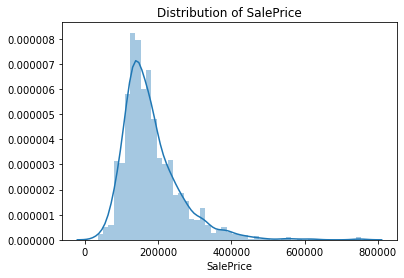

In [6]:
sns.distplot(df_train['SalePrice']).set_title("Distribution of SalePrice");

We can notice that most of the houses cost between $100\ 000$ USD and $250\ 000$ USD.

In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


We can observe a positive skewness from the histogram plot. This is not exactly a normal distribution. This basically all combines to represent a right skewness of the data. Now, if we observe a positive or a right skewness, log transformation is a good option. Applying a log function on these values should give a linear trend and convert the set of values into ‘normally distributed’ values. We will see how in the [section 5](#test-assumptions).

## 1.3 Relationship between SalePrice and other attributes <a id="relationship-saleprice-others">

Here comes the part when we choose several attributes with **high** expectation and analyse them to check if we were on the right track.

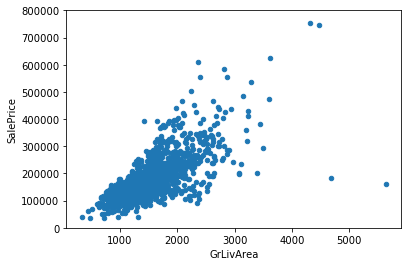

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

'GrLivArea' is an attribute which specifically indicates the above ground (grade) living area (in square feet) available in the house. 
Larger living space was expected to entail a higher price. The plot above tells us that we are generally right. The graph shows a linear relationship between these variables.
Two points whose $ x $ coordinates are approximately $ 4 \ 600 $ and $ 5 \ 600 $ with $ y $ coordinates less than $ 3 \ 000 $ appear to be outliers. When we remove them from the set, we get the following graph:

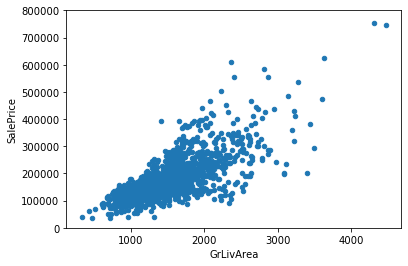

In [9]:
df_train2 = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
data = pd.concat([df_train2['SalePrice'], df_train2['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

Though we will talk about outliers more in the [section 4](#outliers).

<br>

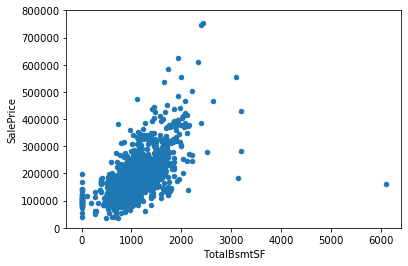

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

'TotalBsmtST' is an attribute whose metric contains the total area of the basement in square feet. It is the sum of other bsmtSF features and we can see there is a semi linear relationship. Although this is not expected at first, 'TotalBsmt' has quite predictive impact for our future model.

<br>

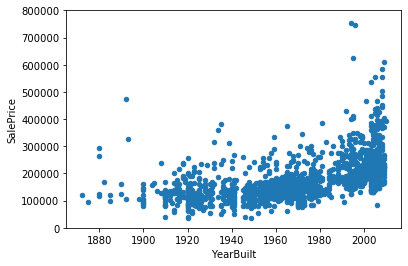

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
data.plot.scatter(x='YearBuilt', y='SalePrice', ylim=(0,800000));

'YearBuilt' is an attribute which indicates original construction date.
‘SalePrice’ shows almost a steep increase with ‘YearBuilt’, basically indicating that prices increase (almost exponentially) as the houses decrease in age. Most recent houses are highly priced.

<br>

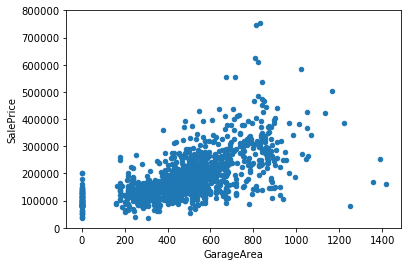

In [12]:
data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
data.plot.scatter(x='GarageArea', y='SalePrice', ylim=(0,800000));

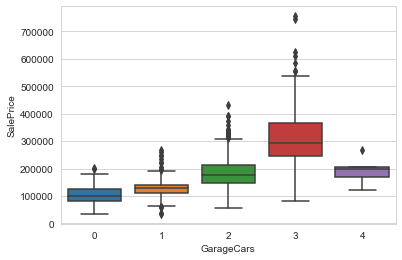

In [13]:
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
sns.set_style("whitegrid") 
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = data)

High correlation between 'GarageCars' and 'GarageArea' is understandable because the number of cars that fit into a garage just depends and is due to the surface of the garage. In further consideration we can use only one of these variables - one whose correlation with 'SalePrice' is higher. We will get more into details about correlations in [section 3](#analysis-of-dimensionality).

<br>

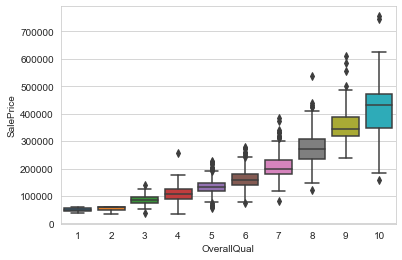

In [14]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)

'OverallQual' is an evaluation of overall material and finish quality of the house.
It is expected to read the price range for each category from the plot above. We can see that higher the rating, higher the sale price. Since the 'OverallQual' is categorical variable, its relationship with the 'SalePrice' could be shown with a box plot for spotting outliers.

<br>

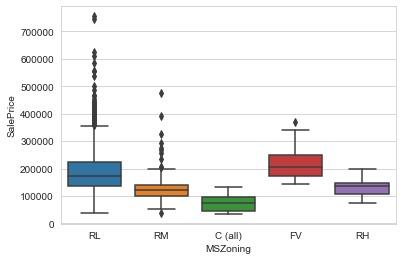

In [15]:
data = pd.concat([df_train['SalePrice'], df_train['MSZoning']], axis=1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = data) 

'MSZoning' is an attribute which contains information about a zone that the house belongs to. On the whole, the houses in commercial area have less prices than the houses in residential area. What is interesting is the fact that houses in rural areas (FVs) have higher prices than houses in the other categories. We can also see that RL (Residental Low Density Zone) has many outliers and exceptions according to its average price.

<br>

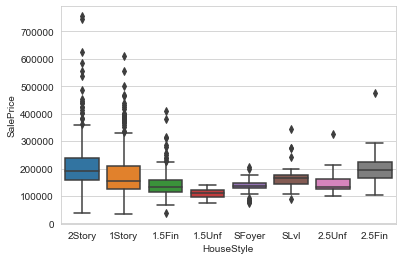

In [16]:
data = pd.concat([df_train['SalePrice'], df_train['HouseStyle']], axis=1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = data) 

'HouseStyle' is an attribute which is reffered to the style of dwelling.
It depends on numbers of finished levels and floors.
We can see that two-storey buildings have relatively wider spread of prices with oultiers.
Houses with style $1.5$ Unf (One and one-half story: 2nd level unfinished) are less spread in terms of prices. This suggests that the number of these houses is probably small comparing to the number of other types of houses. We can check it.

In [17]:
Unf1_5 = data[df_train['HouseStyle'] == '1.5Unf']
print(Unf1_5)
print("Number of houses with 1.5Unf style: ", len(Unf1_5))

      SalePrice HouseStyle
9        118000     1.5Unf
15       132000     1.5Unf
21       139400     1.5Unf
127       87000     1.5Unf
163      103200     1.5Unf
325       87000     1.5Unf
383       76000     1.5Unf
437      119000     1.5Unf
514       96500     1.5Unf
555      113000     1.5Unf
617      105500     1.5Unf
826      109500     1.5Unf
1069     135000     1.5Unf
1443     121000     1.5Unf
Number of houses with 1.5Unf style:  14


<br>

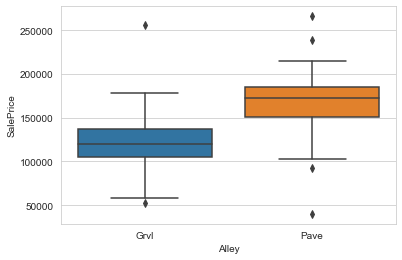

In [18]:
data = pd.concat([df_train['SalePrice'], df_train['Alley']], axis=1)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = data) 

'Alley' is an attribute which means the type of alley access. We can see that houses with a paved alley have higher price.

<br>

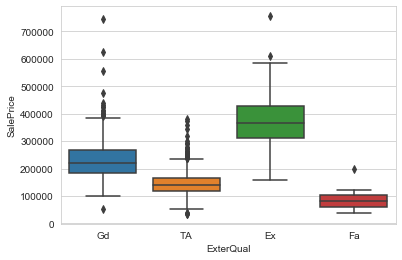

In [19]:
data = pd.concat([df_train['SalePrice'], df_train['ExterQual']], axis=1)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = data) 

'ExterQual' is an attribute which contains information about exterior material quality. It is clear and expected that houses with excellent (Ex) condition of exterior material will have a higher price than others, but there are also houses with good exterior condition (Gd) and extremely high prices.

<br>

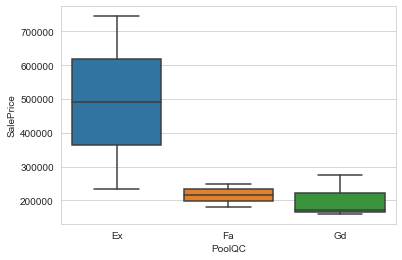

In [20]:
data = pd.concat([df_train['SalePrice'], df_train['PoolQC']], axis=1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = data) 

'PoolQC' is an attribute which contains estimate of pool quality.
It is expected, as we can see from the plot, that houses with excellent pool condition are more expensive than others.

<br>

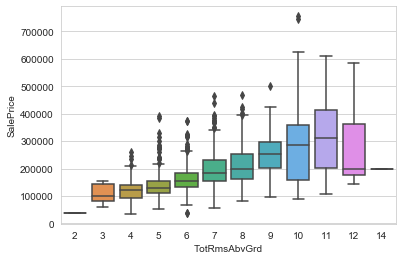

In [21]:
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = data) 

'TotRmsAbvGrd' is an attribute that means total square feet of basement area.
It is clear that houses with more rooms will, on average, have a higher price.

<br>

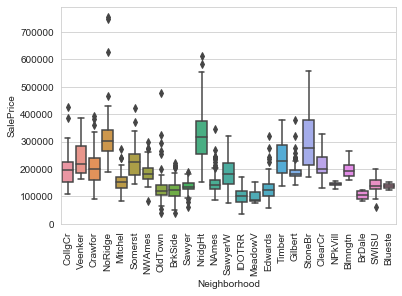

In [22]:
data = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In the plot above, we can see the relationship between the prices of the houses and its neighborhood locations. We can see neighborhood areas for which house prices are generally higher.

<br>

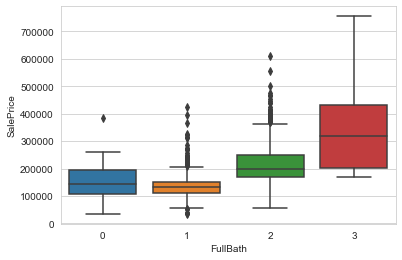

In [23]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = data)

Another attribute that plays a big impact in the house pricing is 'FullBath'. It indicates the total number of fully equipped bathrooms above the ground surface. It is expected that those houses with the biggest number of fully equipped bathrooms will have the highest price. We can take a look if houses with no fully equipped bathrooms above the ground have any fully equipped bathrooms below the ground - these houses must somehow justify the price we see on the plot. Even before searching the number of underground bathrooms, we could conclude that there are very few examples of such houses. Let's make sure.

In [24]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath'], df_train['BsmtFullBath']], axis=1)
no_fb_ag = data[df_train['FullBath'] == 0]
print(no_fb_ag)
print("Number of houses without full baths above grade: ", len(no_fb_ag))

      SalePrice  FullBath  BsmtFullBath
53       385000         0             2
188      153337         0             2
375       61000         0             1
597      194201         0             0
634      144000         0             2
916       35311         0             1
1163     108959         0             2
1213     145000         0             1
1270     260000         0             2
Number of houses without full baths above grade:  9


<HR>
    
Despite the large number of attributes $(79)$ that describe many aspects of any house, we chose some of them that we found interesting to explore and create an intuition about the potential impact on the overall price house. Next step would be to provide mathematical background for the findings about variables' influence and correlations. We will do that in [section 3](#analysis-of-dimensionality). Before that, let us fix the missing values first so that we can compute correlation on 'clean data'.
<HR>

# 2. Fixing the data <a id="fixing-the-data">

After we have gained some insight in our data, we are more prep to take a closer look at values that our variables take and do some cleaning if we catch a chance to do it.

Let's take a look at our data (we already printed out this table at the beginning of the notebook but let's take a more detailed look at its values now):

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We notice two things here:
1. some variables are not of correct type
2. there are null values that require some further investigation

We will get into both of these problems one by one. 

## 2.1 Incorrect types of variables <a id="incorrect-types">

As we have seen, the types contained in the training dataset are *int*, *float* and *object*. Let's have a quick glance at how our object and numeric variables look like:

**Columns with object values**

In [26]:
# Print colunms with object values
object_df = df_train.select_dtypes(include=object)
object_df.head(3)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  

[3 rows x 43 columns]

<br>**Columns with numerical values**

In [27]:
# Print columns with numeric type values
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df_train.select_dtypes(include=numerics)
numeric_df.head(3)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  

[3 rows x 38 columns]

<br>We want some variables to be of different type. We can group our "demands for change" in three categories: <br>
$\;\;\;\;\;\;$ (1) square feet variables which are of type int should be of type float <br>
$\;\;\;\;\;\;$ (2) year variables which are of type float should be of type int <br>
$\;\;\;\;\;\;$ (3) price/value variables which are of type int should be of type float

<br><font color='blue'> **(1) Square feet: int -> float** </font>

Several variables represent number of square feet: *LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea*.

Following common sense, square feet should be expressed in float. But only *MasVnrArea* is float, all the others are int. Therefore, we will tranform all those variables to float.

In [28]:
columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

for col in columns:
    df_train[col] = df_train[col].astype(float)

<br><font color='blue'> **(2) Years: float -> int** </font>

Variable *GarageYrBuilt* is float while variables *YrSold, YearBuilt, YearRemodAdd* are int. We should change *GarageYrBuilt* to int since years are more logical to be of type int than float.

In [29]:
# df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype(int)

The above command returns error because we have some null values in column *GarageYrBlt* and null values cannot be converted to int. Therefore, we can tranform float to int only after we finish investigating missing values in subsection [2.2.2 Solving null values by variables](#solving-nulls-by-variables). We will run the above command at the end of [GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt](#garagex).

<br><font color='blue'> **(3) Values: int -> float** </font>

Variables *MiscVal* and *SalePrice* represent value and price in dollars. Following common sense, they should be of type float, but they are int. Let's convert them from int to float.

In [30]:
df_train['MiscVal'] = df_train['MiscVal'].astype(float)
df_train['SalePrice'] = df_train['SalePrice'].astype(float)

With this we conclude the tranformation of column types.
<br>
<br>
<br>

## 2.2 Missing data (null values) <a id="missing-data">

Important to notice, our dataset provides one obstacle when dealing with null values. Here, some null values are actually **not null values**, they <u>do not represent missing values</u>. Some variables contain value *NA* because it represents that "this dwell doesn't contain this utility". <br>
E.g. if a dwell has *NA* value for variable *GarageType*, it actually means that this dwell **doesn't possess a garage**, not that we don't have information about the garage. So this is not the missing value, but rather the significant information about the dwell.

So in our approach to dealing with null values, we follow these steps:

1. We must first determine whether the null values are
    - *missing value* or
    - _"doesn't own this utility" value_ <br>
<br>
2. If it is a "doesn't own utility" case, transform these *NA* values to something like *NoGarage*. <br> Else, go to step 3. <br>
<br>
3. If it is a missing value, choose one of the following three scenarios:

    - If some variables have **too many null values**, those variables might then very likely be **not important** for our *SalePrice* prediction, and should be thrown out of the dataset. <br> *(We want to make our machine learning model's life easier by ejecting everything that is not important to it, and that just polutes its clear air and puts unnecessary work on its back.)* <br>
<br>
    - If some variables have **significant number of null values**, but those variables **are important** and must <u>not</u> be just ejected out of the dataset like in the previous scenario, we must provide a way for dealing with it without throwing anything out. Our choice will be to fill in those missing values by average(), mean(), zeros or something alike, depending on the variable and what suits it the best. <br>
<br>
    - If some variables have very little, **unsignificant number of null values**, we can consider throwing the whole row out of the dataset instead of filling the null place with the artifical value. <br>
<br>

### 2.2.1 Finding variables with null values <a id = "finding-nulls">

Let's dig in! Firstly, let's just gently get into the "null values perspective" of our dataset. Let's check which variables contain null values and how many null values do they contain.

In [31]:
count_of_null_values = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data.head(20)

Count of null-values occurrences  \
PoolQC                                    1453   
MiscFeature                               1406   
Alley                                     1369   
Fence                                     1179   
FireplaceQu                                690   
LotFrontage                                259   
GarageCond                                  81   
GarageType                                  81   
GarageYrBlt                                 81   
GarageFinish                                81   
GarageQual                                  81   
BsmtExposure                                38   
BsmtFinType2                                38   
BsmtFinType1                                37   
BsmtCond                                    37   
BsmtQual                                    37   
MasVnrArea                                   8   
MasVnrType                                   8   
Electrical                                   1   
Utilities                                    0   

             Percentage of null-values occurrences  
PoolQC                                      99.52%  
MiscFeature                                 96.30%  
Alley                                       93.77%  
Fence                                       80.75%  
FireplaceQu                                 47.26%  
LotFrontage                                 17.74%  
GarageCond                                   5.55%  
GarageType                                   5.55%  
GarageYrBlt                                  5.55%  
GarageFinish                                 5.55%  
GarageQual                                   5.55%  
BsmtExposure                                 2.60%  
BsmtFinType2                                 2.60%  
BsmtFinType1                                 2.53%  
BsmtCond                                     2.53%  
BsmtQual                                     2.53%  
MasVnrArea                                   0.55%  
MasVnrType                                   0.55%  
Electrical                                   0.07%  
Utilities                                    0.00%

We see in this table that only first 19 variables (*PoolQC* to *Electrical*) present material to investigate. Only these first 19 variables contain null values. Other variables have no null values.

For example, to see how it looks like, let's print this one row that contains null value for *Electrical*. But we are only interested in null values columns so let's not print the whole row, but only these 19 variables that can contain null values:

In [32]:
# Show 1 row - the one where 'Electrical' has null value,
# but show it only with the columns from above table (the columns that contain null values in the dataset)

null_columns = df_train.columns[df_train.isnull().any()]
df_train[df_train['Electrical'].isna()][null_columns]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
1379         73.0   NaN       None         0.0       Gd       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
1379          Unf          Unf        NaN         NaN    BuiltIn       2007.0   

     GarageFinish GarageQual GarageCond PoolQC Fence MiscFeature  
1379          Fin         TA         TA    NaN   NaN         NaN

<br><br>Since everyone likes visualization, let's show the heatmap of our dataset. Non-null values are represented with black color, and null values are represented with white (i.e. slight orange) color. Heatmap really presents us clearer image about the proportion of null values in the whole dataset **and** proportion of null values in each variables.

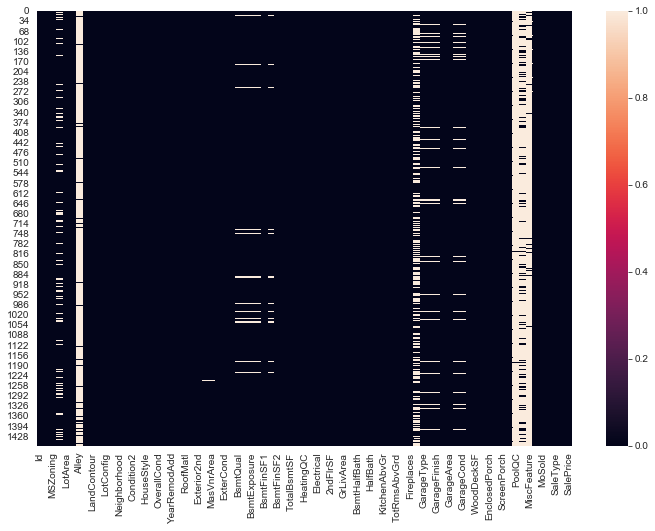

In [33]:
# Create an inch-by-inch image
plt.figure(figsize=(12,8))

# Plot a heatmap for visualization missing data
sns.heatmap(df_train.isnull(), cbar=True)
plt.show()

We will also provide a bar graph to visualize the count of null values compared to each other.

Text(0.5, 1.0, 'Percent missing data by feature')

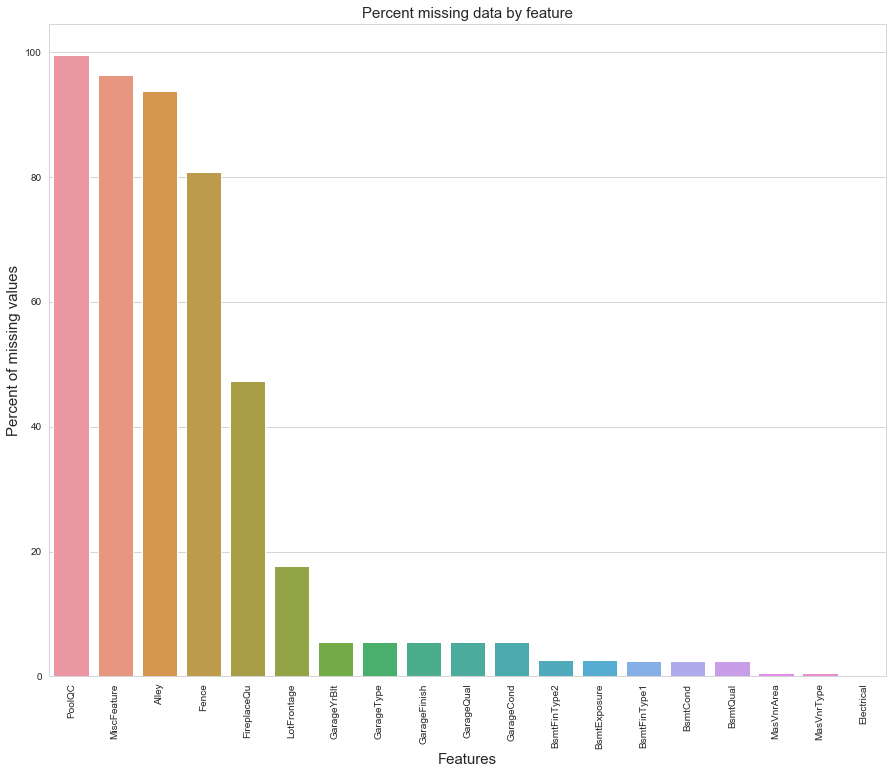

In [34]:
# Plot bar graph of null values by each variable

# Calculate percentage of share of null data in total data
all_null_data = (df_train.isnull().sum() / len(df_train)) * 100

# Drop the variables that have 0 null occurrences
all_null_data = all_null_data.drop(all_null_data[all_null_data == 0].index)

# Sort variables descending by null occurrences
all_null_data = all_null_data.sort_values(ascending=False)[:30]

# Plot
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_null_data.index, y=all_null_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Now that we have gained some insight about the null values in our dataset, we are more competent to do something about them.
Let's philosophize about each variable that contains null values and decide for each one what will we do about it. Our guidelines will be:
- steps 1, 2 & 3 mentioned at the beginning of this section ( [2.2 Missing data (null values)](#missing-data) )
- data description file that has been provided along with the dataset <br>
<br>

### 2.2.2 Solving null values by variables <a id = "solving-nulls-by-variables">

##### <font color='blue'> PoolQC </font> <a id="poolqc">

Data description file says that *NA* here means that dwell has no pool. Hence it is <u>**not** missing value</u>.

Let's confirm that *PoolQC*'s *NA* values really represent "no pool" rather than missing values.

We can check that by analyzing variable *PoolArea* which is kind of a sister variable to *PoolQC* since they both describe pools. If *PoolArea* is *zero* square feet large **and** the *PoolQC* is at the same time *NA*, than we can with great confidence confirm that this is not the missing value.

In [35]:
# Number of rows which have null(NA) values in column 'PoolQC'
number_of_nulls = df_train[df_train['PoolQC'].isna()].shape[0]

# Number of rows which have zeros in column 'PoolArea'
number_of_zeros = df_train[df_train['PoolArea'] == 0].shape[0]

# Number of rows which have both 'NA' in 'PoolQC' and 0 in 'PoolArea'
zeros_and_nulls = df_train[(df_train['PoolQC'].isna()) & (df_train['PoolArea'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'PoolQC': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'PoolArea': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'PoolQC': 1453
Number of rows containing 0 in column 'PoolArea': 1453

Number of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': 1453


**Conclusion:** All 1453 rows that have *NA* value for *PoolQC*, have also value *0* for *PoolArea*. That means that all these dwells really don't have pools and we can carefree consider these *NA* values as "no utility" values. We will change the *NA* values to "NoPool" value.

In [36]:
df_train['PoolQC'].fillna('NoPool', inplace=True)

<br>

##### <font color='blue'> MiscFeature </font> <a id="miscfeature">

Data description file says that *NA* here means that dwell has no miscellaneous feature that is not covered in other variables. Hence it is <u>**not** missing value</u>.

Let's provide a proof for this statement. This is a pretty similar case to *PoolQC* variable - *MiscFeature* has also its sister variable named *MiscVal*. *MiscFeature* says if dwell owns any miscellaneous feature not covered in other categories and *MiscVal* specifies value of that miscellaneous feature (in dollars). So obviously if there is no miscellaneous feature, its value must be zero. The test is the same as for the *PoolQC* above.

In [37]:
# Number of rows which have null(NA) values in column 'MiscFeature'
number_of_nulls = df_train[df_train['MiscFeature'].isna()].shape[0]

# Number of rows which have zeros in column 'MiscVal'
number_of_zeros = df_train[df_train['MiscVal'] == 0].shape[0]

# Number of rows which have both 'NA' in 'MiscFeature' and 0 in 'MiscVal'
zeros_and_nulls = df_train[(df_train['MiscFeature'].isna()) & (df_train['MiscVal'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'MiscFeatures': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'MiscVal': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'MiscFeatures': 1406
Number of rows containing 0 in column 'MiscVal': 1408

Number of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': 1406


**Conclusion:** All rows in our dataset that contain null values in column *MiscFeature* have also values *0* in column *MiscVal*. Therefore, we consider all *NA* values in *MiscFeature* as "no utility" values and not as missing values. We will change the *NA* values to "NoMiscFeature" value.

In [38]:
df_train['MiscFeature'].fillna('NoMiscFeature', inplace=True)

<br>

#####  <font color='blue'> Alley </font> <a id="alley">

Data description file says that *NA* here means that dwell has no alley access. Hence it is <u>**not** missing value</u>.

We cannot really analyze much about this variable to confirm the above statement, our hands are quite tied. *Alley* has no sister variables to ask for help. We can only use our senses. Closest to sister-like variable could be *Street* because both *Street* and *Alley* state if the road is graveled or paved. We notice that *Street* has no null values (we know that because it is not printed out in the table from some while ago, the one with the variables that contain null values). So our senses make us believe that if they didn't "forget" to check and insert informations about the street, they wouldn't forget about the *Alley* neither. Specially since 93.77% would be too many times to "forget". 

**Conclusion:** *NA* very likely means "no alley access" as data description file suggested, and we will consider it so. We will change the NA values to "NoAlley" value.

In [39]:
df_train['Alley'].fillna('NoAlley', inplace=True)

<br>

##### <font color='blue'> Fence </font> <a id="fence">

Data description file says that *NA* here means that dwell has no fence. Hence it is <u>**not** missing value</u>.

Even worse than with *Alley*, there is nothing we can analyze here to provide some proof. There is no variable alike that we can compare it too. We will respect the data description file and consider null values as "no fence" information. We believe that 1179 times to "forget" about the information would be too much since the data in our dataset are quite diligently imported.

**Conclusion:** *NA* very likely means "no fence" as data description file suggested, and we will consider it so. We will change the NA values to "NoFence" value.

In [40]:
df_train['Fence'].fillna('NoFence', inplace=True)

<br>

##### <font color='blue'> FireplaceQu </font> <a id="fireplacequ">

Data description file says that *NA* here means that dwell has no fireplace. Hence it is <u>**not** missing value</u>.

We will provide a proof for this. This is a pretty similar case to *PoolQC* and *MiscFeature* variables - *FireplaceQu* has also its sister variable named *Fireplaces*. *Fireplaces* specifies the number of fireplaces and *FireplaceQu* states the fireplace quality. So obviously if there is no fireplace, the number of fireplaces must be zero. The test is the same as for the *PoolQC* and *MiscFeature* from above.

In [41]:
# Number of rows which have null(NA) values in column 'FireplaceQu'
number_of_nulls = df_train[df_train['FireplaceQu'].isna()].shape[0]

# Number of rows which have zeros in column 'Fireplaces'
number_of_zeros = df_train[df_train['Fireplaces'] == 0].shape[0]

# Number of rows which have both 'NA' in 'FireplaceQu' and 0 in 'Fireplaces'
zeros_and_nulls = df_train[(df_train['FireplaceQu'].isna()) & (df_train['Fireplaces'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'FireplaceQu': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'Fireplaces': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'FireplaceQu': 690
Number of rows containing 0 in column 'Fireplaces': 690

Number of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': 690


**Conclusion:** All rows in our dataset that contain null values in column *FireplaceQu* have also values *0* in column *Fireplaces*. Therefore, we consider all *NA* values in *FireplaceQu* as "no utility" values and not as missing values. We will change the *NA* values to "NoFireplace" value.

In [42]:
df_train['FireplaceQu'].fillna('NoFireplace', inplace=True)

<br>

##### <font color='blue'> LotFrontage </font> <a id="lotfrontage">

*LotFrontage* is numerical variable, so one might probably think that *NA* cannot be inserted on purpose and that it is indeed a missing value. But since there are no zeros in this column, it leads us to belief that *NA* values might actually very likely represent that there is 0 linear feet of street connected to property. I.e. they didn't "forget" about this information, they just left it empty because there is no lot frontage.

In [43]:
# Number of rows with 0 in column 'LotFrontage'
zeros = df_train[df_train['LotFrontage'] == 0].shape[0]
print("Number of rows that contain 0 in column 'LotFrontage': {}" .format(zeros))

Number of rows that contain 0 in column 'LotFrontage': 0


**Conclusion:** These are not missing data, they only say that there is no street connected to the property. We might fill these values with zeros, but we choose to fill them with median of all *LotFrontage*s in the neighborhood it belongs to. We believe this should better suit our model because zeros might lead to outliers, and in the same time it is important to notice that we didn't do anything too artificial for this variable. This really can be a house's property that is actually characteristic of the neighbourhoods.

In [44]:
# Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_train['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

<br>

##### <font color='blue'> GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt </font> <a id="garagex">

Data description file says that *NA* in variables *GarageCond*, *GarageType*, *GarageFinish* and *GarageQual* means that dwell has no garage. Hence it is <u>**not** missing value</u>.<br>
But *GarageYrBlt* is a numerical value, so one might think that it is a missing value since it would probably be 0 if there is no garage. Let's check all of these variables out.

All five of these variables have the same number of null values = 81. That is a great lead.

As we mentioned, since *GarageYrBlt* is numerical value, null value very strongly induces that it is a missing value. But we should use some common sense here instead of blindly follow mathematics :) <br>
What's the deal? Well, except variables *GarageCond*, *GarageType*, *GarageFinish*, *GarageQual* and *GarageYrBlt*, we also have additional two numerical variables that describe garage utility: *GarageCars* which states how many cars fit in the garage and *GarageArea* which states garage area in square feet. They don't have null values, but if they have value zero in the same row where our 5 variables have *NA* values, than that is an indicator that this row doesn't miss data, but this row (dwell) really doesn't possess a garage. That would mean that they used *NA* value for *GarageYrBlt* if there is no garage, instead of using 0 for unexisting year as one would imagine.


If we confirm that all these rows which contain null values in *GarageCond*, *GarageType*, *GarageFinish*, *GarageQual*, *GarageYrBlt* really do contain zeros in those two additional variables also, we have a strong case that it really isn't the case of missing values, but rather the case of "no utility" values.

We will do the analysis in 5 short steps: <br>
    a) check the number of nulls in 5 variables <br>
    b) check if all those nulls for all 5 variables are in the same rows <br>
    c) check the number of zeros in 2 additional numerical variables <br>
    d) check if all those zeros for both variables are in the same rows <br>
    e) check if all those rows with nulls have also zeros in those 2 additional variables <br>

**a) check the number of nulls in 5 variables**

In [45]:
# Number of rows which have null(NA) values in those 5 specific columns (separately)
number_of_nulls1 = df_train[df_train['GarageCond'].isna()].shape[0]
number_of_nulls2 = df_train[df_train['GarageType'].isna()].shape[0]
number_of_nulls3 = df_train[df_train['GarageFinish'].isna()].shape[0]
number_of_nulls4 = df_train[df_train['GarageQual'].isna()].shape[0]
number_of_nulls5 = df_train[df_train['GarageYrBlt'].isna()].shape[0]

print("Number of rows containing 'NA' in column 'GarageCond': {}" .format(number_of_nulls1))
print("Number of rows containing 'NA' in column 'GarageType': {}" .format(number_of_nulls2))
print("Number of rows containing 'NA' in column 'GarageFinish': {}" .format(number_of_nulls3))
print("Number of rows containing 'NA' in column 'GarageQual': {}" .format(number_of_nulls4))
print("Number of rows containing 'NA' in column 'GarageYrBlt': {}" .format(number_of_nulls5))

Number of rows containing 'NA' in column 'GarageCond': 81
Number of rows containing 'NA' in column 'GarageType': 81
Number of rows containing 'NA' in column 'GarageFinish': 81
Number of rows containing 'NA' in column 'GarageQual': 81
Number of rows containing 'NA' in column 'GarageYrBlt': 81


<br>We already knew that variables *GarageCond*, *GarageType*, *GarageFinish*, *GarageQual* and *GarageYrBlt* have 81 null values, but we printed it here just to have all informations in one place. Now let's see if all those 81 null values for all 5 variables are contained in the same 81 rows.

**b) check if all those nulls for all 5 variables are in the same rows**

In [46]:
# Just a condition that we will use in the next line, it checks the null values of those 5 specific columns
all_nulls_condition = (df_train['GarageCond'].isna()) & (df_train['GarageType'].isna()) & (df_train['GarageFinish'].isna()) & (df_train['GarageQual'].isna()) & (df_train['GarageYrBlt'].isna())

# Number of rows which have 'NA' at the same time in columns 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageYrBlt'
all_nulls = df_train[all_nulls_condition].shape[0]

print("Number of rows containing 'NA' in all 5 columns ('GarageCond', \n'GarageType', 'GarageFinish', 'GarageQual', 'GarageYrBlt') AT THE SAME TIME: {}" .format(all_nulls))

Number of rows containing 'NA' in all 5 columns ('GarageCond', 
'GarageType', 'GarageFinish', 'GarageQual', 'GarageYrBlt') AT THE SAME TIME: 81


<br>Great, we don't have to observe our 5 variables separately, we can observe them as a group. Now, let's check how many zeros there are in columns *GarageCars*, *GarageArea* and *GarageYrBlt*.

**c) check the number of zeros in 2 additional numerical variables**

In [47]:
# Number of rows which have zeros in those specific columns (separately)
number_of_zeros1 = df_train[df_train['GarageCars'] == 0].shape[0]
number_of_zeros2 = df_train[df_train['GarageArea'] == 0].shape[0]
number_of_zeros3 = df_train[df_train['GarageYrBlt'] == 0].shape[0]

print("Number of rows containing 0 in column 'GarageCars': {}" .format(number_of_zeros1))
print("Number of rows containing 0 in column 'GarageArea': {}" .format(number_of_zeros2))
print("Number of rows containing 0 in column 'GarageYrBlt': {}" .format(number_of_zeros3))

Number of rows containing 0 in column 'GarageCars': 81
Number of rows containing 0 in column 'GarageArea': 81
Number of rows containing 0 in column 'GarageYrBlt': 0


<br>Now we know that *GarageCars* and *GarageArea* have 81 zeros which smells good. Also, just to check, we verified that *GarageYrBlt* doesn't contain zeros. This way we confirmed that the only way they would note in column *GarageYrBlt* that there is no garage, would really be with *NA* value.

Now let's check if these 81 zeros for both variables are in the same rows.

**d) check if all those zeros for both variables are in the same rows**

In [48]:
# Just a condition that we will use in the next line, it checks the zeros in those 2 specific columns
all_zeros_condition = (df_train['GarageCars'] == 0) & (df_train['GarageArea'] == 0)

# Number of rows which have 0 at the same time in 'GarageCars', 'GarageArea'
all_zeros = df_train[all_zeros_condition].shape[0]

print("Number of rows containing 0 in both columns ('GarageCond', 'GarageType') at the same time: {}" .format(all_zeros))

Number of rows containing 0 in both columns ('GarageCond', 'GarageType') at the same time: 81


<br>Looking good! We can observe these 2 variables as a group, too! Only thing left to do is to check if all those null values for 5 variables (*GarageCond*, *GarageType*, *GarageFinish*, *GarageQual*, *GarageYrBlt*) and all those zeros for 2 variables (*GarageCars*, *GarageArea*) are all in the same rows. 

**e) check if all those rows with nulls have also zeros in those 2 additional variables**

In [49]:
# Number of rows which have both 'NA' in 5 variables and 0 in 2 variables
zeros_and_nulls = df_train[all_nulls_condition & all_zeros_condition].shape[0]

print("\nNumber of rows which have all zeros and nulls in all 7 variables: {}" .format(zeros_and_nulls))


Number of rows which have all zeros and nulls in all 7 variables: 81


Of course that more correct way would be to check if there are zeros in *null value rows*, but we hoped that this query would give us the answer right away, and it did. If our query gave us a number less than 81, we would have to analyze it a bit more.

<br>**Conclusion:** Neither of those *NA* values represent missing data. All of them are "no utility" values. <br>
We will change the NA values for *GarageCond*, *GarageType*, *GarageQual* and *GarageFinish* to "NoGarage" value. <br>
We will change the NA values for *GarageYrBlt* to zero.

In [50]:
df_train['GarageCond'].fillna('NoGarage', inplace=True)
df_train['GarageType'].fillna('NoGarage', inplace=True)
df_train['GarageQual'].fillna('NoGarage', inplace=True)
df_train['GarageFinish'].fillna('NoGarage', inplace=True)
df_train['GarageYrBlt'].fillna(0, inplace=True)

<font color="orange"> **Remember!** </font> In section [2.1 Incorrect types of variables](#incorrect-types) we weren't able to convert column *GarageYrBlt* from float to int because it contained null values. Now that we filled null values with zeros, let's convert it to int finally.

In [51]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype(int)

<br>

##### <font color='blue'> BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual </font> <a id="bsmtx">

Data description file says that *NA* in these variables means that dwell has no basement. Hence it is <u>**not** missing value</u>.

Let's investigate this. As for *GarageX* variables, similar situation happens here, we should use our common sense. All these *BasementX* have similar count of null values. Also, except these 5 variables, we have additional six numerical variables in dataset that describe basement: *BsmtFinSF1* states type 1 finished square feet, *BsmtFinSF2* states type 2 finished square feet, *BsmtUnfSF* states unfinished square feet of basement area, *TotalBsmtSF* states total square feet of basement area, *BsmtFullBath* states number of basement full bathrooms and *BsmtHalfBath* states number of basement half bathrooms.

But we cannot just compare if there are nulls and zeros all in the same rows. Because zero in *BsmtFinSF1*, *BsmtFinSF2*, *BsmtUnfSF*, *BsmtFullBath* and *BsmtHalfBath* don't really prove anything. So what if there is zero unfinished square feet, it doesn't mean that there is zero finished square feet. But variable *TotalBsmtSF* is enough for an indicator. For all those rows that have 0 in column *TotalBsmtSF*, we consider null values in those five *BasementX* variables as "no utility" values because it's logical that if there is no basement, then total square feet of basement area is 0.

We will do the analysis in 6 short steps: <br>
    a) check the number of nulls in 5 variables <br>
    b) check if all those nulls for all 5 variables are in the same rows <br>
    c) check the number of zeros in 6 additional numerical variables <br>
    d) check if all those zeros for all 6 variables are in the same rows <br>
    e) check if all those rows with nulls have also zeros in those 6 additional variables <br>
    f) check what happend to two rows that have null values in some *BasementX* variables, but not in all of them <br>

**a) check the number of nulls in 5 variables**

In [52]:
# Number of rows which have null(NA) values in those 5 specific columns (separately)
number_of_nulls1 = df_train[df_train['BsmtExposure'].isna()].shape[0]
number_of_nulls2 = df_train[df_train['BsmtFinType2'].isna()].shape[0]
number_of_nulls3 = df_train[df_train['BsmtFinType1'].isna()].shape[0]
number_of_nulls4 = df_train[df_train['BsmtCond'].isna()].shape[0]
number_of_nulls5 = df_train[df_train['BsmtQual'].isna()].shape[0]

print("Number of rows containing 'NA' in column 'BsmtExposure': {}" .format(number_of_nulls1))
print("Number of rows containing 'NA' in column 'BsmtFinType2': {}" .format(number_of_nulls2))
print("Number of rows containing 'NA' in column 'BsmtFinType1': {}" .format(number_of_nulls3))
print("Number of rows containing 'NA' in column 'BsmtCond': {}" .format(number_of_nulls4))
print("Number of rows containing 'NA' in column 'BsmtQual': {}" .format(number_of_nulls5))

Number of rows containing 'NA' in column 'BsmtExposure': 38
Number of rows containing 'NA' in column 'BsmtFinType2': 38
Number of rows containing 'NA' in column 'BsmtFinType1': 37
Number of rows containing 'NA' in column 'BsmtCond': 37
Number of rows containing 'NA' in column 'BsmtQual': 37


We already knew this, but we want all informations in one place. Here we notice that the number of null occurrences are similar but not the same. The majority will probably be somehow connected, but we should keep an eye on these two variables that have 38 null occurrences. 

**b) check if all those nulls for all 5 variables are in the same rows**

In [53]:
# Just a condition that we will use in the next line, it checks the null values of those 5 specific columns
all_nulls_condition = (df_train['BsmtExposure'].isna()) & (df_train['BsmtFinType2'].isna()) & (df_train['BsmtFinType1'].isna()) & (df_train['BsmtCond'].isna()) & (df_train['BsmtQual'].isna())

# Number of rows which have 'NA' at the same time in columns 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'
all_nulls = df_train[all_nulls_condition].shape[0]

print("Number of rows containing 'NA' in all 5 columns ('BsmtExposure', \n'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual') AT THE SAME TIME: {}" .format(all_nulls))

Number of rows containing 'NA' in all 5 columns ('BsmtExposure', 
'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual') AT THE SAME TIME: 37


This actually tells us that for *BsmtFinType1*, *BsmtCond* and *BsmtQual* all their null values find them selves in the same 37 rows. Additionally, since *BsmtExposure* and *BsmtFinType2* have 38 nulls, 37 of those 38 are obviously in the same rows as nulls from variables *BsmtFinType1*, *BsmtCond* and *BsmtQual*. So that 1 null value missing from *BsmtExposure* and 1 null value missing from *BsmtFinType2* should be further investigated. We will get back to those 2 rows later.

**c) check the number of zeros in 6 additional numerical variables**

In [54]:
# Number of rows which have zeros in those specific columns (separately)
number_of_zeros1 = df_train[df_train['BsmtFinSF1'] == 0].shape[0]
number_of_zeros2 = df_train[df_train['BsmtFinSF2'] == 0].shape[0]
number_of_zeros3 = df_train[df_train['BsmtUnfSF'] == 0].shape[0]
number_of_zeros4 = df_train[df_train['TotalBsmtSF'] == 0].shape[0]
number_of_zeros5 = df_train[df_train['BsmtFullBath'] == 0].shape[0]
number_of_zeros6 = df_train[df_train['BsmtHalfBath'] == 0].shape[0]

print("Number of rows containing 0 in column 'BsmtFinSF1': {}" .format(number_of_zeros1))
print("Number of rows containing 0 in column 'BsmtFinSF2': {}" .format(number_of_zeros2))
print("Number of rows containing 0 in column 'BsmtUnfSF': {}" .format(number_of_zeros3))
print("Number of rows containing 0 in column 'TotalBsmtSF': {}" .format(number_of_zeros4))
print("Number of rows containing 0 in column 'BsmtFullBath': {}" .format(number_of_zeros5))
print("Number of rows containing 0 in column 'BsmtHalfBath': {}" .format(number_of_zeros6))

Number of rows containing 0 in column 'BsmtFinSF1': 467
Number of rows containing 0 in column 'BsmtFinSF2': 1293
Number of rows containing 0 in column 'BsmtUnfSF': 118
Number of rows containing 0 in column 'TotalBsmtSF': 37
Number of rows containing 0 in column 'BsmtFullBath': 856
Number of rows containing 0 in column 'BsmtHalfBath': 1378


These data are a bit of a muss. But as we have told, *BsmtFinSF1*, *BsmtFinSF2*, *BsmtUnfSF*, *BsmtFullBath* and *BsmtHalfBath* numbers don't really tell anything. The only variable that concerns us, is *TotalBsmtSF*. It gives hope that this one returned number 37.

So let's check if all these variables are zero in the rows where *TotalBsmtSF* is zero.

**d) check if all those zeros for all 6 variables are in the same rows**

In [55]:
# Just a condition that we will use in the next line, it checks the zeros in those 6 specific columns
all_zeros_condition = (df_train['BsmtFinSF1'] == 0) & (df_train['BsmtFinSF2'] == 0) & (df_train['BsmtUnfSF'] == 0) & (df_train['TotalBsmtSF'] == 0) & (df_train['BsmtFullBath'] == 0) & (df_train['BsmtHalfBath'] == 0)

# Number of rows which have 0 at the same time in 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'
all_zeros = df_train[all_zeros_condition].shape[0]

print("Number of rows containing 0 in all 6 columns ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath') at the same time: {}" .format(all_zeros))

Number of rows containing 0 in all 6 columns ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath') at the same time: 37


This test gave us the answer right away - obviously wherever *TotalBsmtSF* is zero, other five variables are also zero.

**e) check if all those rows with nulls have also zeros in those 6 additional variables**

In [56]:
# Number of rows which have both 'NA' in 5 variables and 0 in 6 variables
zeros_and_nulls = df_train[all_nulls_condition & all_zeros_condition].shape[0]

print("\nNumber of rows which have all zeros and nulls in all 11 variables: {}" .format(zeros_and_nulls))


Number of rows which have all zeros and nulls in all 11 variables: 37


Great! We already knew that all those null values in *BsmtX* variables are in the same 37 rows, and now we have gotten that all those rows also contain zeros in *BsmtFinSF1*, *BsmtFinSF2*, *BsmtUnfSF*, <u>*TotalBsmtSF*</u>, *BsmtFullBath* and *BsmtHalfBath*.

Now we are sure that all 37 null values in *BsmtFinType1*, *BsmtCond* and *BsmtQual* are not missing values, but "no utility" values. Not only that, but we also made sure this way that other *BasementX* variables have zeros in those 6 additional variables (so everything is logically right and no other *BsmtX* variables should be edited).

We should get back to variables *BsmtExposure* and *BsmtFinType2* because they have 38 null values, so each has 1 more value to investigate.

**f) check what happend to two rows that have null values in some variables, but not in all of them**

<font color="green"> <u> 1) BsmtExposure </u> </font>

In [57]:
df_train[(df_train['BsmtExposure'].isna()) & (df_train['TotalBsmtSF'] != 0)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
948  949          60       RL         65.0  14006.0   Pave  NoAlley      IR1   

    LandContour Utilities  ... PoolArea  PoolQC    Fence    MiscFeature  \
948         Lvl    AllPub  ...      0.0  NoPool  NoFence  NoMiscFeature   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
948     0.0      2   2006        WD         Normal   192500.0  

[1 rows x 81 columns]

There is obviously something wrong here because every other *BsmtX* variable says there is a basement, and only *BsmtExposure* says there is not. So we will just delete this whole row out of the dataset. One row doesn't affect the model, and we should not bother ourselves with filling in artificial value.

<font color="green"> <u> 2) BsmtFinType2 </u> </font>

In [58]:
df_train[(df_train['BsmtFinType2'].isna()) & (df_train['TotalBsmtSF'] != 0)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
332  333          20       RL         85.0  10655.0   Pave  NoAlley      IR1   

    LandContour Utilities  ... PoolArea  PoolQC    Fence    MiscFeature  \
332         Lvl    AllPub  ...      0.0  NoPool  NoFence  NoMiscFeature   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
332     0.0     10   2009        WD         Normal   284000.0  

[1 rows x 81 columns]

There is obviously something wrong here too because there cannot be no basement of type 2, but with finished 479 square feet of basement of type 2. So we will just delete this whole row out of the dataset because something is just wrong here. One row doesn't affect the model, and we should not bother ourselves with filling in artificial value.

<br>**Conclusion:** Those 37 rows where *TotalBsmtSF* is zero (and *BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual* are nulls) are not missing values, they are the "no utility" values. We will keep all those rows and change their *NA* values to "NoBsmt". <br>
Rows where *Id* = 333 and *Id* = 949 are not good, something is wrong with them and we will delete them.

In [59]:
# Delete two rows from dataFrame
df_train.drop(df_train[df_train['Id'] == 333].index, inplace=True)
df_train.drop(df_train[df_train['Id'] == 949].index, inplace=True)

# Fill new values for the rest of the *NA* values
df_train['BsmtExposure'].fillna('NoBsmt', inplace=True)
df_train['BsmtFinType2'].fillna('NoBsmt', inplace=True)
df_train['BsmtFinType1'].fillna('NoBsmt', inplace=True)
df_train['BsmtCond'].fillna('NoBsmt', inplace=True)
df_train['BsmtQual'].fillna('NoBsmt', inplace=True)

<br>

##### <font color='blue'> MasVnrArea, MasVnrType </font> <a id="masvnrx">

*MasVnrArea* is numerical variable, so *NA* probably cannot be inserted on purpose. By looking directly at the data, one can see there are values *0*, so if there is no masonry veneer, it is represented with zero. Therefore we conclude that here *NA* really <u>**is** missing value</u>.

*MasVnrType* has special value *None* that represents that dwell has no masonry veneer (says data description file). So here *NA* really <u>**is** missing value</u>.

They have the same count of null values. They will probably be in the same row. If *MasVnrArea* contains zeros in its column, then *NA* probably represents missing value. Since *MasVnrType* can obtain 'None' value (data description file says so), and if *MasVnrType* column really contains 'None' values, then *NA* values probably represent missing values.

In [60]:
# Number of rows with null(NA) values in column 'MasVnrArea'
number_of_nulls1 = df_train[df_train['MasVnrArea'].isna()].shape[0]

# Number of rows with null(NA) values in column 'MasVnrType'
number_of_nulls2 = df_train[df_train['MasVnrType'].isna()].shape[0]

print("Number of rows containing 'NA' in 'MasVnrArea': {}" .format(number_of_nulls1))
print("Number of rows containing 'NA' in 'MasVnrType': {}" .format(number_of_nulls2))

Number of rows containing 'NA' in 'MasVnrArea': 8
Number of rows containing 'NA' in 'MasVnrType': 8


We already knew these numbers, but let us all have in one place as usual.

Let's check if there really exist 'None' and 0 values in our 2 columns.

In [61]:
# Number of rows with 0 in column 'MasVnrArea'
number_of_zeros = df_train[df_train['MasVnrArea'] == 0].shape[0]

# Number of rows with 'None' in column 'MasVnrType'
number_of_nones = df_train[df_train['MasVnrType'] == 'None'].shape[0]

print("Number of rows containing 0 in 'MasVnrArea': {}" .format(number_of_zeros))
print("Number of rows containing 'None' in 'MasVnrType': {}" .format(number_of_nones))

Number of rows containing 0 in 'MasVnrArea': 861
Number of rows containing 'None' in 'MasVnrType': 864


Yes, writers of the CSV dataset really used 'None' and 0 as "no utility" (i.e. "no masonry veneer") values for variables *MasVnrArea* and *MasVnrType*. Now we are sure that they didn't use *NA* as "no utility" values.

Let's check if null values for both variables are contained in the same 8 rows.

In [62]:
# Number of rows that contain 'NA' for both columns 'MasVnrArea' and 'MasVnrType'
nulls = df_train[(df_train['MasVnrArea'].isna()) & (df_train['MasVnrType'].isna())].shape[0]

print("Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': {}" .format(nulls))

Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': 8


Yay! Null values in both columns are contained in the same 8 rows. Since there are no additional variables describing masonry veneer, and since there are reserved values for "no utility" (i.e. "no masonry veneer") values ('None' for *MasVnrType* and 0 for *MasVnrArea*), we conclude that these null values really are missing values.

<br>**Conclusion:** These 8 *NA* values for both *MasVnrType* and *MasVnrArea* are missing values. <br>
We will insert zeros for *MasVnrArea* and 'None' for *MasVnrType*. Why do we choose insertion of artificial data instead of deletion of rows? Well, our analysis in [section 1](#getting-to-know-the-data) (and analysis in [section 3](#analysis-of-dimensionality) a bit later) about interdependence of variables showed that variables *MasVnrArea* and *MasVnrType* don't really have a large effect on our target variable *SalePrice*. Therefore, we won't delete whole rows just because of these two variables. We will insert some made up data since these two data don't have large effect anyway, and this way we will preserve other valuable data. To be more precise, we will insert *0* and *None* as if those rows (dwells) have no masonry veneer.

In [63]:
# Filling with zeros and 'None'
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['MasVnrType'].fillna('None', inplace=True)

<br>

##### <font color='blue'> Electrical </font> <a id="electrical">

Data description file says *Electrical* cannot take on value NA. So here NA probably really is missing value.

All the other values in *Electrical* are inserted so this one could be the "forgotten" case. But we can't conclude anything because we have no variables that we can compare *Electrical* to. For example, this could be a dwell without electricity, even though that is hard to believe since the house is not that old, it is built in 2006. Though, everything about this house is 'Average/Typical' so it really might not be of great quality:

In [64]:
df_train[['Id', 'Electrical', 'YearBuilt', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'SalePrice']][df_train['Electrical'].isna()].head()

Id Electrical  YearBuilt MasVnrType ExterQual ExterCond BsmtQual  \
1379  1380        NaN       2006       None        TA        TA       Gd   

     BsmtCond BsmtExposure BsmtFinType1  SalePrice  
1379       TA           No          Unf   167500.0

Therefore we will find what is the most typical value for *Electrical* (i.e. most common one) and fill the *NA* value with it.


<br>**Conclusion:** *NA* is a missing value. We will fill the *NA* value with the most common value in column *Electrical*.

In [65]:
# Print the count of occurrences of each value in column 'Electrical'
df_electrical = df_train.groupby('Electrical')['Id'].nunique().sort_values(ascending=False)
df_electrical

Electrical
SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Id, dtype: int64

Since *SBrkr* is most common value, we can fill the *NA* value in Electrical with *SBrkr*.

In [66]:
# Fill the 'NA' value with 'SBrkr'
df_train['Electrical'].fillna('SBrkr', inplace=True)

<br><br>With this we conclude the investigation of missing values. Just a quick check on any left null values not taken care of:

In [67]:
# Just checking that there's no missing data missing...
df_train.isnull().sum().max()

0

<br>

<HR>In this section we have put our data in order. We didn't make any large tranformations, we just dealt with incorrect types and missing values. Now we can conduct analysis on correlations when we know all the data is in place and that there will be no change in data values anymore.
<HR>

# 3. Analysis of dimensionality <a id="analysis-of-dimensionality">
    
In this section we analyze relationships between features. We want to investigate how each feature affects our target variable *SalePrice*, which variables have greater influence than the others and if we can find some multicolinearity to reduce dimensionality. 
    
We divide our analysis on analyzing numerical and analyzing categorical features, since they require different approaches.

## 3.1 Correlations between numerical features <a id="correlations-between-numerical">

### Heatmap: numerical features

It is nice to visually represent a correlation between attributes in order to easily notice important information. Library seaborn enables showing correlation matrix in heatmap style.

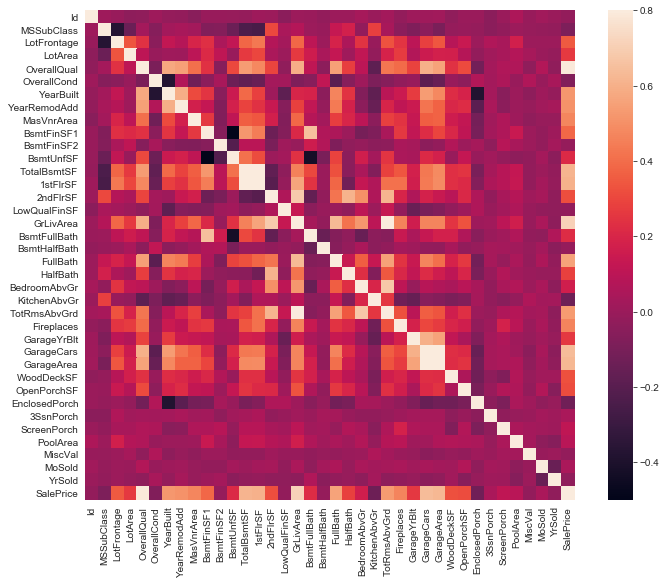

In [68]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

From the heatmap above, it is obvious that 'SalePrice' has the strongest correlation with attribute 'OverallQual' because the belonging square is colored the brightest.

### Determining significant numerical variables

Of course, some other attributes should be also in category for further observation due to their significant correlation with 'SalePrice'. Plotting all features from the highest correlation to the lowest should help to evaluate which are significant enough.

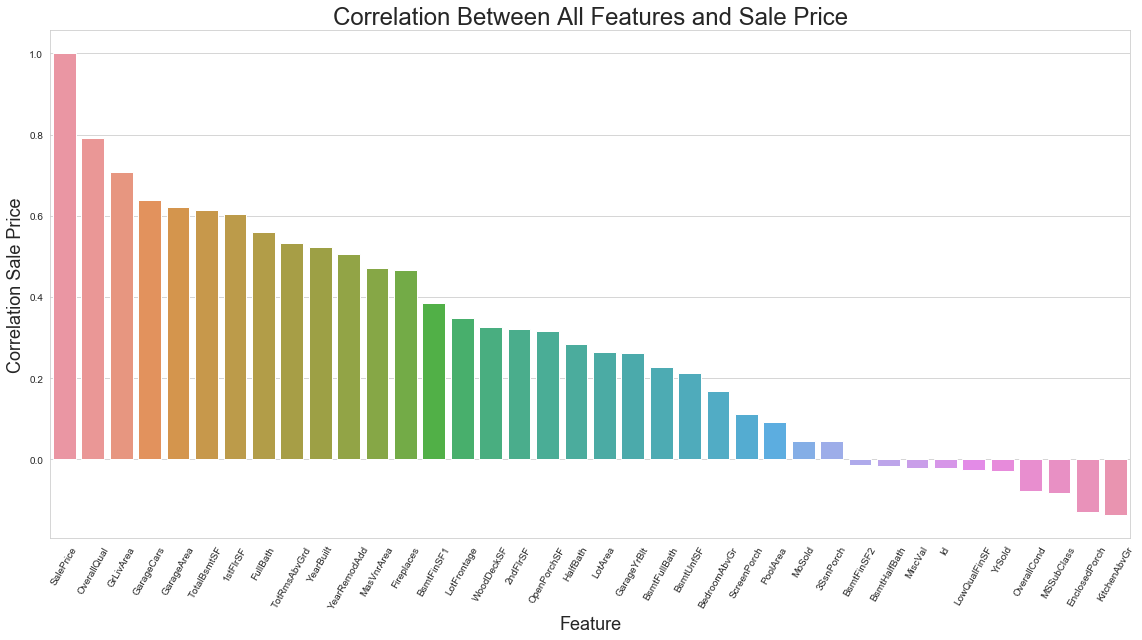

In [69]:
corr = df_train.corr().nlargest(len(df_train.columns), 'SalePrice')

plt.subplots(figsize=(16, 9))

sns.barplot(x=corr.index, y=corr['SalePrice'])

plt.title('Correlation Between All Features and Sale Price', fontsize=24)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Correlation Sale Price', fontsize=18)

plt.xticks(rotation=60)
plt.tight_layout()

According to the graph above, 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea' and '1stFlrSF' should be certainly further investigated. It also seems logical to declare all attributes from the left side to 'Fireplaces' inclusive, as the most correlated attributes with 'SalePrice'. The Plot suggests that the correlation value of 'BsmtFinSF1' is significantly lower than 'Fireplaces' correlation value.

The set of significantly correlated features with 'SalePrice' can also be specified as a certain number of attributes which are the most correlated with observed variable or some threshold could be used, for example, all variables with a correlation value higher than 0.5. 

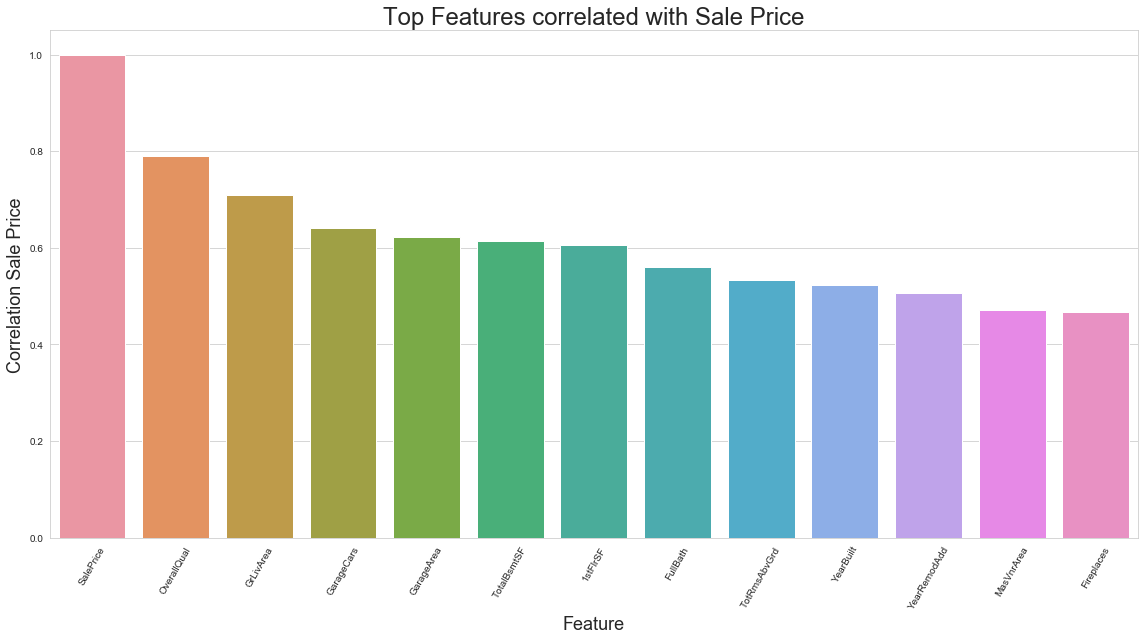

In [70]:
k=13

corr = df_train.corr().nlargest(k, 'SalePrice')

plt.subplots(figsize=(16, 9))

sns.barplot(x=corr.index, y=corr['SalePrice'])

plt.title('Top Features correlated with Sale Price', fontsize=24)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Correlation Sale Price', fontsize=18)

plt.xticks(rotation=60)
plt.tight_layout()

####  Zoomed heatmap style

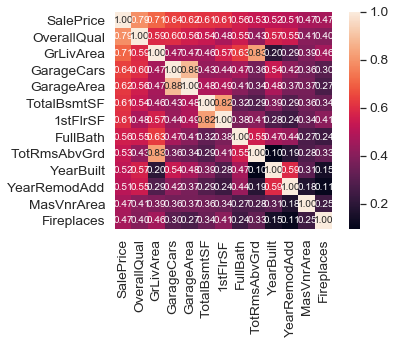

In [71]:
#saleprice correlation matrix
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Not only correlations associated with 'SalePrice' should be considered, but also correlations between independent variables mutually. Correlation matrix zoomed heatmap style can indicate possible situations of multicollinearity. If there are two features strongly correlated, they give almost the same information in the context of predicting the sale price.

Let's look closer to the zoomed heatmap...
1. 'OverallQual' is highly correlated only with 'SalePrice'
2. 'GrLivArea' is highly correlated with 'TotRmsAbvGrd'. It is not hard to believe that, so one of them can be removed from the observed set of features. Since 'GrLivArea' is a bit more correlated with 'SalePrice', 'TotRmsAbvGrd' should be dropped out.
3. Since the correlation between 'GarageCars' and 'GarageArea' is expectedly high, the same procedure as in 2. can be done.
4. The same is with 'TotalBsmtSF' and '1stFlrSF'.
5. 'YearRemodAdd' is slightly correlated with 'YearBuilt' so it not so clear should we remove one of them. On the other hand, neither of those attributes are extremly correlated with 'SalePrice' so let's neglect 'YearRemodAdd'.
6. 'FullBath', 'MaVnrArea' and 'Fireplaces' don't come in pairs, they are only strongly correlated to the dependent variable. Still, 'MasVnrArea' and 'Fireplaces' have correlation value lower than 0.5 so they should be neglected too.

### Scatter plots between 'SalePrice' and correlated variables 

Finally, after dropping out a few features, set contains: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath' and 'YearBuilt'. At the end of the multivariate correlation analysis, all relationships between mentioned features are nicely shown on the plot below.

In [72]:
plt.style.use('classic')
plt.style.use('classic')

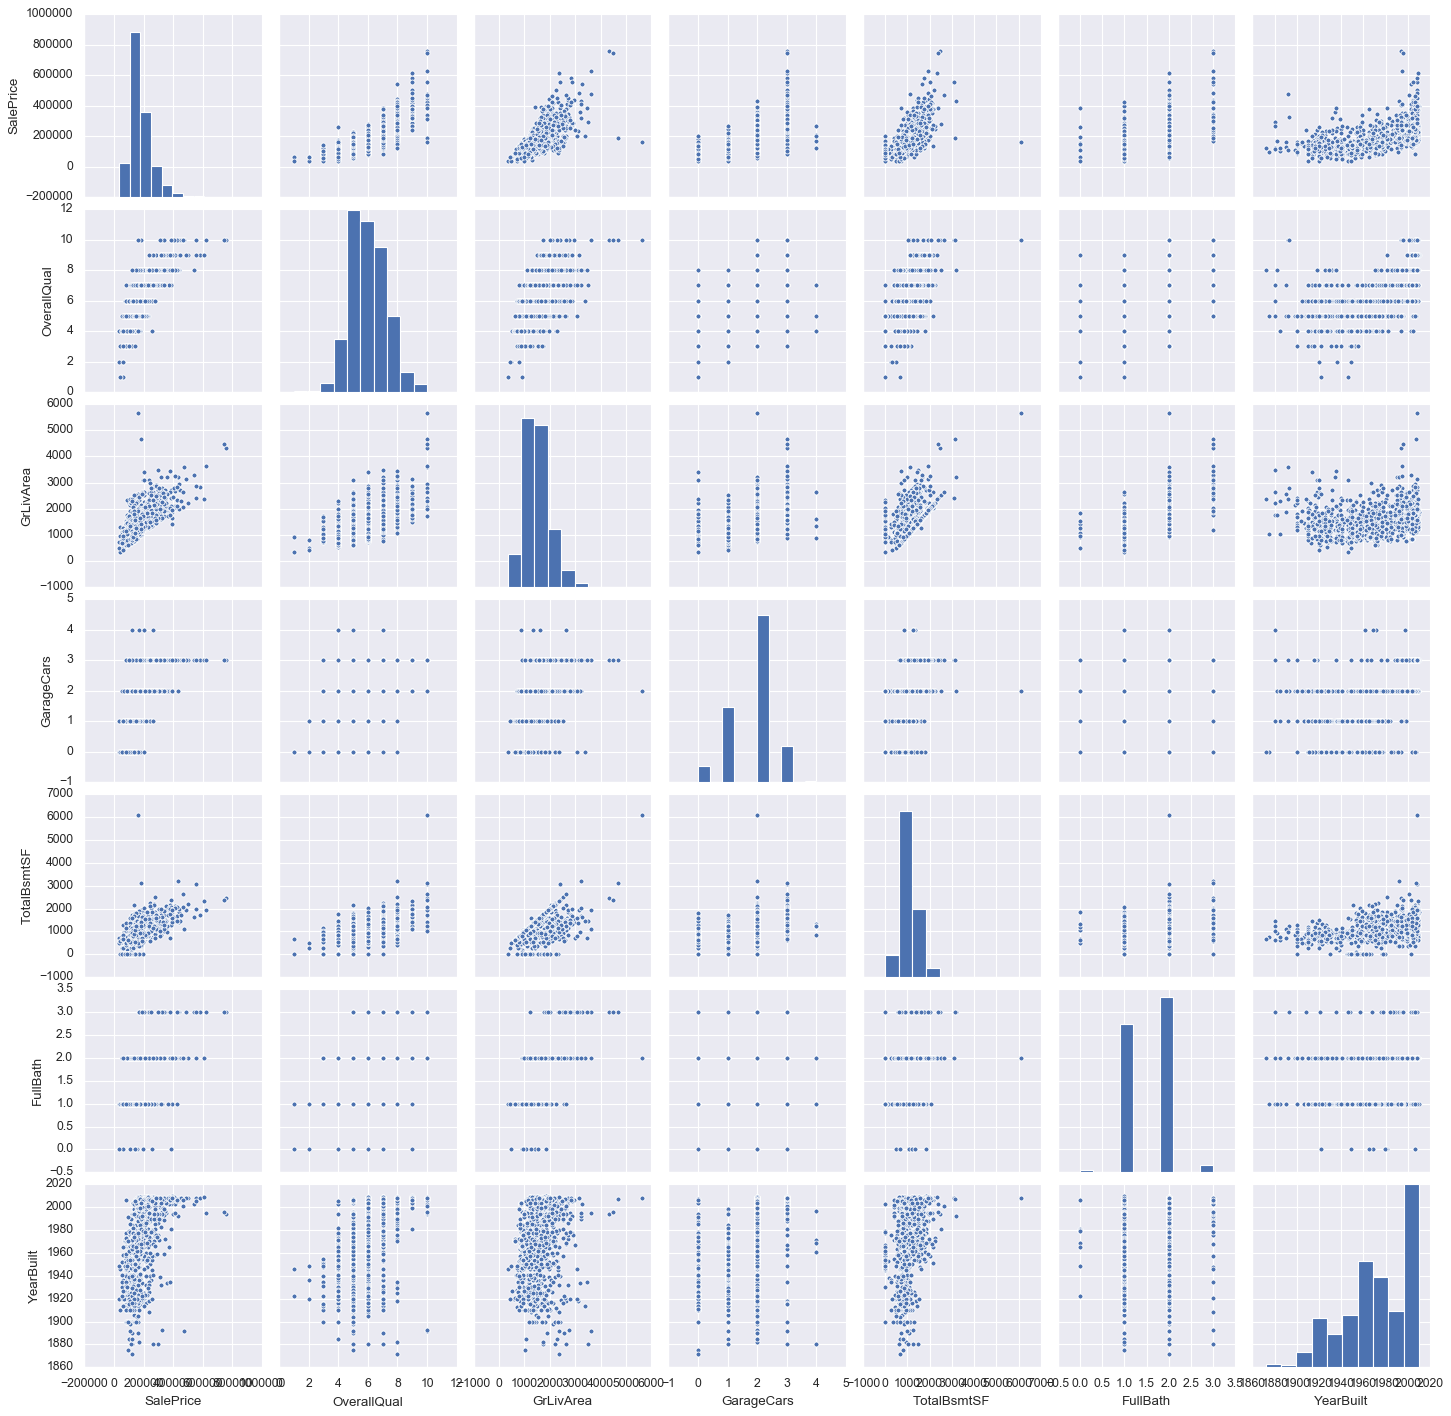

In [73]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

The plot reveals a lot of details. Every pair of variables can be observed. The relationship between 'GrLivArea' and 'TotalBsmtSF' is interesting because dots create a border that almost looks like a line. It can be interpreted that in most cases living area above ground is equal or bigger than basement area. 

## 3.2 Association between categorical features <a id="association-between-categorical">

After analyzing correlation between two numerical features, we want to do similar with categorical variables. Correlation in the context of categorical variables doesn't make sense so some kind of measure of association needs to be used.

### Measure of association 

In [74]:
import scipy.stats as ss

In [75]:
#Function chi2_contigency cannot work if there are missing values
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

Cramér’s V is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:

1. Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
2. Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

### Heatmap: categorical features

Now that we have a measure of association, the belonging matrix of associations can be also presented as a heatmap.

In [76]:
matrix=np.zeros((len(object_df.columns), len(object_df.columns)))
dict_ = {}
j=0
for attribute in object_df.columns:
    i=0
    for attribute_ in object_df.columns:
        matrix[i][j]=cramers_v(df_train[attribute], df_train[attribute_])
        if j>i:
            dict_[(attribute, attribute_)]=matrix[i][j] 
        i+=1
    j+=1 

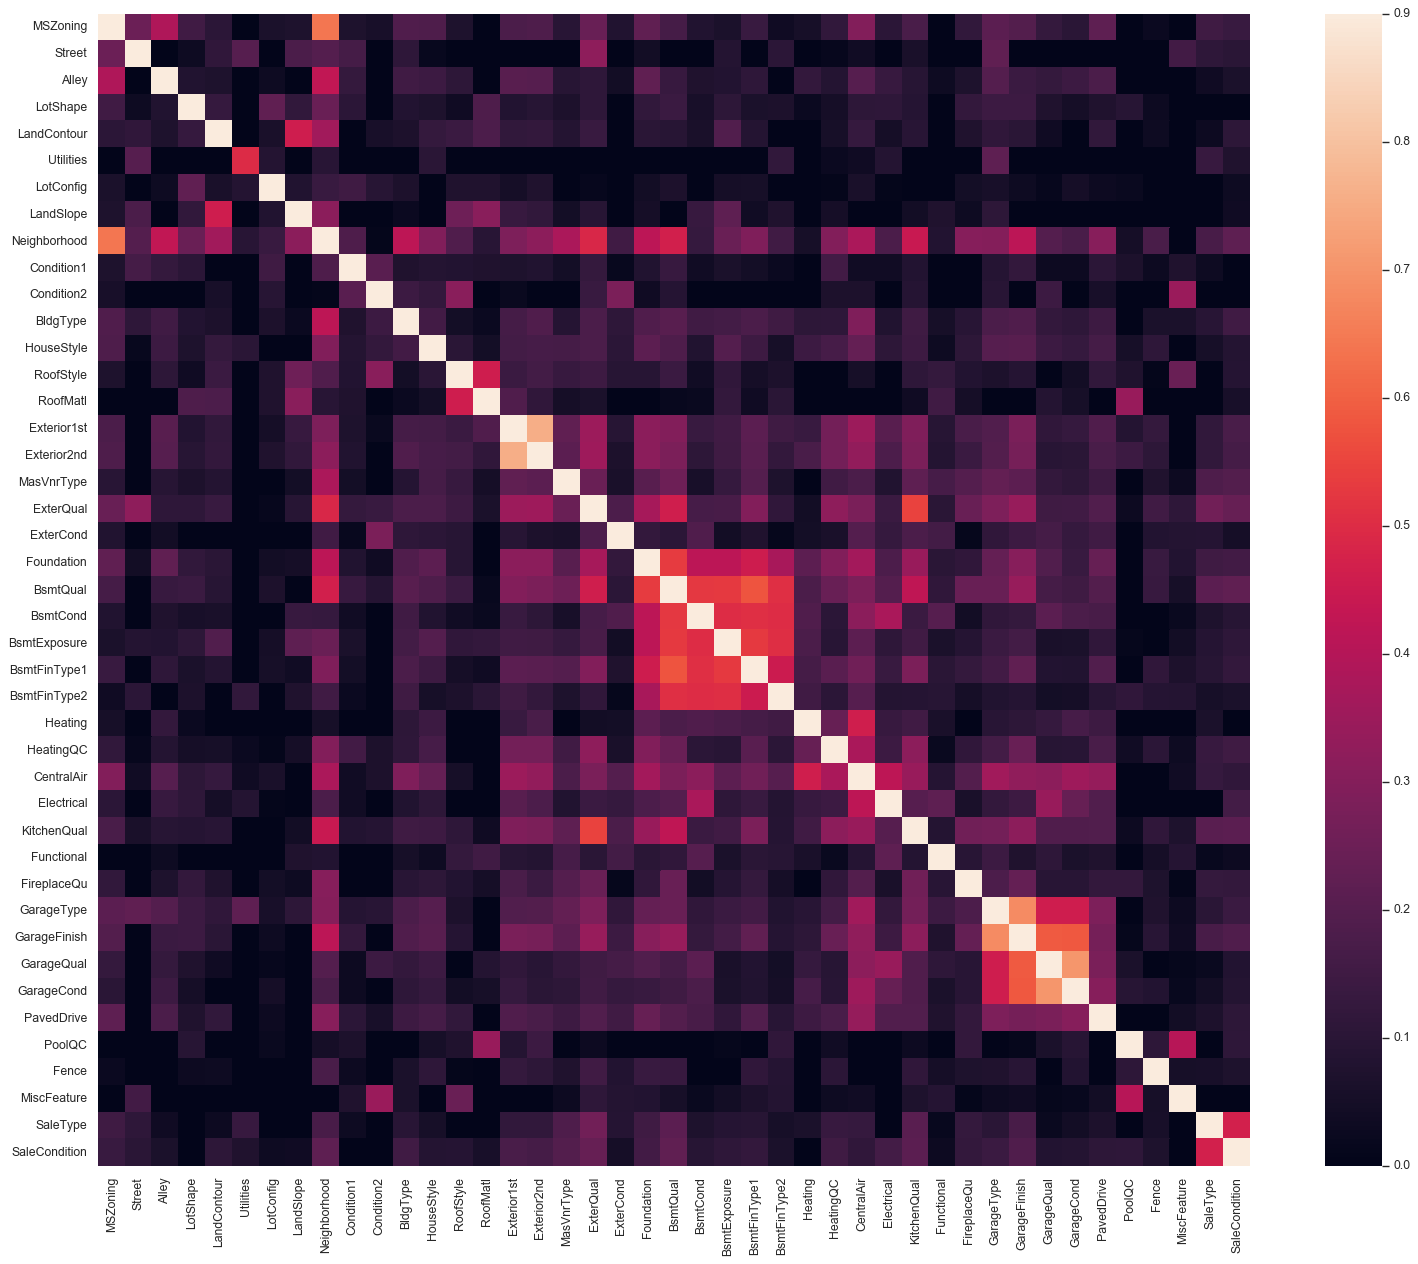

In [77]:
assmat = pd.DataFrame(matrix, index=object_df.columns, columns=object_df.columns)
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(assmat, vmax=0.9, square=True, yticklabels=object_df.columns.values, xticklabels=object_df.columns.values);

Looking at the heatmap, it is easy to notice some highly correlated pairs of features. For example, 'MSZoning' and 'Neighborhood' or 'GarageQual' and 'GarageCond'. Some of them are not so expected, like 'ExterQual' and 'KitchenQual'. Again, to avoid situations of multicollinearity, some of them shouldn't be considered anymore. That part will be a topic of discussion a little bit later after a measure of association between a categorical variable and 'SalePrice' is established.

### Correlation ratio

So now we have a way to measure the correlation between two continuous features, and a way of measuring association between two categorical features. But what about a pair of a continuous feature and a categorical feature? For this, we can use the Correlation Ratio (often marked using the greek letter eta: $\eta$). Mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples. Here too the output is on the range of [0,1]

In [78]:
train = pd.read_csv('data/train.csv')
object_df = train.select_dtypes(include=object)
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

It's time to use this measure to calculate association between numerical 'SalePrice' and categorical attributes.

In [79]:
array_ = np.zeros(len(object_df.columns))
dict_SalePrice = {}
i=0
for attribute in object_df.columns:
    dict_SalePrice[attribute] = correlation_ratio(train[attribute], train['SalePrice'])
    i+=1

In [80]:
mat = pd.DataFrame.from_dict(dict_SalePrice, orient='index', columns=['SalePrice'])
mat_largest = mat.nlargest(len(object_df.columns), 'SalePrice')

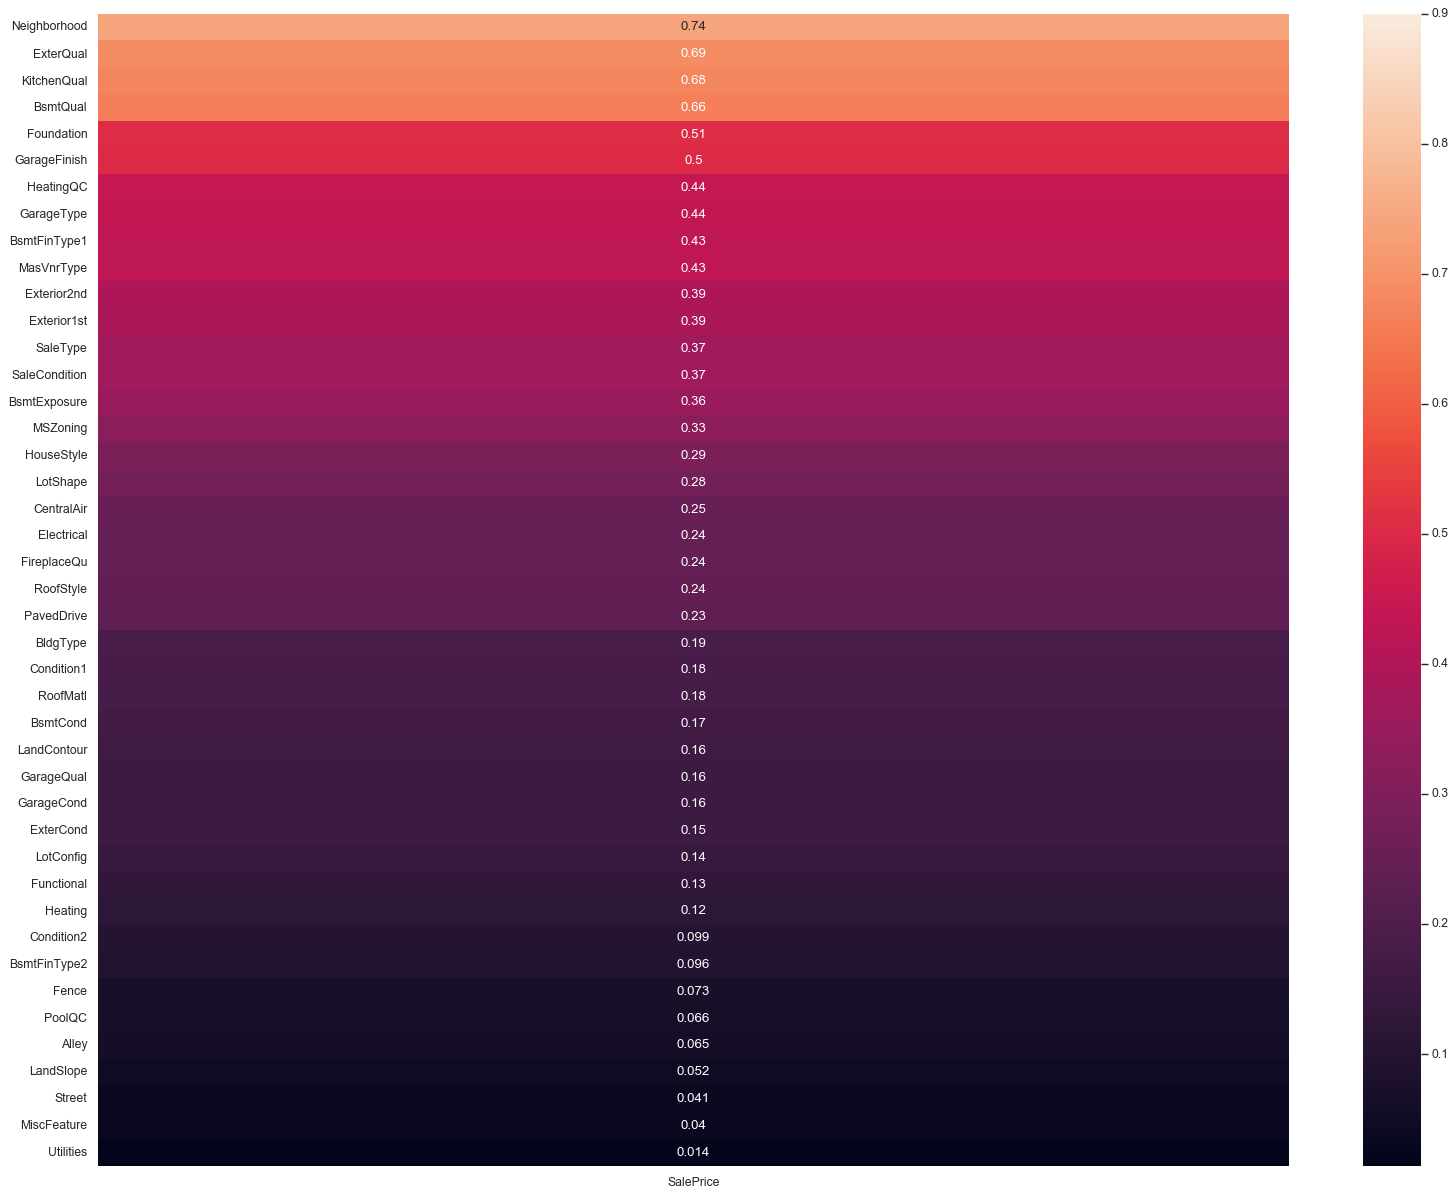

In [81]:
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(mat_largest, vmax=0.9, annot=True, square=False, yticklabels=mat_largest.index.values, xticklabels=['SalePrice']);

On this version of heatmap, it is nicely visualised association between categorical variables and 'SalePrice' and it eases choice of set of the most associated features with dependant variable.

Colors and numbers on heatmap indicate that 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'Foundation' and 'GarageFinish' are important. But, let's observe 'HeatingQC', 'GarageType', 'BsmtFinType1', 'MasVnrType' too, because it intuitively seems that they affect house prices.

### Determining significant categorical variables

Finally, we can investigate are there any features that are mutually, strongly associated among features plotted below.

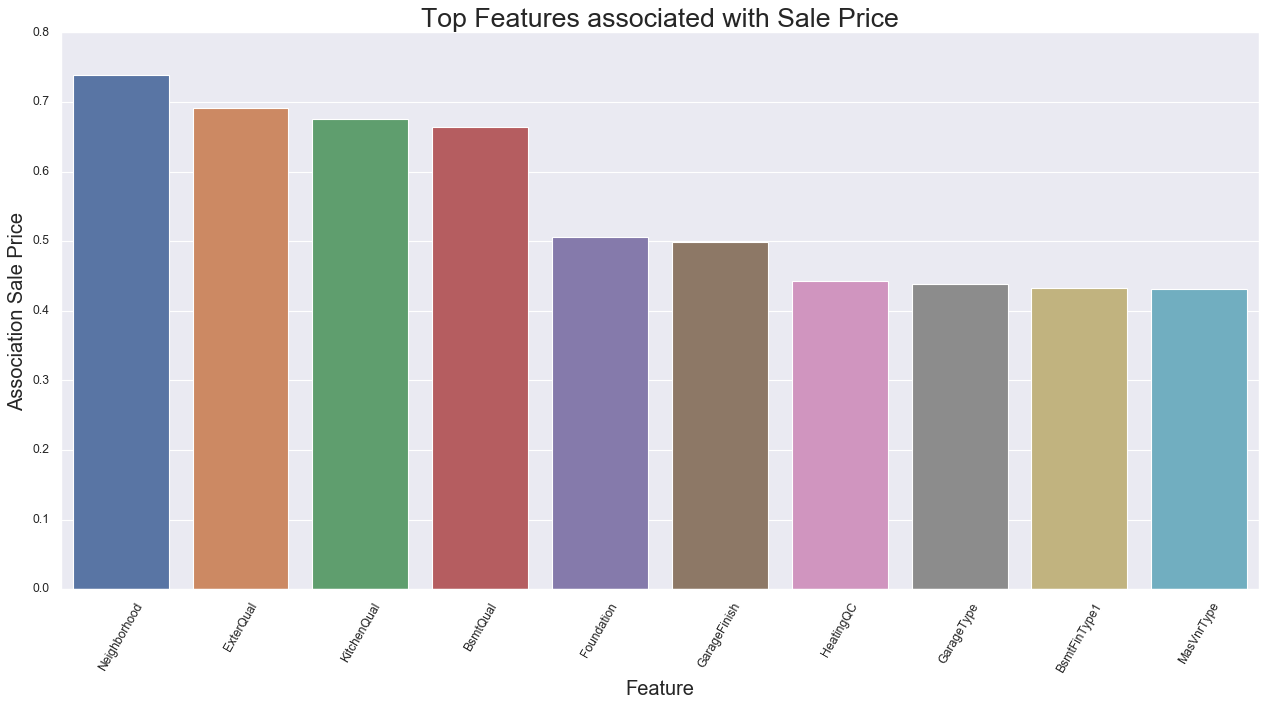

In [82]:
mat_largest = mat.nlargest(10, 'SalePrice')
plt.subplots(figsize=(16, 9))

sns.barplot(x=mat_largest.index, y=mat_largest['SalePrice'])

plt.title('Top Features associated with Sale Price', fontsize=24)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Association Sale Price', fontsize=18)

plt.xticks(rotation=60)
plt.tight_layout()

We have already seen categorical heatmap version but we should more thoroughly determine pairs of features with high values of association. Below are printed pairs and their association values. We will take a look only at features from the set of the most associated attributes with 'SalePrice'.

In [83]:
sorted_dict_ = sorted(((value, key) for (key,value) in dict_.items()), reverse=True)
sorted_dict_[0:20]

[(0.758874708545728, ('Exterior2nd', 'Exterior1st')),
 (0.7042330418322412, ('GarageCond', 'GarageQual')),
 (0.6847981757726301, ('GarageFinish', 'GarageType')),
 (0.6405920122845403, ('Neighborhood', 'MSZoning')),
 (0.5889137906457492, ('GarageQual', 'GarageFinish')),
 (0.5863628203551324, ('GarageCond', 'GarageFinish')),
 (0.5765813587886635, ('BsmtFinType1', 'BsmtQual')),
 (0.5457467769803231, ('KitchenQual', 'ExterQual')),
 (0.5312572781660444, ('BsmtQual', 'Foundation')),
 (0.5281864057945082, ('BsmtFinType1', 'BsmtExposure')),
 (0.5273876426673435, ('BsmtExposure', 'BsmtQual')),
 (0.5267465115620067, ('BsmtCond', 'BsmtQual')),
 (0.5069754665147986, ('BsmtFinType1', 'BsmtCond')),
 (0.5067228250652057, ('BsmtFinType2', 'BsmtQual')),
 (0.5040315035716163, ('BsmtFinType2', 'BsmtExposure')),
 (0.5018139008912222, ('BsmtExposure', 'BsmtCond')),
 (0.5012399502704398, ('BsmtFinType2', 'BsmtCond')),
 (0.48578228403245965, ('ExterQual', 'Neighborhood')),
 (0.47080293258827466, ('SaleCondit

Let's begin!

1. 'GarageFinish' and 'GarageType' have high association (0.68) so probably it is enough only to consider 'GarageFinish'.
2. 'BsmtFinType1' and 'BsmtQual' are also strongly associated so let's remove 'BsmtFinType1' because its association with 'SalePrice' is lower.
3. Surprisingly, 'KitchenQual' and 'ExterQual' have association 0.54. Hence, 'KitcheQual' will be removed.
4. 'Foundation' should also be dropped out due to association between 'BsmtQual' and 'Foundation'.

There are some other pairs printed but it is time to stop. Association values are not so high and we don't want to lose precious information in attributes.

<hr>
Conclusions of this section are:

1. Due to correlation analysis performed on numerical features, the most important numerical features are: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath' and 'YearBuilt'.
2. Due to association analysis performed on categorical features, the most important categorical features are: 'Neighborhood', 'ExterQual', 'BsmtQual', 'GarageFinish', 'HeatingQC', 'MasVnrType'.

Let's find outliers now. Now that we know which variables are more important than the others, we can focus on those facts while searching for outliers and we can classify outliers based on variable importance.
<hr>

# 4. Outliers <a id="outliers">

We want to mark the outliers but not yet remove them. We will decide exactly how to deal with them when we come to the modelling part of this project and see if our model is robust to outliers. We would rather keep as much as data possible and teach model to predict prices for all the possible data. Even though we will handle them later, it is good to notice them now.

To determine outliers, we will first analyze standard deviation and powerlaw distribution of *SalePrice* alone (**univariate analysis**) and then help ourselves with scatter and box plots to notice data that misbehave (**bivariate analysis**).

## 4.1 Univariate analysis <a id="univariate-analysis">

What can help us in recognizing outliers? Data distributions! First we will analyze data standardization and see if we can notice outliers in the tails. Then we will check if our data fit the powerlaw distribution since it is a common occuring in real estate prices.
<br>
<br>
### Data standardization
    
We rescale data to have a mean of 0 and a standard deviation of 1 (unit variance).

In [84]:
# Standardizing data
saleprice_standardized = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

# Extract data that are on lower and upper boundaries - those are candidates for outliers
lower_range = saleprice_standardized[saleprice_standardized[:,0].argsort()][:10]
upper_range = saleprice_standardized[saleprice_standardized[:,0].argsort()][-10:]

print('Outer LOWER range of the distribution:')
print(lower_range)

print('\nOuter UPPER range of the distribution:')
print(upper_range)

Outer LOWER range of the distribution:
[[-1.83752916]
 [-1.83235435]
 [-1.79975685]
 [-1.78212977]
 [-1.77331623]
 [-1.62222699]
 [-1.6159316 ]
 [-1.58445468]
 [-1.58445468]
 [-1.57195204]]

Outer UPPER range of the distribution:
[[3.82957644]
 [4.04156724]
 [4.49688725]
 [4.71093034]
 [4.73083635]
 [5.06262832]
 [5.4242856 ]
 [5.59228425]
 [7.10317665]
 [7.22908435]]


Note:
- Lower range values are similar and not too far from 0.
- Upper range values are far from 0 and the 7.x values are really out of range.

We will find these 7.x houses in section [bivariate analysis](#bivariate-analysis) little later.

### Power-Law distribution

A power law is a functional relationship between two quantities, where a relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities: one quantity varies as a power of another. For instance, considering the area of a square in terms of the length of its side, if the length is doubled, the area is multiplied by a factor of four.

Since our "House Prices Prediction" problem seems like it belongs to the same category as real estate prices, and real estate prices are generally power law distributed, we will check if our data are too. Using this fact we could explain some "misbeaviours" of the data.

In [85]:
#import powerlaw

Let's begin. As *Clauset A, Shalizi CR, Newman MEJ: Power-law distributions in empirical data, 2009* suggests, steps in confirming whether an empirical variable (in our case *SalePrice*) follows the P-L distribution are:
1. Estimate the parameters $x_{min}$ and $\alpha$ of the power-law model. 
2. Calculate the Kolmogorov-Smirnov value (goodness-of-fit) between the data and the power-law.
3. Use a bootstrapping procedure to calculate the p-value from a K-S value. If the resulting p-value is greater than 0.1, the power-law is a plausible hypothesis for the data, otherwise it is rejected.

The first step of fitting a power law is to determine what portion of the data to fit. A heavy-tailed distribution's interesting feature is the tail and its properties, so if the initial, small values of the data do not follow a power law distribution the user may opt to disregard them. The question is from what minimal value $x_{min}$ the scaling relationship of the power law begins. Usual method is to find this optimal value of $x_{min}$ by creating a power law fit starting from each unique value in the dataset, then selecting the one that results in the minimal Kolmogorov-Smirnov distance, $D$, between the data and the fit. As power laws are undefined for $x = 0$, there must be some minimum value. Thus, even if a given dataset brings with it domain-specific reasoning that the data must follow a power law across its whole range, the user must still dictate an $x_{min}$. This could be a theoretical minimum, a noise threshold, or the minimum value observed in the data.

In [86]:
data = df_train['SalePrice']
fit = powerlaw.Fit(data)
xmin = fit.xmin
xmax = fit.xmax
alpha = fit.power_law.alpha
D = fit.power_law.D
print("xmin = {}, xmax = {}, alpha = {}, D = {}" .format(xmin, xmax, alpha, D))

xmin = 224900.0, xmax = None, alpha = 4.962948384937905, D = 0.04964298287132246


Calculating best minimal value for power law fit


Let's first visualize the power law distribution in the context of our data. For calculating or plotting CDFs ($P(X < x)$), CCDFs ($P(X\geq x)$), and PDFs ($P(X)$) by default Fit objects only use data above $x_{min}$ and below $x_{max}$ (if present). The Fit object's plotting commands can plot all the data originally given to it with the keyword $original\_data = True$. 

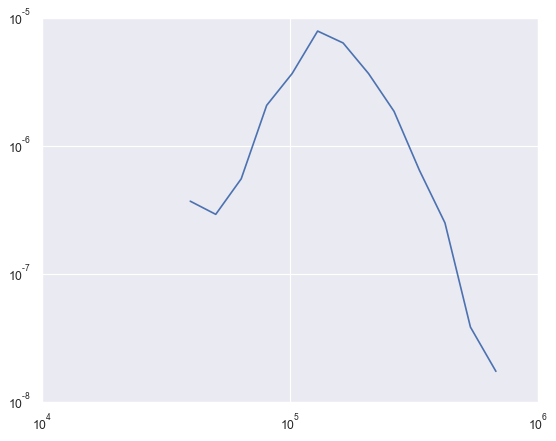

In [87]:
powerlaw.plot_pdf(data, color='b')

The plot visualizes PDFs ($P(X)$) of the *SalePrice*. It doesn't look optimistic.

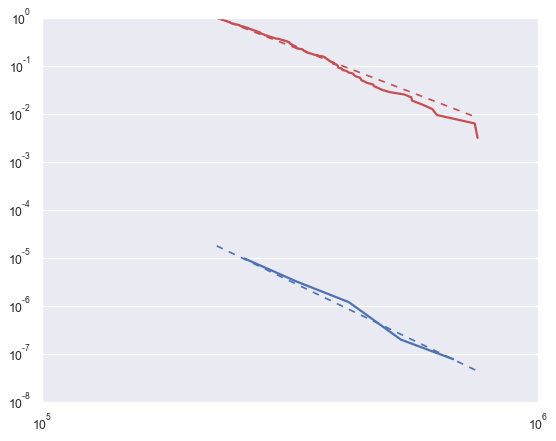

In [88]:
fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)

This plot shows probability density function (PDF; $P(X)$; blue) and complemenatary cumulative distribution function (CCDF; $P(X\geq x)$; red) of *SalePrice*. The plot is not optimistic.

The goodness of fit for each distribution (including power law) can be considered individually or by comparison to the fit of other distributions (respectively, using bootstrapping and the Kolmogorov-Smirnov test to generate a p-value for an individual fit vs. using loglikelihood ratios to identify which of two fits is better). Even though earlier we mentioned bootstrapping as the method we will follow, here are several reasons, both practical and philosophical, to focus on the latter, comparative tests:
- Practically, bootstrapping is more computationally intensive and loglikelihood ratio tests are faster. 
- Philosophically, it is frequently insufficient and unnecessary to answer the question of whether a distribution “really” follows a power law. Instead the question is whether a power law is the best description available. In such a case, the knowledge that a bootstrapping test has passed is insufficient; bootstrapping could indeed find that a power law distribution would produce a given dataset with sufficient likelihood, but a comparative test could identify that a lognormal fit could have produced it with even greater likelihood. 
- Given enough data, an empirical dataset with any noise or imperfections will always fail a bootstrapping test for any theoretical distribution. 

Thus, it is generally more sound and useful to compare the fits of few candidate distributions, and identify which one fits the best.

In [89]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print(R, p)

-0.46292773600557574 0.6434161658983111


$R$ is the loglikelihood ratio between the two candidate distributions. This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. The significance value for that direction is $p$. The $normalized\_ratio$ option normalizes $R$ by its standard deviation, $\frac{R}{\sigma \sqrt(n)}$. The normalized ratio is what is directly used to calculate $p$.

The exponential distribution is the absolute minimum alternative candidate for evaluating the heavy-tailedness of the distribution. The reason is definitional: the typical quantitative definition of a "heavy-tail" is that it is not exponentially bounded. Thus if a power law is not a better fit than an exponential distribution (as it isn't in our above example) there is scarce ground for considering the distribution to be heavy-tailed at all, let alone a power law.

However, the exponential distribution is, again, only the minimum alternative candidate distribution to consider when describing a probability distribution. The fit object contains a list of supported distributions in fit.supported_distributions.

In [90]:
fit.supported_distributions

{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [91]:
R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R, p)

-1.3503245986619656 0.17691188525959856


As expected, if the test didn't pass for "exponentional", hardly would it pass for "lognormal".

Even though we said we won't use bootstrapping to calculate the p-value from a K-S value, our results didn't come out as expected so let's conclude these findings peacefull with Kolmogorov-Smirnov test.

In [92]:
#import scipy
#from scipy import stats

In [93]:
len(fit.cdf()[0]) # because it takes only portion of the data starting from xmin

218

In [94]:
fit.lognormal.cdf().shape

(320,)

In [95]:
print('powerlaw', scipy.stats.kstest(fit.cdf()[0], "powerlaw", args=(alpha, xmin), N=data.shape[0], mode='asymp'))

powerlaw KstestResult(statistic=0.9954128440366973, pvalue=4.806505686045829e-188)


(scipy.stats.kstest uses "powerlaw" as an input and checks if the distribution of the data is the same as scipy.stats.powerlaw.cdf with default parameters args.)<br>
If the resulting p-value $p > 0.1$, the power law is a plausible hypothesis for the data and it is okay to proceed as if the data is consistent with being drawn by from powerlaw distribution. If the resulting p-value $p < 0.1$, it is rejected.<br>
As we can see, our p-value is $p < 0.1$, so we confirmed that our target variable *SalePrice* doesn't follow the powerlaw distribution.

Our data do not follow power-law distribution even though we expected that it does. We cannot use this type of "phenomenology" as an argument for specific outliers.<br>
<br>
<br>
Let's move on to finding out more about the candidates for outliers. We will do this by including other correlated variables in the game. Official name for this pair-wise game is *bivariate analysis*.<br>
<br>

## 4.2 Bivariate analysis <a id="bivariate-analysis">

Let's look at the following scatter and box plots once again. Now that we are more into our data, we might notice something new.

First, we will analyze one by one the relationships between *SalePrice* and its most correlated columns discovered in previous [section 3](#analysis-of-dimensionality). <br>
Then we will throw a glance at the rest of the correlated variables.

We will mark down the outliers by saving their *Id*s in the list *outliers_id*.

In [96]:
# List where we will save Ids of all outliers
outliers_id = []

<br>

### 4.2.1 Most correlated variables <a id="most-correlated-variables">
    
As concluded in previous [section 3](#analysis-of-dimensionality), most correlated variables are:
- **numerical**: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath' and 'YearBuilt'
- **categorical**: 'Neighborhood', 'ExterQual', 'BsmtQual', 'GarageFinish', 'HeatingQC', 'MasVnrType'
    
In general, for numerical variables we plot scatter plots and for categorical variables we plot box plots. Some numerical variables take on only several values so we plot those with box plots.

#### <u>Numerical variables</u>

We will analyze *GrLivArea* thoroughly and then move through the rest of the numerical variables a bit quicker.

In [97]:
most_corr_numerical = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt']

#### <font color="purple"> *GrLivArea* </font>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


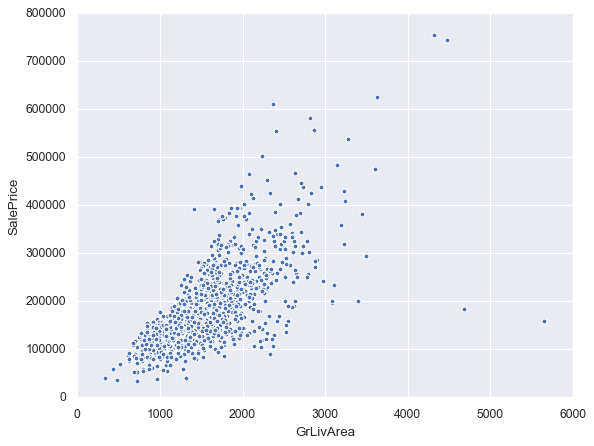

In [98]:
# Bivariate analysis: Saleprice/GrLivArea

variable = 'GrLivArea'

bivariate = pd.concat([df_train['SalePrice'], df_train[variable]], axis=1)
bivariate.plot.scatter(x=variable, y='SalePrice', ylim=(0,800000))

We notice some possible outliers but let's get more informations into our scatter plot. Let's distinct data by building type and maybe confirm that the prices are justified:

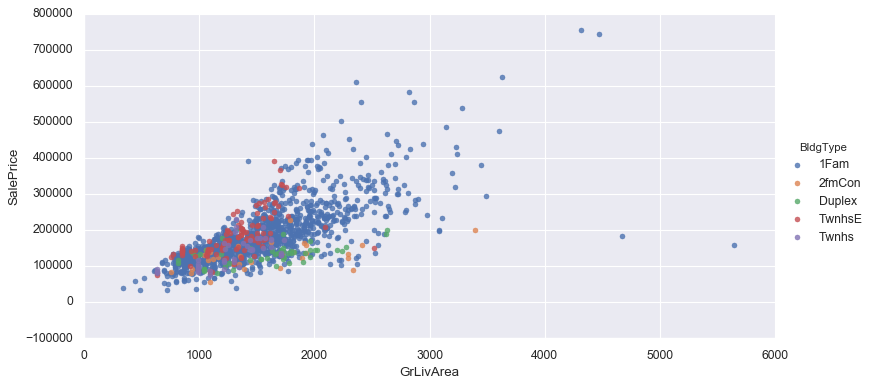

In [99]:
# Scatter plot grouped by 'BldgType'
sns.lmplot(x='GrLivArea', y='SalePrice', hue='BldgType', aspect=2, fit_reg=False, data=df_train)

Observations and conclusions:

1) The two values with bigger 'GrLivArea' and smaller 'SalePrice' in the bottom right part of the plot are not following the ray with the rest of the points. We can't know what is happening here but we can quite strongly conclude that these are not typical data, hence we consider them as outliers. <br><br>
2) The two observations in the top of the plot are those 7.x observations mentioned above. Even though they look like outliers, they do follow the ray. For that reason, we will keep them. If they were different building type than *1Fam*, for example the red one, they would be too far from their group and we would consider marking them as outliers.

In [100]:
# Find outliers from observation 1) and save them to outliers_id
df_train2 = df_train[['Id']][(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000)]
print("New ones: {}" .format(df_train2['Id'].tolist()))
print("Duplicates: {}" .format(set(outliers_id) & set(df_train2['Id'].tolist())))

outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id)
print("Outliers: {}" .format(outliers_id))

New ones: [524, 1299]
Duplicates: set()
Outliers: [524, 1299]


<br>

#### <font color="purple"> TotalBsmtSF, YearBuilt </font>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


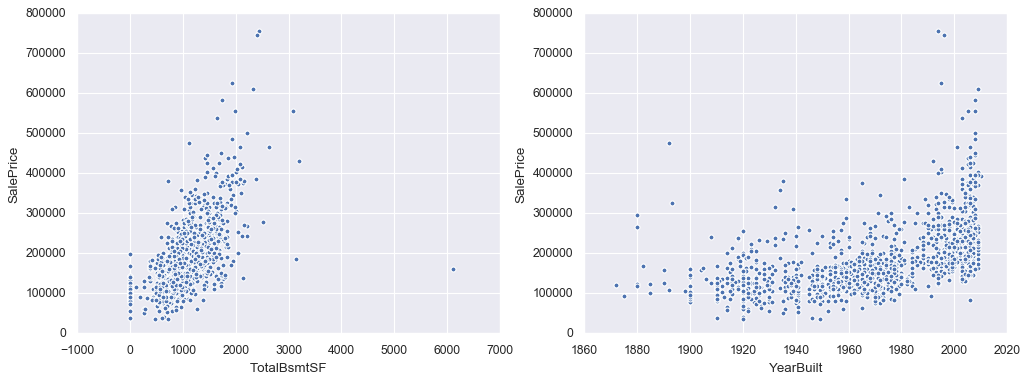

In [101]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

for i,variable in enumerate(['TotalBsmtSF', 'YearBuilt']):
    bivariate = pd.concat([df_train['SalePrice'], df_train[variable]], axis=1)
    bivariate.plot.scatter(x=variable, y='SalePrice', ylim=(0,800000), ax=ax[i])

Observations:
- **TotalBsmtSF**: We feel tempted to remove some points (e.g. *TotalBsmtSF* > 3000) but a closer look tells us that all the points really follow the pattern, except the one with *TotalBsmtSF* > 6000. That is actually one of the outliers that we marked in *GrLivArea* and it definitely looks like an outlier here too.
- **YearBuilt**: We recognize two points in the top right corner as outliers. We find that these houses are not that young to be that modern or something to have so high prices. Also, that one point between 1880 and 1900 with *SalePrice* > 400,000 really looks like it doesn't belong here. The one below it, is on the wedge, too, but we will leave it, since our intuition doesn't let us remove it. We take in consideration that old houses sometimes take on higher *SalePrice* because of their location and "statement", like the old towns in the center of every major city.

In [102]:
# Find those four outliers
df_train1 = df_train[['Id']][df_train['TotalBsmtSF'] > 6000]
df_train2 = df_train[['Id']][(df_train['SalePrice'] > 700000) & (df_train['YearBuilt'] > 1980)]
df_train3 = df_train[['Id']][(df_train['SalePrice'] > 400000) & (df_train['YearBuilt'] < 1900)]

print("New ones: {}, {}, {}" .format(df_train1['Id'].tolist(), df_train2['Id'].tolist(), df_train3['Id'].tolist()))
print("Duplicates: {}, {}, {}" .format((set(outliers_id) & set(df_train1['Id'].tolist())), (set(outliers_id) & set(df_train2['Id'].tolist())), set(outliers_id) & set(df_train3['Id'].tolist())))

outliers_id.extend(x for x in df_train1['Id'].tolist() if x not in outliers_id)
outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id) #df_train2['Id'].tolist())
outliers_id.extend(x for x in df_train3['Id'].tolist() if x not in outliers_id) #df_train3['Id'].tolist())
print("Outliers: {}" .format(outliers_id))

New ones: [1299], [692, 1183], [186]
Duplicates: {1299}, set(), set()
Outliers: [524, 1299, 692, 1183, 186]


<br>

#### <font color="purple"> OverallQual, GarageCars, FullBath </font>

These variables are numerical, they are of type int, but they represent categories so we plot their relationships with *SalePrice* as box plots.

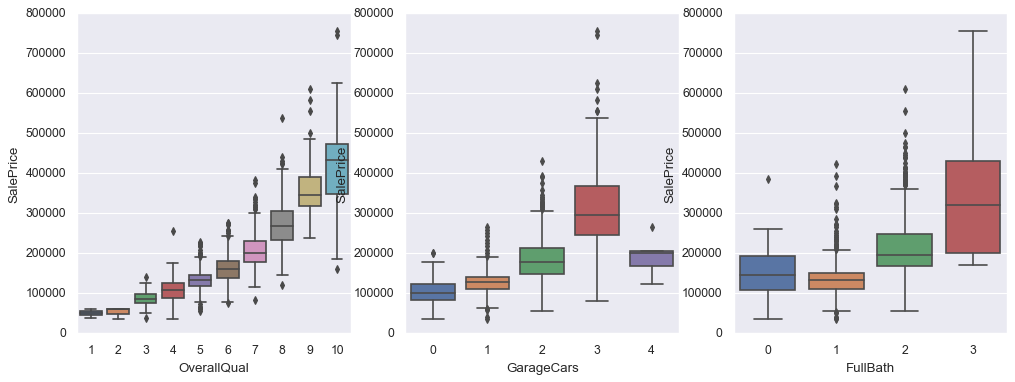

In [103]:
# Box plot SalePrice/OverallQual
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

for i,var in enumerate(['OverallQual', 'GarageCars', 'FullBath']):
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    sns.boxplot(x=var, y="SalePrice", data=data, ax=ax[i])

No data recognized as outliers.

Observations:
- **OverallQual**: The points that could be taken in consideration are with *OverallQual* = 4 and *SalePrice* > 200,000, with *OverallQual* = 8 and *SalePrice* > 500,000 and with *OverallQual* = 10 and *SalePrice* > 700,000. Though, the last condition is not so off since it is not unnormal for houses with such good quality to have the biggest prices. Maybe they are in such good condition that they are the best among the best. There is no higher category after *OverallQual*=10. Furthermore, these two points are exactly those two outliers in top right corner of the *YearBuilt* plot. So we see that the price of those two outliers is actually justified by the excellent overall quality. Hence, we will remove those two data from the outliers. As for those two points with *OverallQual* 4 and 8, we will mark them as outliers.
- **GarageCars**: We wouldn't single out any of the points here. There might be some outliers for *GarageCars*=3, but a garage so large that it can accomodate three cars, can be a sign of a really lavish house, hence the high price is justified.
- **FullBath**: The only point concerning us is the one with zero bathrooms and *SalePrice* around 400,000$. We will investigate if it has other bathrooms (maybe in the basement or half bathrooms).

In [104]:
# Proof that two houses with OverallQual = 10 and SalePrice > 700,000
# are also the ones in the top right corner of the YearBuilt plot
df_train2 = df_train[['Id']][(df_train['SalePrice'] > 700000) & (df_train['OverallQual'] == 10) 
                             & (df_train['YearBuilt'] > 1980) & (df_train['YearBuilt'] < 2000)]
df_train2

Id
691    692
1182  1183

In [105]:
# Delete them from the outliers list
outliers_id.remove(692)
outliers_id.remove(1183)
outliers_id

[524, 1299, 186]

In [106]:
# Add outliers with OverallQual=4,8
df_train2 = df_train[['Id']][((df_train['SalePrice'] > 200000) & (df_train['OverallQual'] == 4)) | 
                            ((df_train['SalePrice'] > 500000) & (df_train['OverallQual'] == 8))]

print("New ones: {}" .format(df_train2['Id'].tolist()))
print("Duplicates: {}" .format( set(outliers_id) & set(df_train2['Id'].tolist()) ))

outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id)
print("Outliers: {}" .format(outliers_id))

New ones: [458, 770]
Duplicates: set()
Outliers: [524, 1299, 186, 458, 770]


Let's show that the point from *FullBath* is not an outlier. We will print all the variables that describe different types of bathrooms in the house and we will print the most correlated variables to get a feeling about the house. We will see that this house actually has 2 bathrooms in the basement and 1 additional half-bathroom in the above grade area of the house. So this house doesn't have a problem with bathrooms, and the price is not so weird anymore. Additionaly, we see that house's overall quality is great (9) and it has *GrLivArea* and *TotlBsmtSF* above averages. That's why we won't consider this point as an outlier, it only looks like an outlier in the plot because of lack of information.

In [107]:
# Check the point with FullBath=0
df_train2 = df_train[(df_train['SalePrice'] > 300000) & (df_train['FullBath'] == 0)].copy()
a = df_train['TotalBsmtSF'].mean()
b = df_train['GrLivArea'].mean()
df_train2['Mean(TotalBsmtSF)'] = a
df_train2['Mean(GrLivArea)'] = b

df_train2[['FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
          'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'YearBuilt', 'Mean(TotalBsmtSF)', 'Mean(GrLivArea)']].head()

FullBath  BsmtFullBath  BsmtHalfBath  HalfBath  GrLivArea  TotalBsmtSF  \
53         0             2             0         1     1842.0       1842.0   

    OverallQual  GarageCars  YearBuilt  Mean(TotalBsmtSF)  Mean(GrLivArea)  
53            9           3       1981        1056.039095      1515.207133

<br>

#### <u>Categorical variables</u>

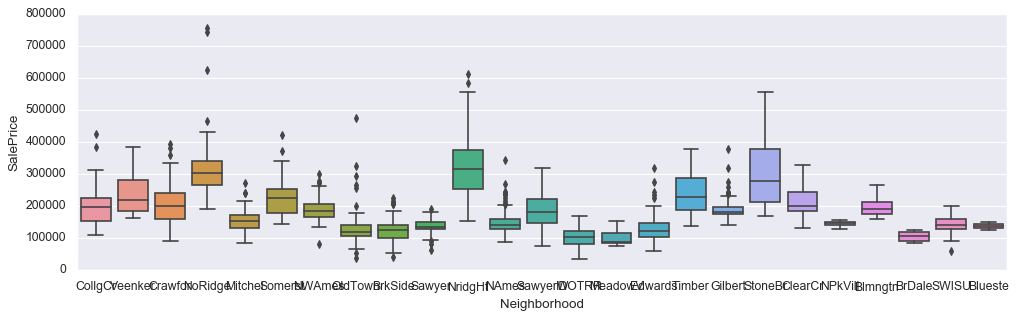

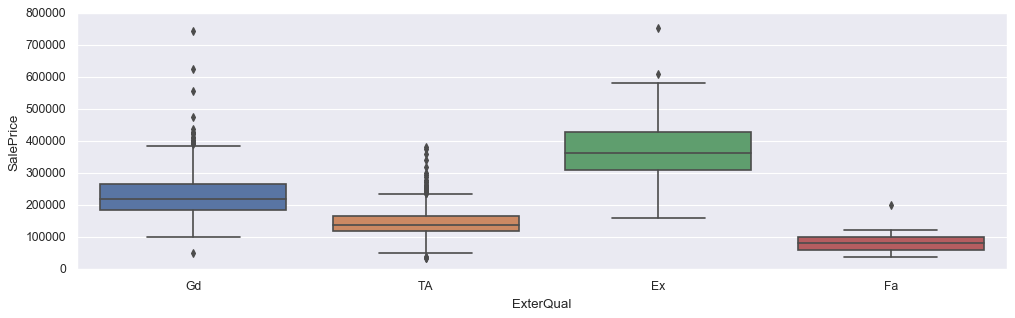

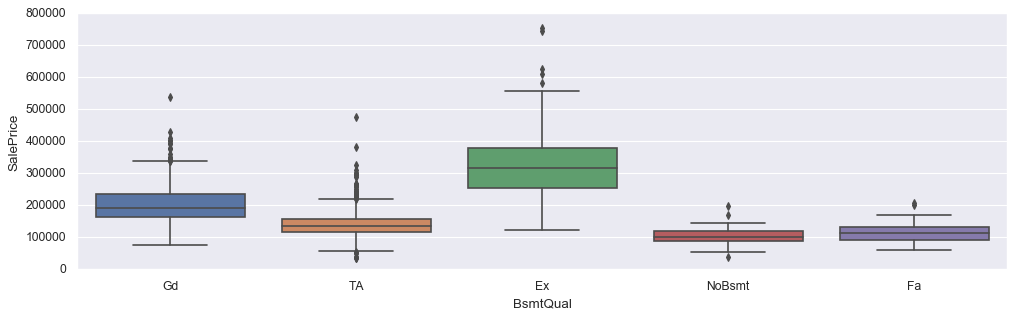

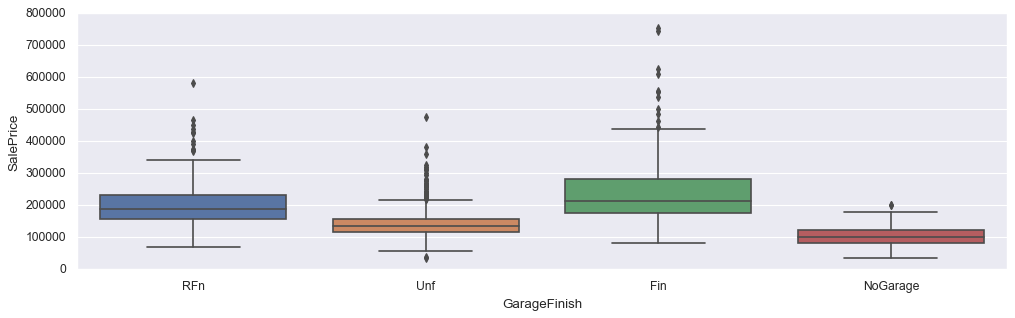

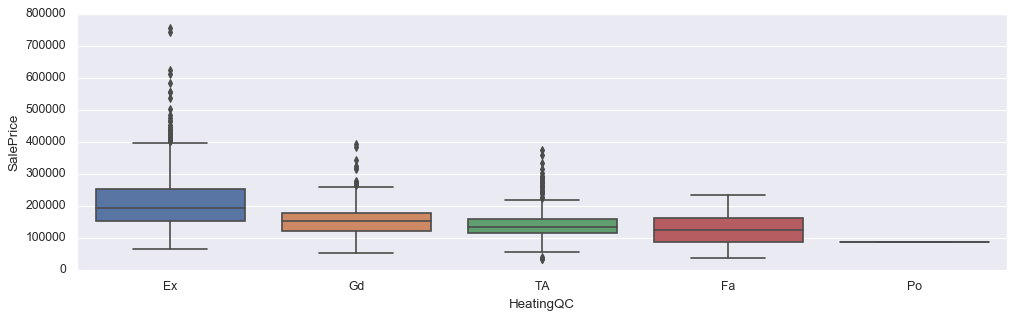

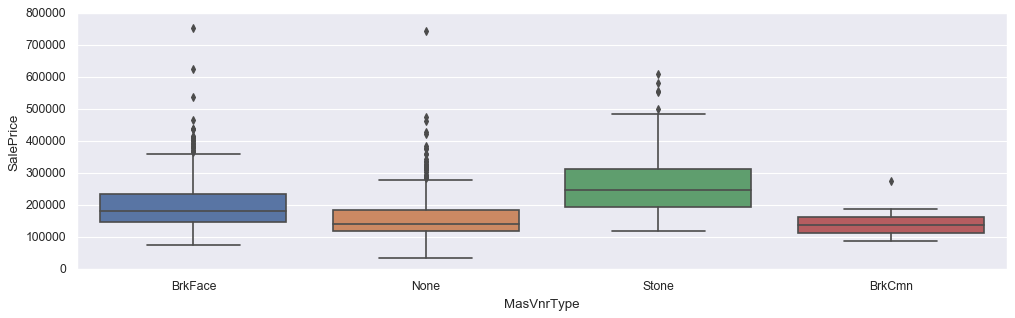

In [108]:
# Box plot SalePrice/col
most_corr_categorical = ['Neighborhood', 'ExterQual', 'BsmtQual', 'GarageFinish', 'HeatingQC', 'MasVnrType']

for var in most_corr_categorical:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(15, 4))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

Observations:
- **Neighborhood**: It's hard for us to discuss this variable because we don't know anything about these neighbourhoods. Only points that extremly stick out are the three points in neighbourhood "NoRidge" with *SalePrice* > 600,000 and one point in the "OldTown" with *SalePrice* ~ 500,000. We will go into more details with these points.
- **ExterQual**: Only point that strikes us is the one with *ExterQal* = "Ex" and with *SalePrice* > 700,000. But since "Ex" means "excellent quality of the material on the exterior" (that is the highest category), it is acceptable that the points with best exterior quality can jump in price. We will not consider it as an outlier.
- **BsmtQual**: Nothing strikes us here.
- **GarageFinish**: Nothing strikes us here.
- **HeatingQC**: Nothing strikes us here.
- **MasVnrType**: The point with *MasVnrType* = "None" is not expected to be among the most priced houses because *MasVnrX* variables (both *MasVnrArea* and *MasVnrType*) are highly correlated with our *SalePrice* (as stated in [section 3](#analysis-of-dimensionality) - with correlation approx 0.5) and should have high influence in setting the price. We will consider it as an outlier until convinced of the opposite.

In [109]:
# Check the Neighbourhood points

# Extract the rows
df_train2 = df_train[((df_train['SalePrice'] > 600000) & (df_train['Neighborhood'] == "NoRidge"))
                        | ((df_train['SalePrice'] > 400000) & (df_train['Neighborhood'] == "OldTown"))].copy()

# Add additional columns: 'Mean(TotalBsmtSF)', 'Mean(GrLivArea)' and 'Mean(LotFrontage)' (grouped by Neighborhoods)
a = df_train['TotalBsmtSF'].mean()
b = df_train['GrLivArea'].mean()
noridge_lf_mean = df_train.groupby('Neighborhood').mean()['LotFrontage']['NoRidge']
oldtown_lf_mean = df_train.groupby('Neighborhood').mean()['LotFrontage']['OldTown']
lf_mean = [oldtown_lf_mean, noridge_lf_mean, noridge_lf_mean, noridge_lf_mean]

df_train2['Mean(TotalBsmtSF)'] = a
df_train2['Mean(GrLivArea)'] = b
df_train2['Mean(LotFrontage)'] = lf_mean

df_train2[['Neighborhood', 'LotFrontage', 'Alley', 'Street',
           'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageCars', 'YearBuilt', 
           'Mean(LotFrontage)', 'Mean(TotalBsmtSF)', 'Mean(GrLivArea)']]

Neighborhood  LotFrontage    Alley Street  GrLivArea  TotalBsmtSF  \
185       OldTown         90.0  NoAlley   Pave     3608.0       1107.0   
691       NoRidge        104.0  NoAlley   Pave     4316.0       2444.0   
1169      NoRidge        118.0  NoAlley   Pave     3627.0       1930.0   
1182      NoRidge        160.0  NoAlley   Pave     4476.0       2396.0   

      OverallQual  GarageCars  YearBuilt  Mean(LotFrontage)  \
185            10           3       1892          62.690265   
691            10           3       1994          91.707317   
1169           10           3       1995          91.707317   
1182           10           3       1996          91.707317   

      Mean(TotalBsmtSF)  Mean(GrLivArea)  
185         1056.039095      1515.207133  
691         1056.039095      1515.207133  
1169        1056.039095      1515.207133  
1182        1056.039095      1515.207133

We printed out the variables that are most connected to the neigbourhood (*LotFrontage*, *Alley*, *Street*) and the variables that have the most influence on our *SalePrice* (most correlated variables). We see that all of those prices are justified by excellent overall quality, great garage capacity, and their values are above average values. We even compared their LotFrontages with the average LotFrontage in their neighbourhood. Prices of these houses seem justified so we won't consider them as outliers.

Let's go on to the 1 point from *MasVnrType*.

In [110]:
# Add the outlier from MasVnrType
df_train2 = df_train[['Id']][((df_train['SalePrice'] > 700000) & (df_train['MasVnrType'] == 'None'))]

print("New ones: {}" .format(df_train2['Id'].tolist()))
print("Duplicates: {}" .format( set(outliers_id) & set(df_train2['Id'].tolist()) ))

outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id)
print("Outliers: {}" .format(outliers_id))

New ones: [1183]
Duplicates: set()
Outliers: [524, 1299, 186, 458, 770, 1183]


Actually, *Id* = 1183 brings some flashbacks. We already considered this point as an outlier in *YearBuilt*, then removed it after justification of price with excellent *OverallQual* but here it comes again. This point sticks out from the most important variables but has one of the highest prices. This could be an outlier after all. It doesn't follow the behaviour of the others. It might confuse our model.

### 4.2.2 Rest of the variables <a id="rest-of-variables">

We will now take in at a glance at the rest of the scatter graphs. First we will observe numerical ones, then the categorical ones.

In [111]:
# Number of all variables in our dataset
len(df_train.columns)

81

In [112]:
# Make a list of numerical variables correlated to variable 'SalePrice'

# Function .corr() returns pair-wise correlations
corr_numerical = list(df_train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).index.values)

# Remove variables that we already analyzed
corr_numerical = [i for i in corr_numerical if i not in most_corr_numerical]

# Remove 'SalePrice' from corr_list
corr_numerical.remove('SalePrice')

# Function .corr() ignores non-numerical columns. Thats why there are only 31 variables in our corr_list.
len(corr_numerical)

31

Let's see the scatter graphs SalePrice/col for all columns in *corr_list*:

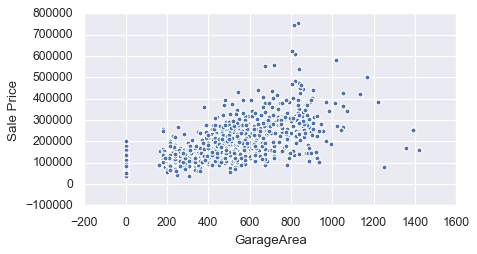

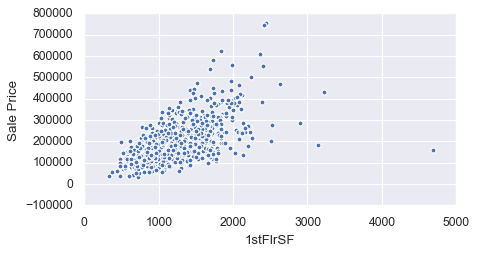

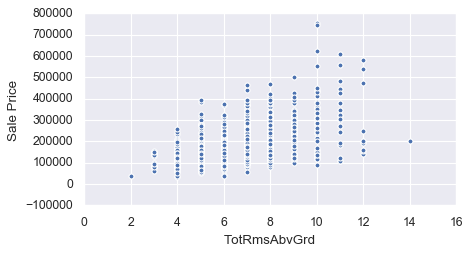

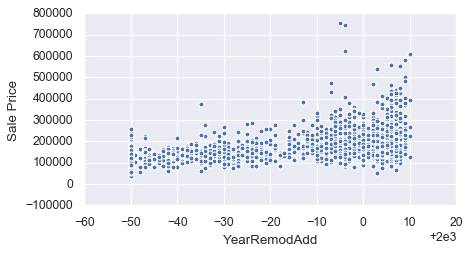

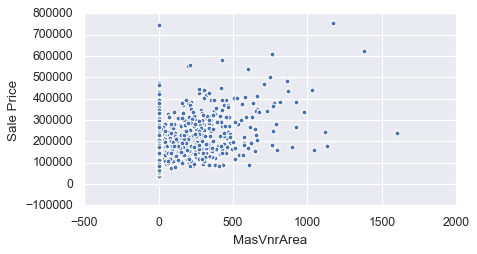

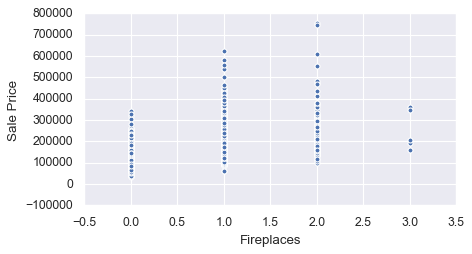

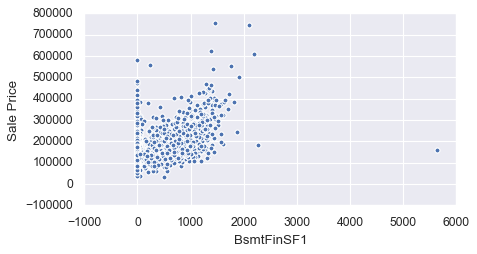

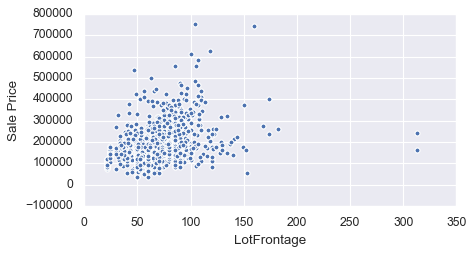

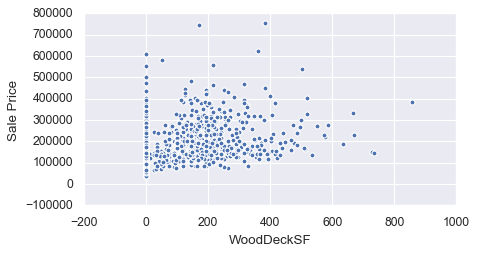

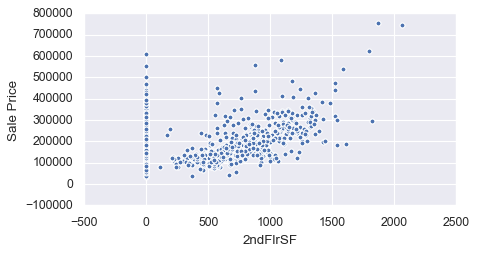

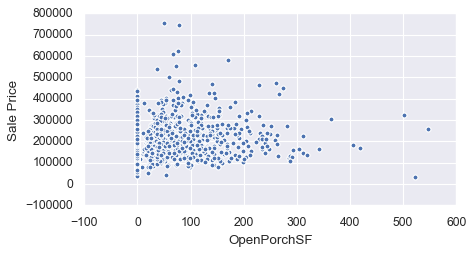

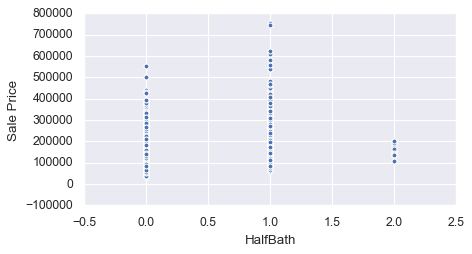

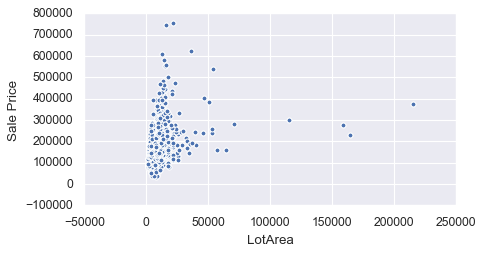

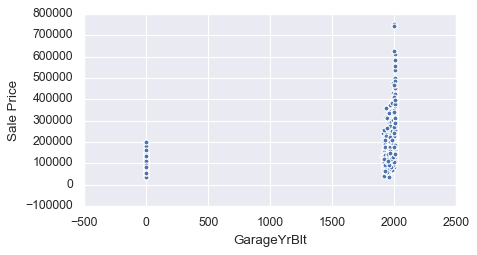

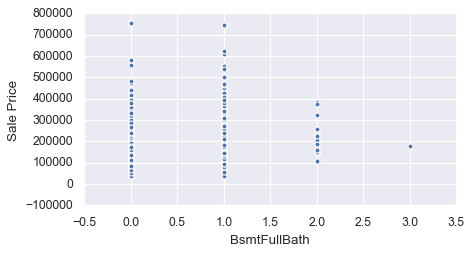

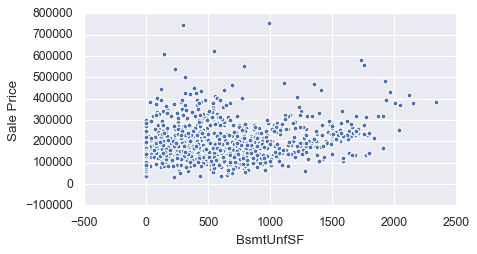

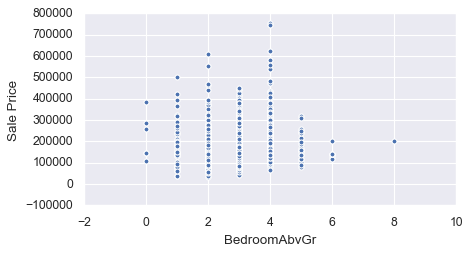

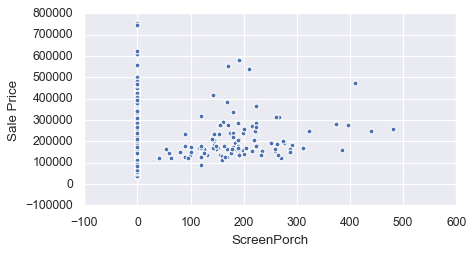

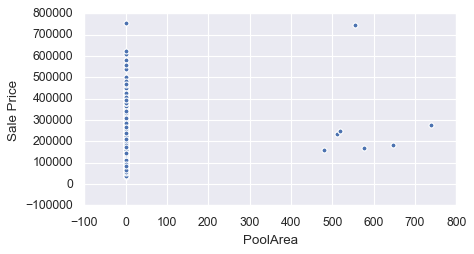

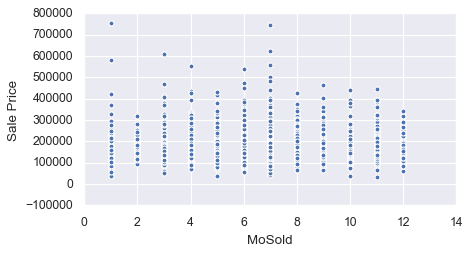

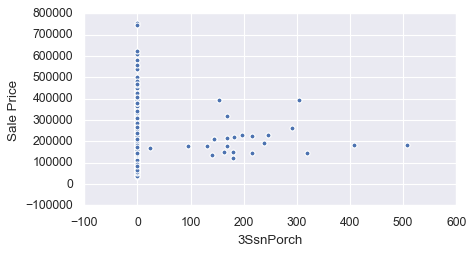

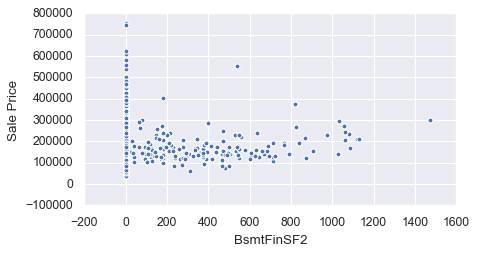

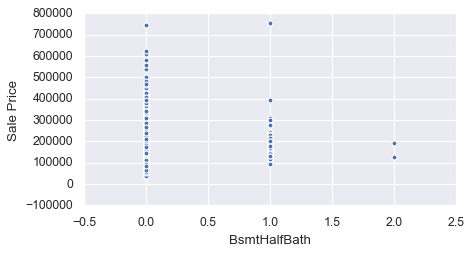

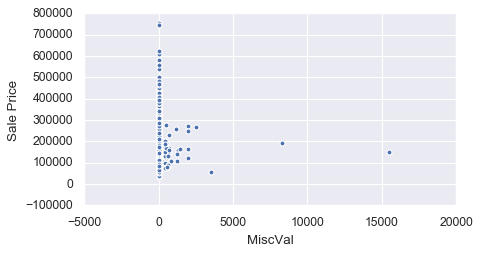

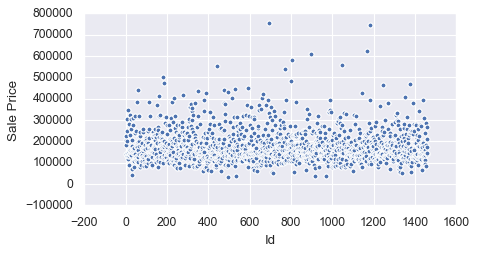

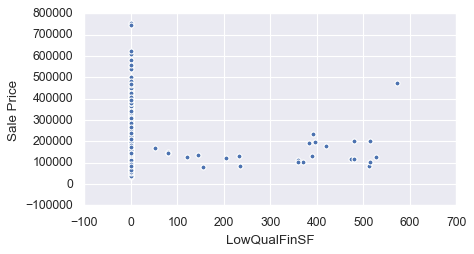

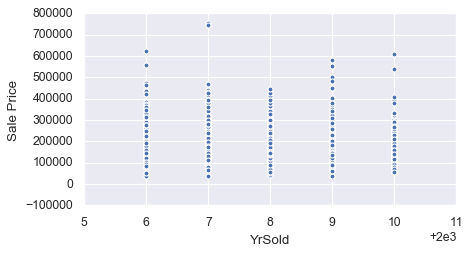

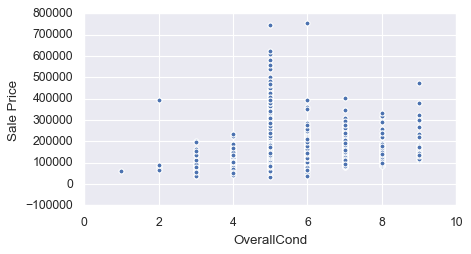

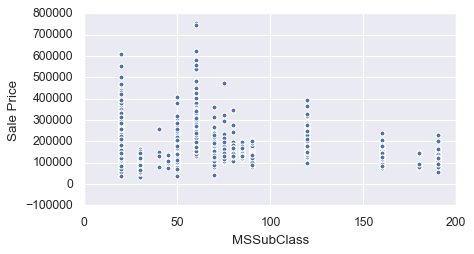

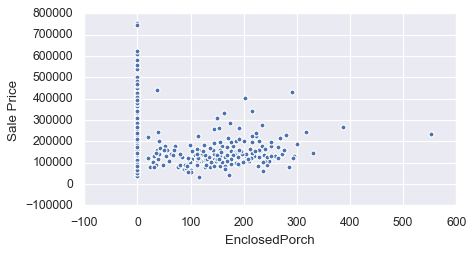

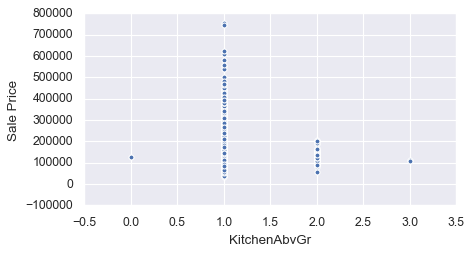

In [113]:
# Plot scatter graphs SalePrice/col for all columns in corr_numerical
# Bivariate analysis: Saleprice/col
for col in corr_numerical:
    plt.figure(figsize=(6, 3))
    plt.ylabel('Sale Price')
    plt.xlabel(col)
    plt.scatter(df_train[col], df_train['SalePrice'])

Several points bothering us:
- **GarageArea**: Three points in the bottom right corner - tempting, but still follow the pattern one might say (if we imagine spreading to the right and to the above)! Hence, we are not convinced enough to detach ourselves from them just like that.
- **1stFlrSF**: The point in bottom right is sticks out. This point is already an outlier notices in variables *TotalBsmtSF* and *GarageLivArea*. We have quite a few arguments for this outlier now. Also that is the same point that sticks out in following plot with *BsmtFinSF1*, the one in the bottom right.
- **TotRmsAbvGrd**: One point with 14 rooms - seems too cheap for too large number of rooms, but still, if we imagine linear line that limits these bars from below, than this point doesn't fall out of the pattern. We will not delete it. It might be a big house but with too many rooms of small square feet area, hence it is bad organized house and therefore low priced. With this we justify the price and will not outlier it.
- **LotFrontage**: Two points on the right - these certainly aren't representatives of a typical scenario and therefore ***we will consider them as outliers*** so our model has no problem with the noise. Actually, one of them is again the one mentioned in the variable *1stFlrSF*. So only the other one will be added to the outliers list.
- **OpenPorchSF**: One point in the bottom right corner - the ones above follow the pattern but this one really sticks out of the pattern. ***We will consider it as outlier***.
- **LotArea**: 4 points on the right are tempting but we won't remove them, we are not convinced nor brave enough.
- **OverallCond**: One high point with overall condition 2 - it could not represent a typical case, even if such a poor quality house can be expensive for some reason (maybe excellent location), it is a rare case and might present noise to our model. ***We will consider it as an outlier***.

Other points bothered us more or less but we decided that they either follow the rest of the pattern somehow, or that there is no pattern at all, or that it would be good to have representative of those cases.

Let's mark the observed outliers.

In [114]:
# Add the outliers from LotFrontage
df_train2 = df_train[['Id']][df_train['LotFrontage'] > 300]

print("New ones: {}" .format(df_train2['Id'].tolist()))
print("Duplicates: {}" .format( set(outliers_id) & set(df_train2['Id'].tolist()) ))

outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id)
print("Outliers: {}" .format(outliers_id))

New ones: [935, 1299]
Duplicates: {1299}
Outliers: [524, 1299, 186, 458, 770, 1183, 935]


In [115]:
# Add the outlier from OpenPorchSF
df_train2 = df_train[['Id']][(df_train['OpenPorchSF'] > 500) & (df_train['SalePrice'] < 100000)]

print("New ones: {}" .format(df_train2['Id'].tolist()))
print("Duplicates: {}" .format( set(outliers_id) & set(df_train2['Id'].tolist()) ))

outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id)
print("Outliers: {}" .format(outliers_id))

New ones: [496]
Duplicates: set()
Outliers: [524, 1299, 186, 458, 770, 1183, 935, 496]


In [116]:
# Add the outlier from OverallCond
df_train2 = df_train[['Id']][(df_train['OverallCond'] == 2) & (df_train['SalePrice'] > 300000)]

print("New ones: {}" .format(df_train2['Id'].tolist()))
print("Duplicates: {}" .format( set(outliers_id) & set(df_train2['Id'].tolist()) ))

outliers_id.extend(x for x in df_train2['Id'].tolist() if x not in outliers_id)
print("Outliers: {}" .format(outliers_id))

New ones: [379]
Duplicates: set()
Outliers: [524, 1299, 186, 458, 770, 1183, 935, 496, 379]


<br>

Let's look at the rest of the non-numerical (i.e. categorical) variables.

In [117]:
# Make a list of non-observed categorical variables

corr_categorical = list(df_train.columns)

for x in most_corr_numerical:
    if x in corr_categorical: corr_categorical.remove(x)
for x in most_corr_categorical:
    if x in corr_categorical: corr_categorical.remove(x)
for x in corr_numerical:
    if x in corr_categorical: corr_categorical.remove(x)
corr_categorical.remove('SalePrice')

len(corr_categorical)

37

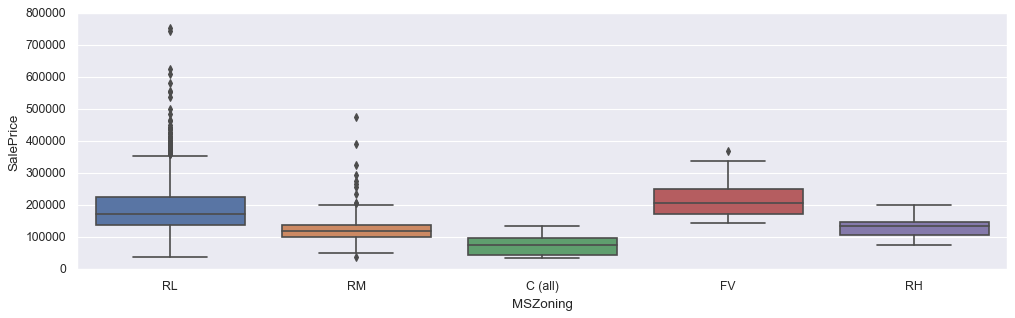

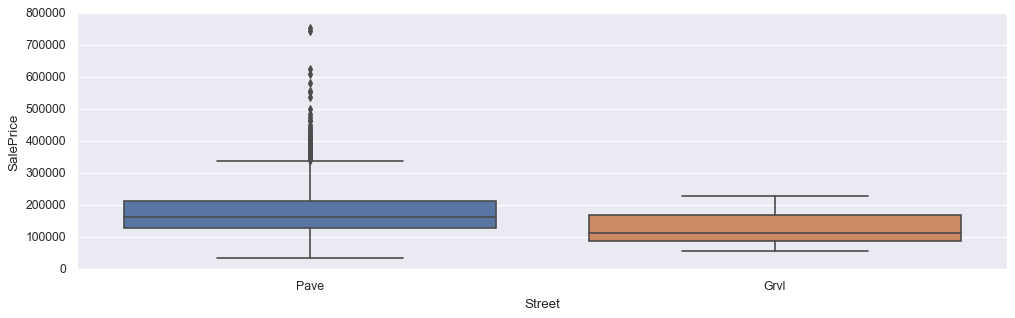

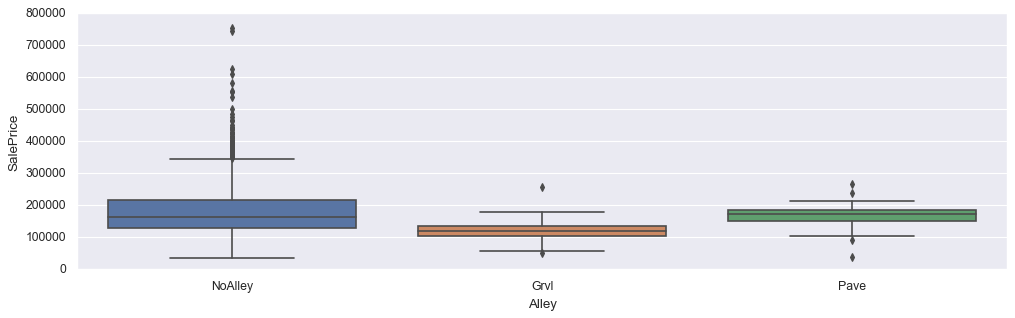

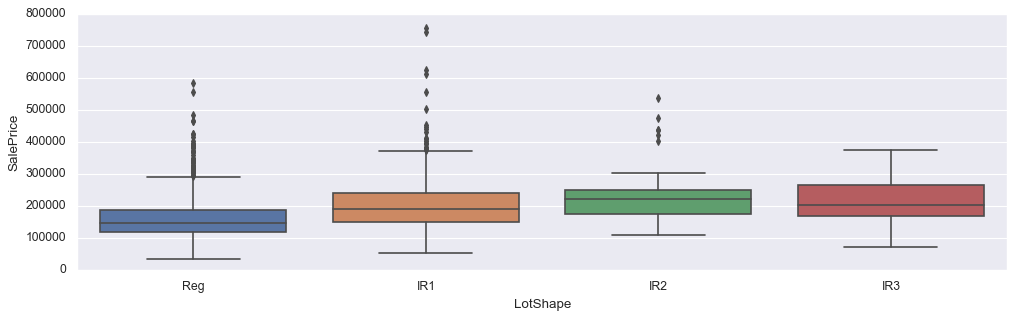

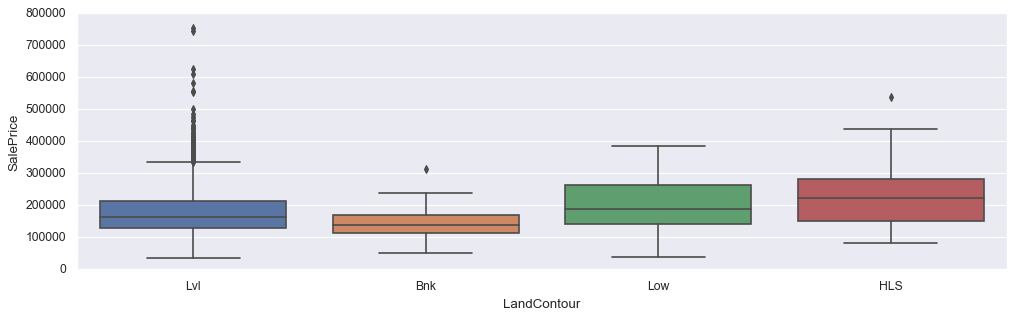

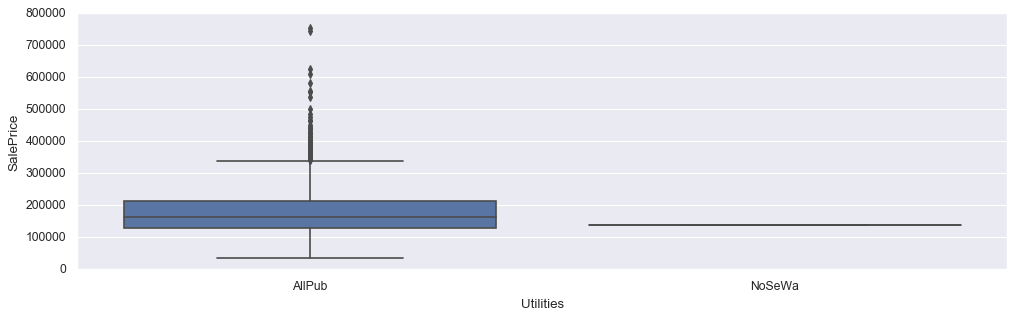

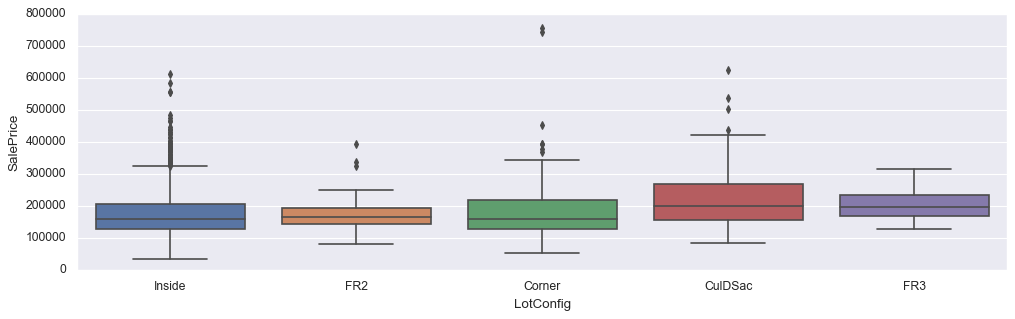

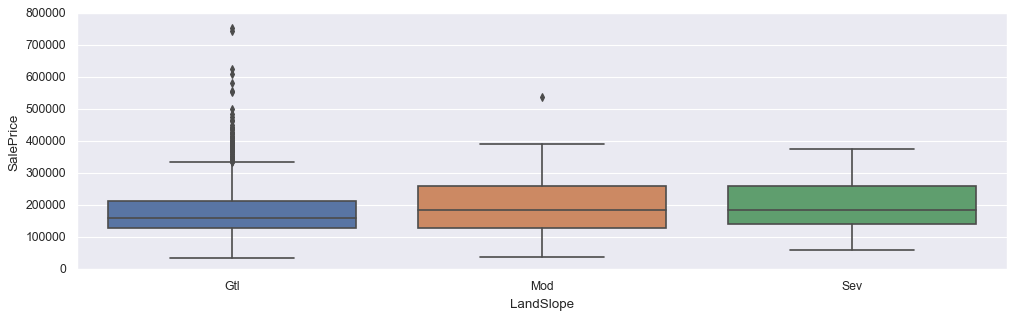

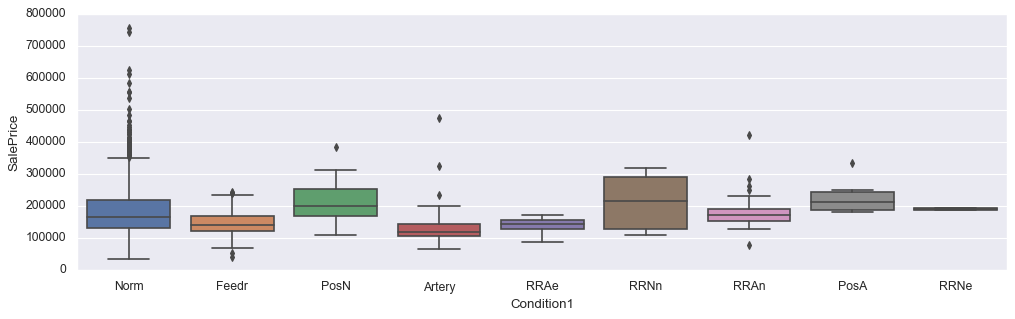

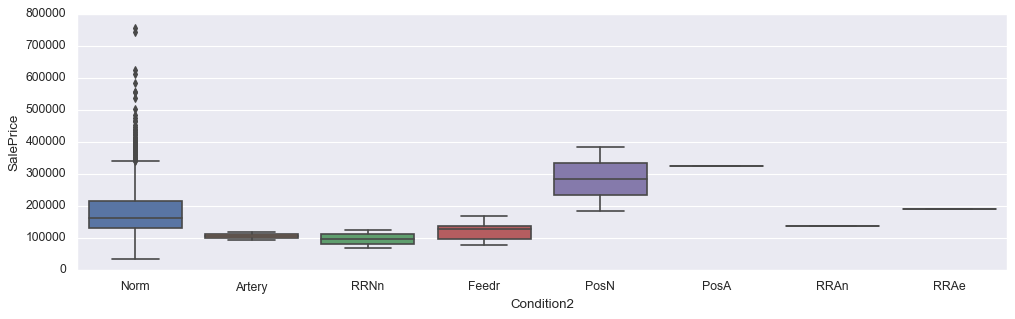

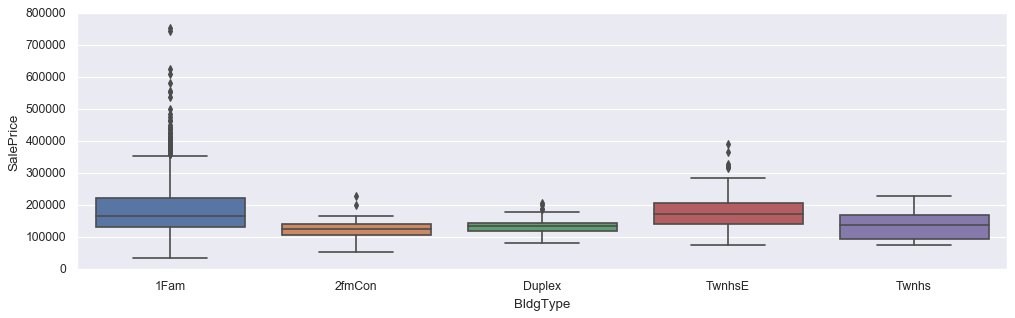

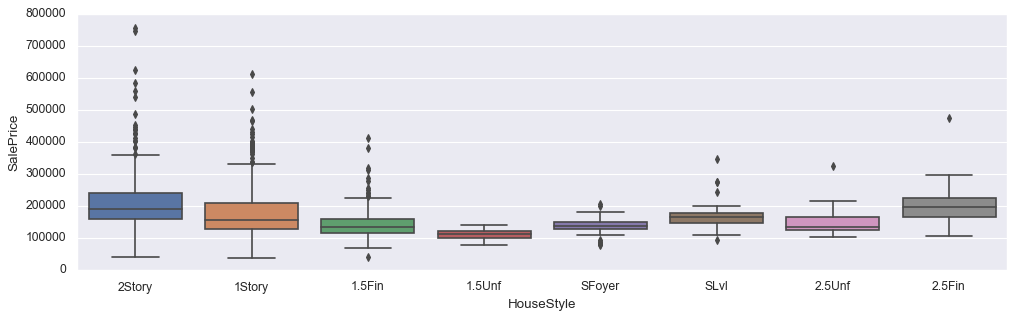

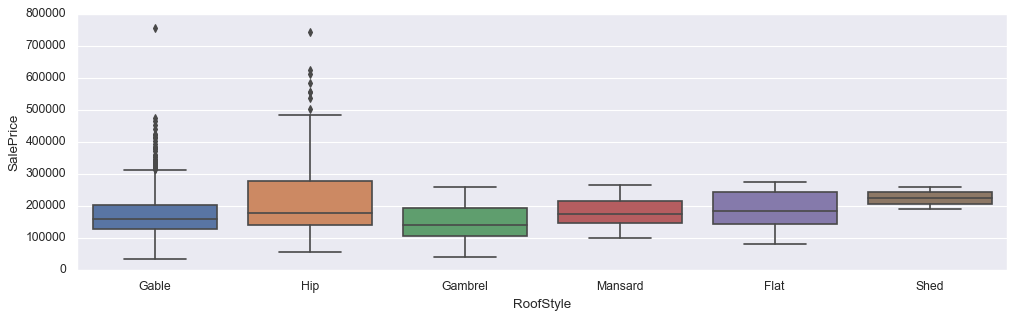

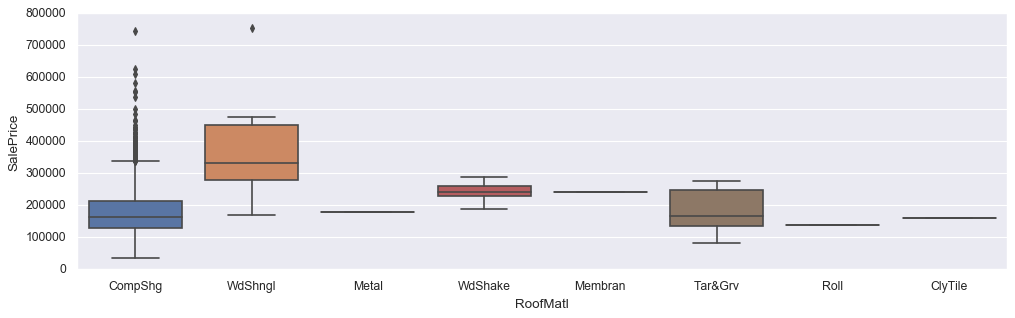

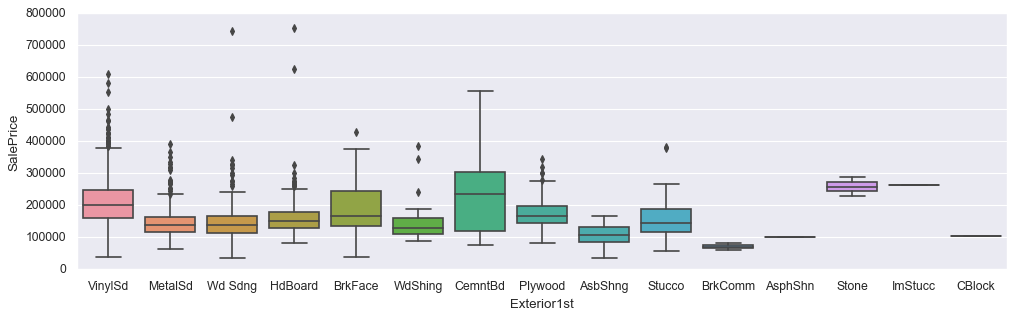

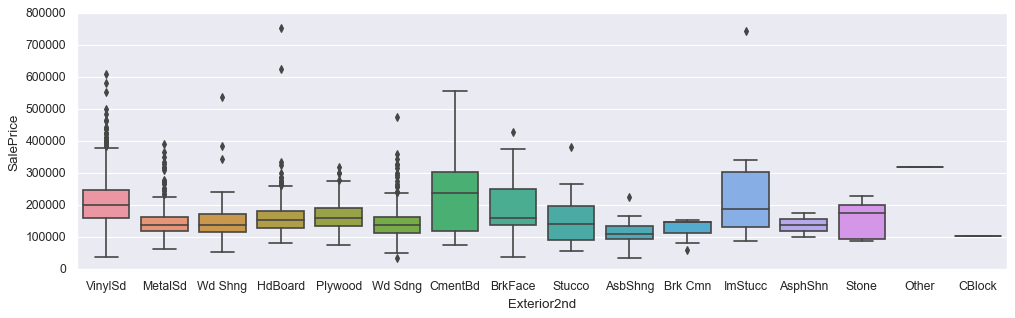

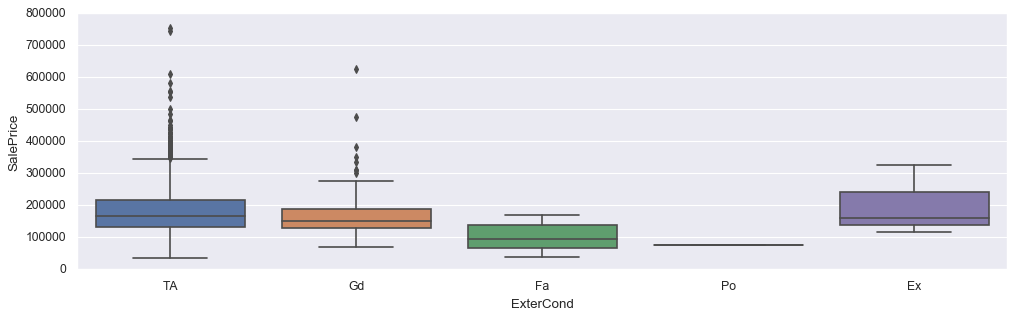

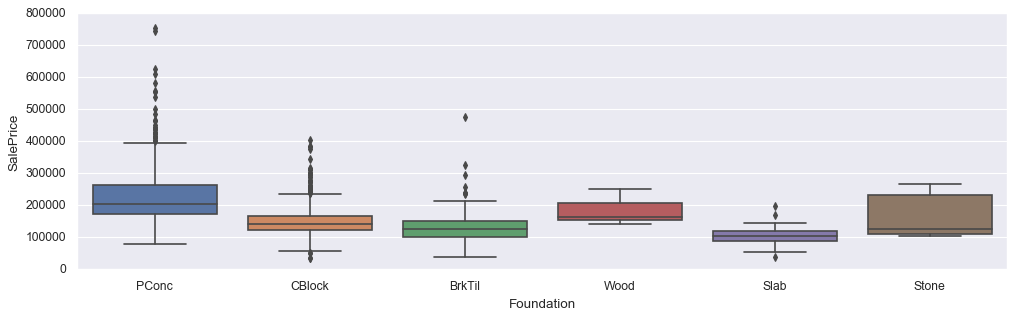

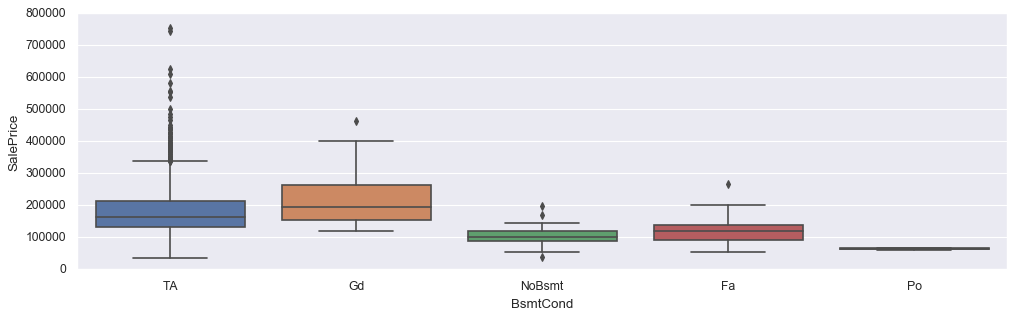

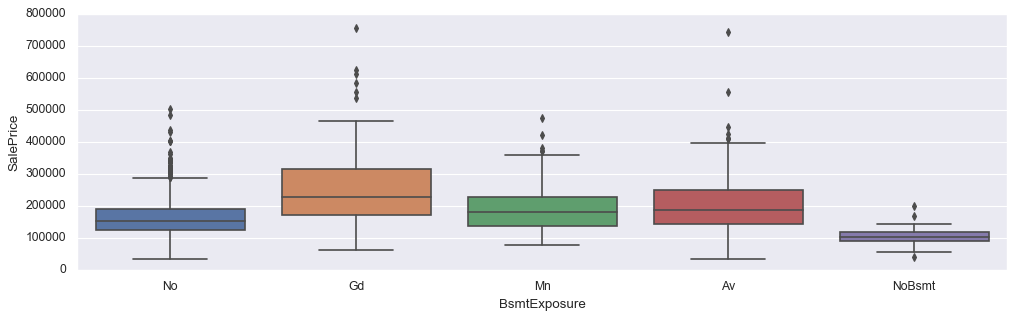

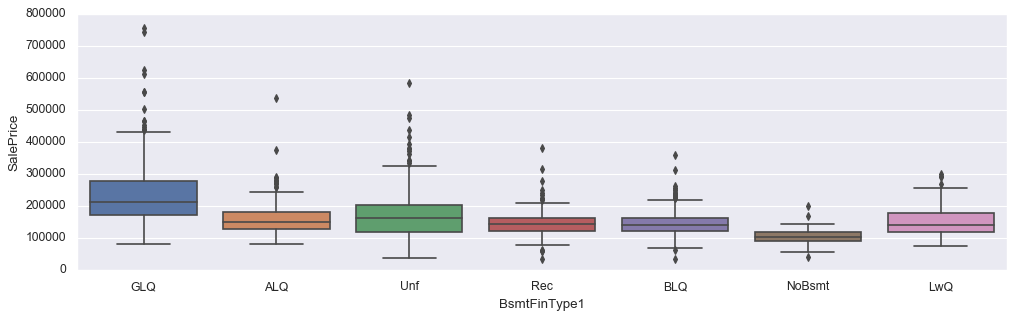

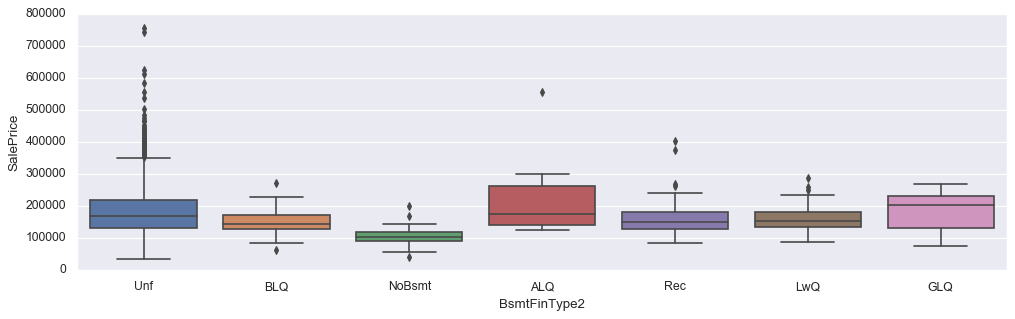

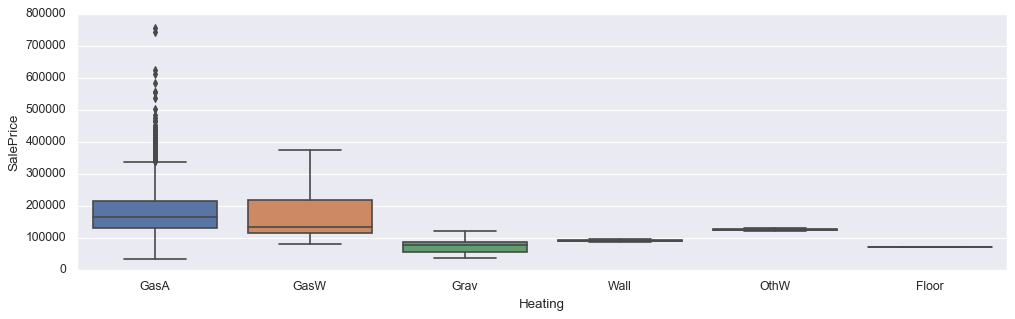

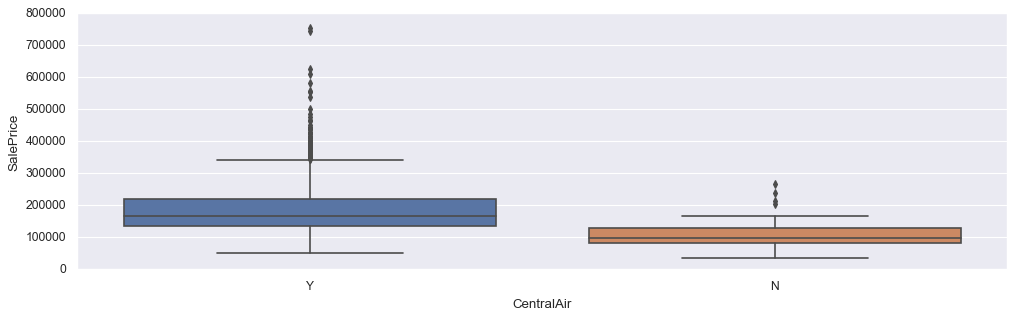

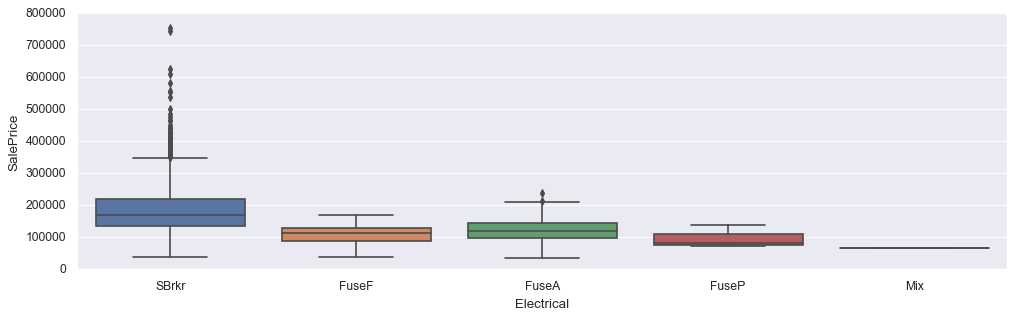

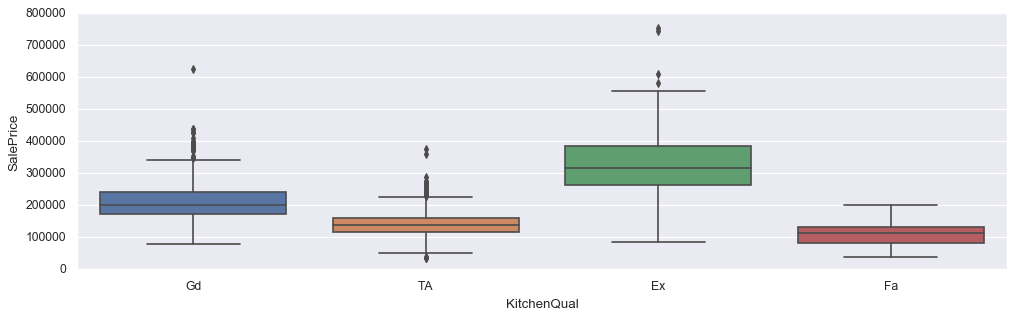

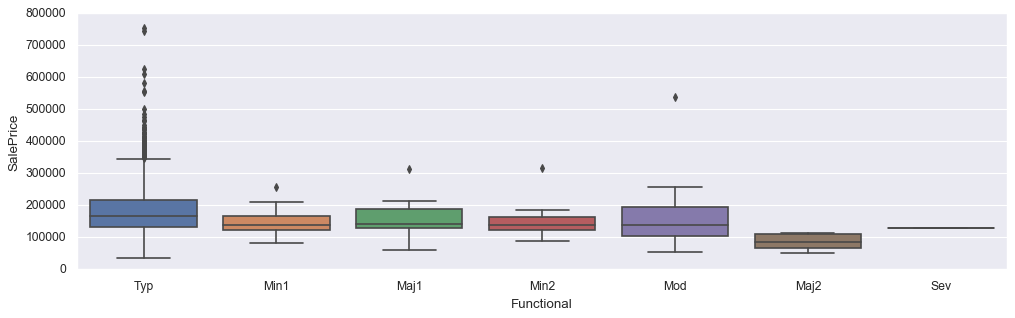

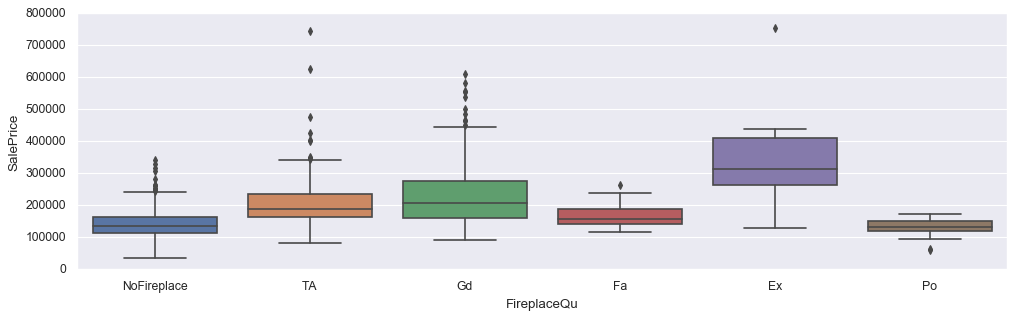

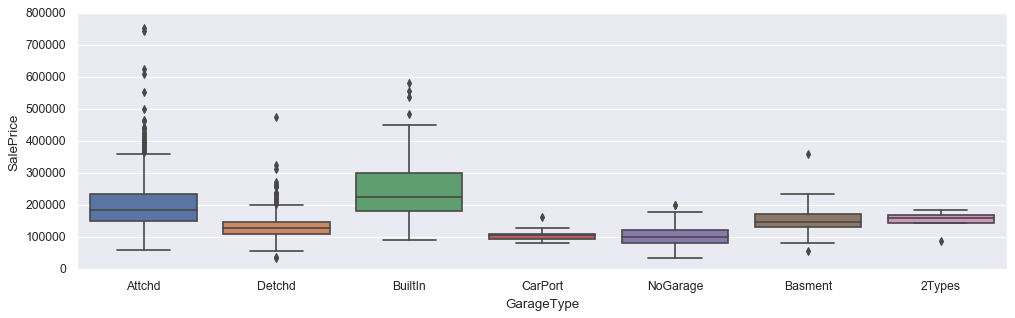

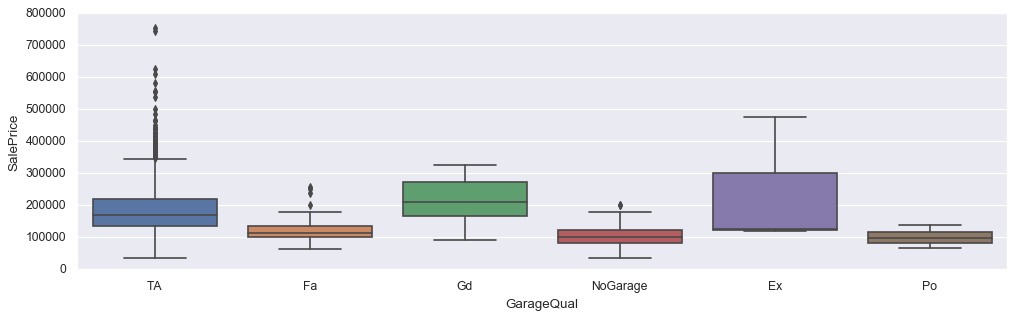

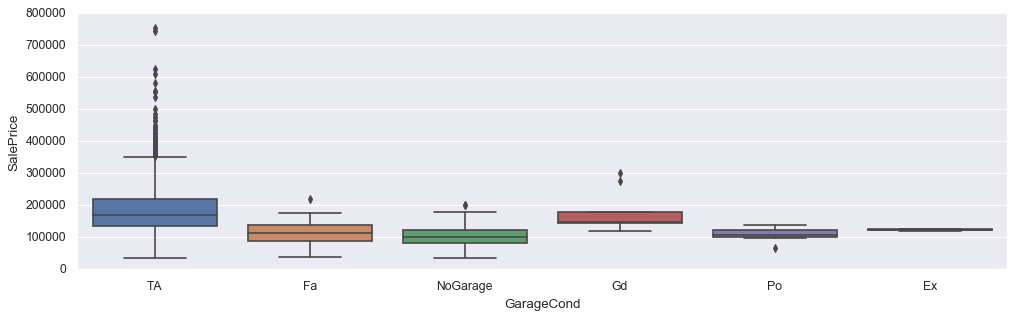

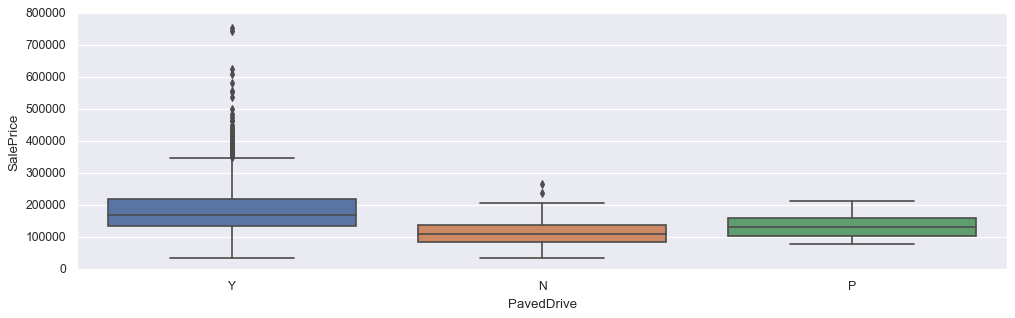

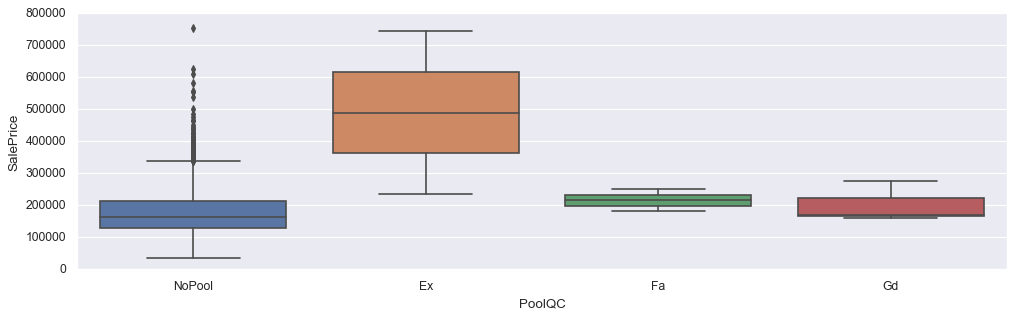

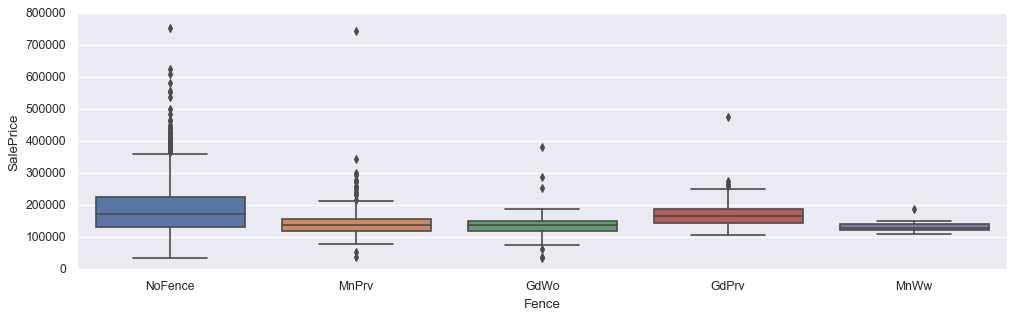

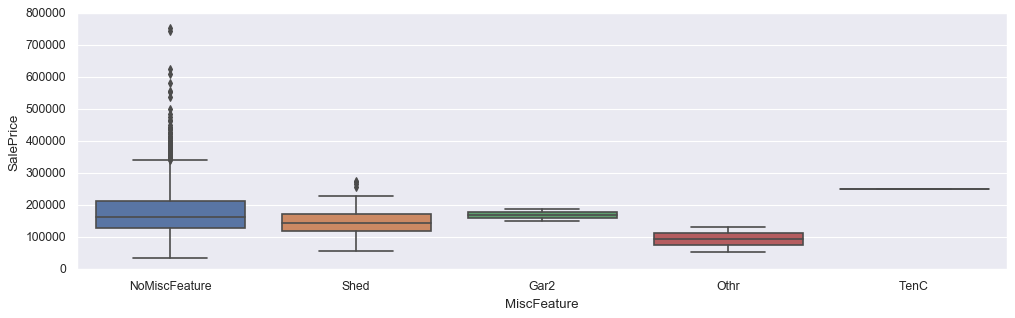

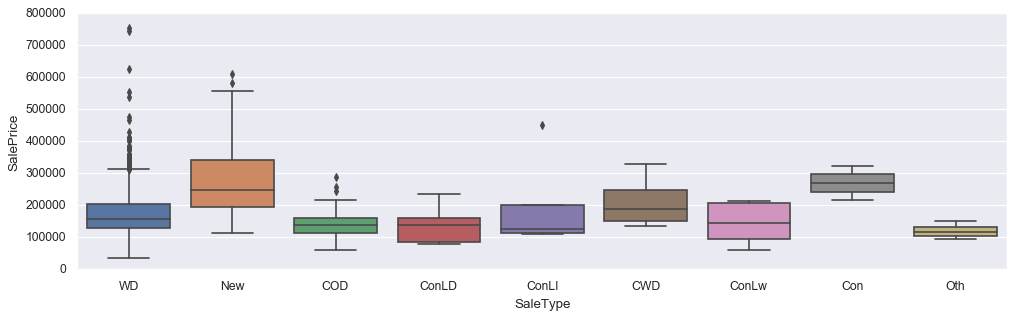

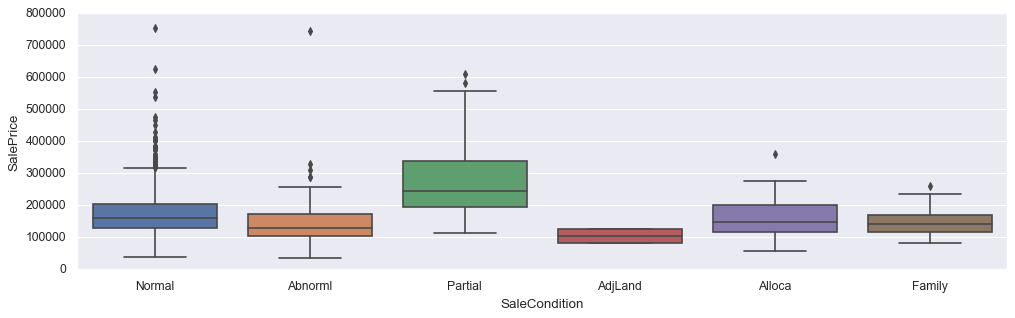

In [118]:
# Plot boxplots SalePrice/col for all columns in corr_categorical
# Bivariate analysis: Saleprice/col
for var in corr_categorical:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(15, 4))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)

We wouldn't consider many of those as outliers. If some data were really outliers, the would show up until now. These variables are less influencable on our target variable *SalePrice* anyway. Even if we extracted some points from them, they would either be in the outliers list already or we would justify their behaviour with the values in the most correlated variables that we find most important and that we already observed. That's why we won't bother ourselves with further searching for outliers. 

Instead, we will try to provide final test on whether our extracted outliers are really outliers or not. 
<br>
<br>
### 4.2.3 Scatterplot matrix: final check <a id="scatterplot-matrix">

We will observe our outliers in the context of other variables to see if another variable justifies the bad behaviour in that particular variable that caused us to extract it.

How will we do that? By plotting scatterplot matrix. We already plotted one in [section 3](#analysis-of-dimensionality) but now we will additionaly emphasize the outliers. <br>
Only for these plotting purposes we firstly need to create new columns *IdCategory* and *IdSize*:
- *IdCategory* serves to observe every outlier as its own category, and all the non-outliers as one category. This way we will be able to plot every outlier differently from the other outliers and from the other non-outliers. <br>
- *IdSize* holds the sizes of the points in the graph, outliers have bigger sizes than the non-outliers.

In [119]:
# Go through the rows in df_train and insert corresponding values in new columns based on whether a row is an outlier or not
id_category = []
id_size = []

for index, row in df_train.iterrows():
    if row['Id'] in outliers_id: 
        id_category.append('Outlier id: ' + str(row['Id']))
        id_size.append(1000)
    else: 
        id_category.append('No outlier')
        id_size.append(100)
                           

# Check if all the rows are contained in new columns
print("Do new column contain all rows : {} and {}\n" .format(len(id_category) == df_train.shape[0], 
                                                             len(id_size) == df_train.shape[0]))

# Check the values in IdCategory
unique_elements, counts_elements = np.unique(id_category, return_counts=True)
df_unique = pd.DataFrame({'Unique elements' : unique_elements, 'Counts elements' : counts_elements})
print("Let's look at the unique values (i.e. categories) of outliers:\n")
print(df_unique)


# Create new dataframe df_train2 that is a replica of df_train but contains additional column IdCategory
df_train2 = df_train
id_category = pd.Series(id_category, index=df_train2.index)
df_train2['IdCategory'] = id_category
id_size = pd.Series(id_size, index=df_train2.index)
df_train2['IdSize'] = id_size
print("\n\nLet's see how our two new columns look in the non-outlier and in the outlier:")
df_train2[(df_train2['Id'] == 1) | (df_train2['Id'] == 186)].head()

Do new column contain all rows : True and True

Let's look at the unique values (i.e. categories) of outliers:

    Unique elements  Counts elements
0        No outlier             1449
1  Outlier id: 1183                1
2  Outlier id: 1299                1
3   Outlier id: 186                1
4   Outlier id: 379                1
5   Outlier id: 458                1
6   Outlier id: 496                1
7   Outlier id: 524                1
8   Outlier id: 770                1
9   Outlier id: 935                1


Let's see how our two new columns look in the non-outlier and in the outlier:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0      1          60       RL         65.0   8450.0   Pave  NoAlley      Reg   
185  186          75       RM         90.0  22950.0   Pave  NoAlley      IR2   

    LandContour Utilities  ...    Fence    MiscFeature MiscVal MoSold YrSold  \
0           Lvl    AllPub  ...  NoFence  NoMiscFeature     0.0      2   2008   
185         Lvl    AllPub  ...    GdPrv  NoMiscFeature     0.0      6   2006   

    SaleType SaleCondition  SalePrice       IdCategory  IdSize  
0         WD        Normal   208500.0       No outlier     100  
185       WD        Normal   475000.0  Outlier id: 186    1000  

[2 rows x 83 columns]

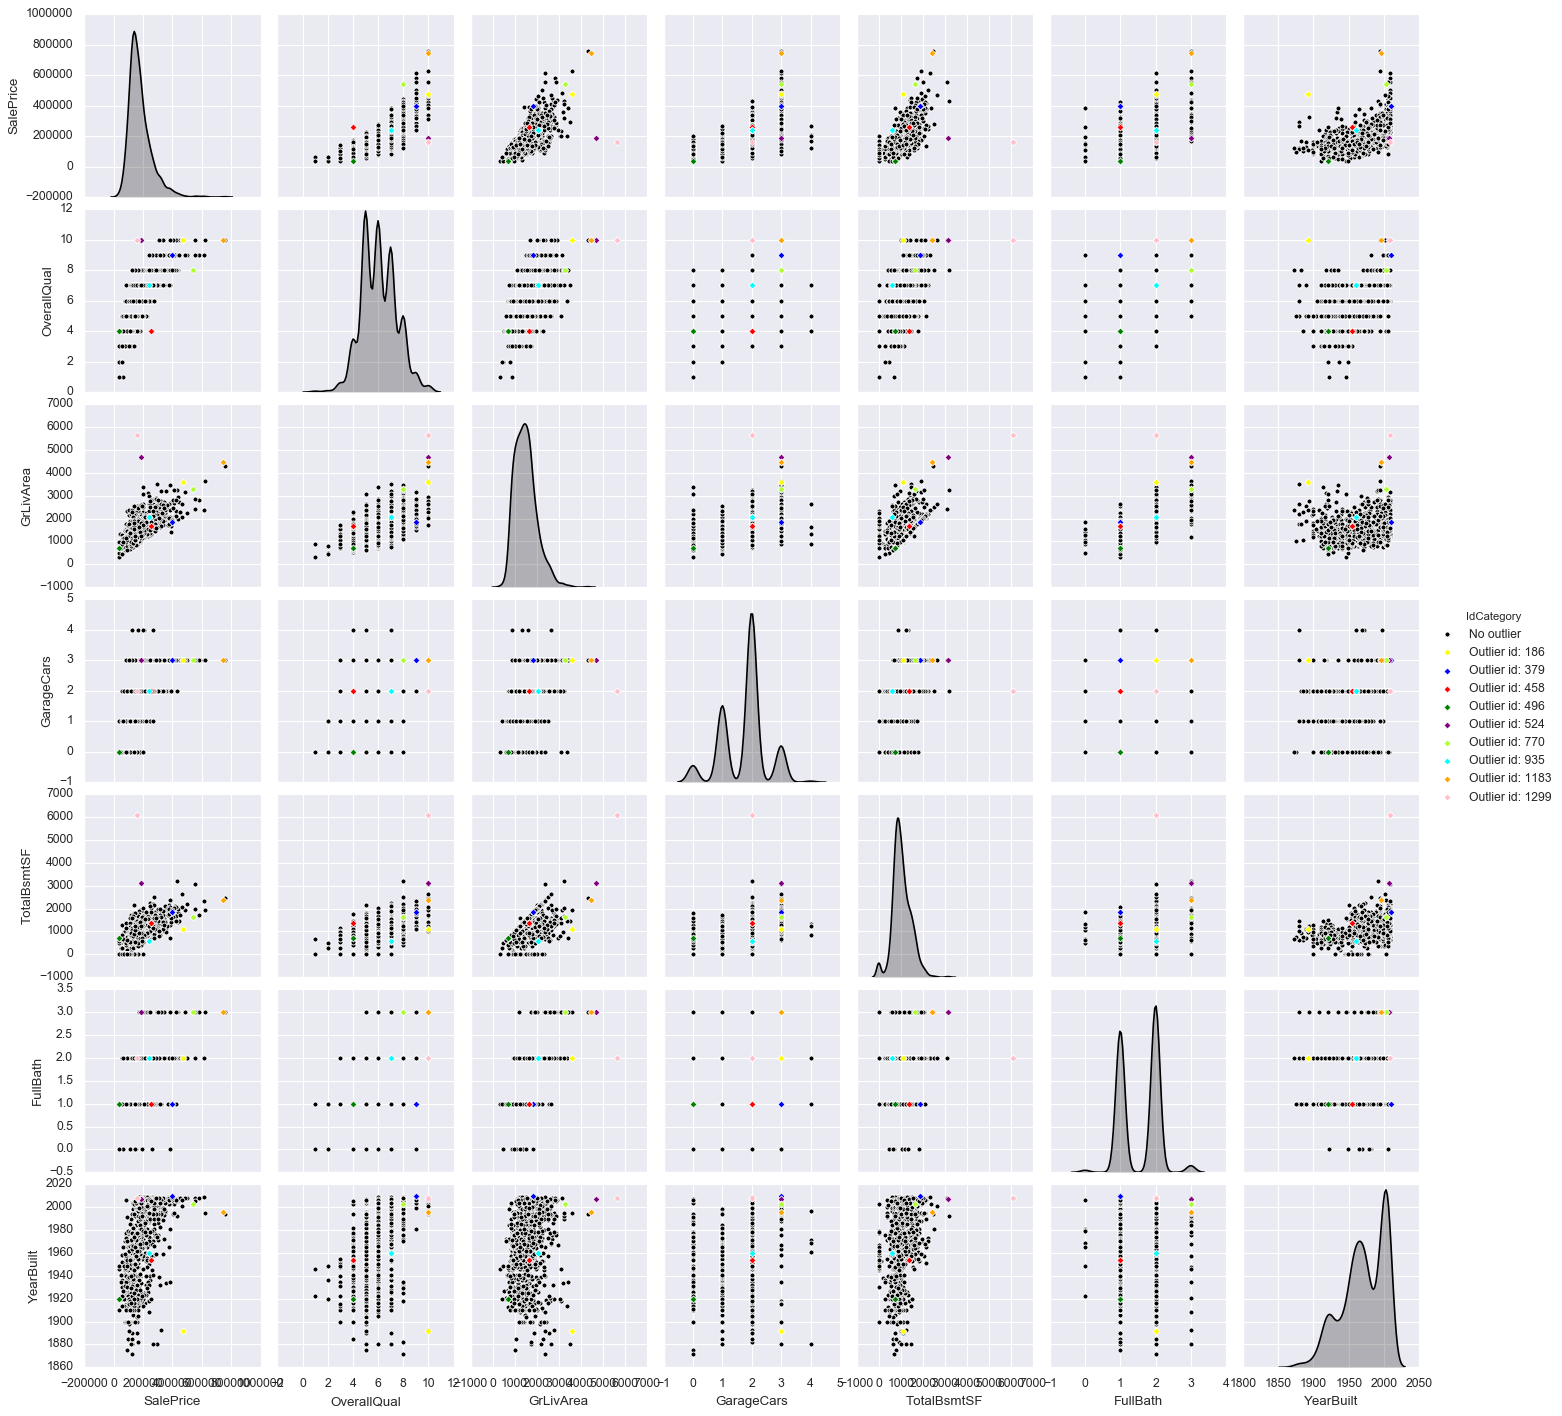

In [120]:
# Plot the scatterplot matrix
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

g = sns.pairplot(df_train2,  x_vars=cols, y_vars=cols,
                 palette=['black','yellow','blue','red','green','purple', 'greenyellow', 'cyan', 'orange', 'pink'],
                 hue="IdCategory", markers=["o", "D", "D", "D", "D", "D", "D", "D", "D", "D"])

Observations:
- **Orange (1183)**: This point is obviously one of the best houses in dataset. That's why it looked like an outlier in many different situations (i.e. variables). For every variable, it has (one of) the best values. Hence, her high price is justified and we will not consider it as an outlier.
- **Purple (524)**: This point is unexplainable. For every variable, it has (one of) the best values, but has the price from the lowest category. Maybe her price is justified by other variables that are not shown here, but those variables don't affect our model that much (as concluded in [section 3](#analysis-of-dimensionality)). So this is an outlier. It doesn't follow the "usual" behaviour and it might present a noise to our model.
- **Yellow (186)**: This point doesn't look as an outlier anymore. Even though it is one of the oldest houses in the dataset, it has excellent overall quality, big square feet area above ground and big garage, average basement and several bathrooms. Her price is justified after all.
- **Blue (379)**: We extracted this point because of her poor *OverallCond*, but here we see that other variables don't stand up for that and her poor *OverallCond* looks like a system mistake. This house actually has great *OverallQual* (which is quite similar to *OverallCond* and hence contradictory), average *GrLivArea*, good garage capacity and it is really new. One variable that is not even the most correlated one (*OverallCond*) shouldn't bother us too much. House's price from the upper average class is justified and we do not consider it as an outlier anymore.
- **Red (458)**: This point was marked as an outlier because it sticked out from the points with overall quality of 4. This house really is average in every important variable. Her price is also average. We will not consider it as an outlier anymore.
- **Green (496)**: Actually, 4 is a very high overall condition for a house with these poor values. Its price is extremely low, it costs less than 50,000\$, and all the other variables say the worse about it. The house is old, has a small basement, small above ground area, no garage, but has *OverallQual* = 4. We ask ourselves how did it get such "average" mark and how does it cost anything actually. The reason why we extracted it in the first was because it has the second largest opened porch, but extremely small price. This actually sums up the story. Big opened porch is probably the reason why its *OverallQual* has risen and the reason it cost anything. This point is not an outlier, her values suit her price well when combined.
- **Greenyellow (770)**: We extracted this point because it had significantly higher price than the rest of her fellow colleagues in the category of *OverallQual* = 8. And by looking at the rest of the variables, they all suggest her *OverallQual* should at least be 9, if not 10. But one variable shouldn't drive us to consider one point as an outlier. After all, it does not divert too much from what the "expected". We won't consider this as an outlier.
- **Cyan (935)**: We declared this point as an outlier because it has big *LotFrontage* but small price. This house is little above average in every aspect. It has average above ground area and average garage area, but very little beasement. It is not new, but not too old neither - 1960 were the waking years for architects. Its price is average too. Small basement and oldness could lower its price below the average, but *LotFrontage* holds it around average. The price is justified and this is not an outlier.
- **Pink (1299)**: This point doesn't behave well. Her price is absolutely unreasoning. It has the best overall quality, the biggest above ground square feet area, garage area for two cars, two bathrooms and it is one of the newest houses. Yet, it costs less than 200,000$ and is in the category of lowest priced houses. This definitely doesn't sum up and since too many important variables don't go along with the price, we find this point an outlier.

After detailed considerations, let us remove the justified points from our outliers list:

In [121]:
outliers_id.remove(1183)
outliers_id.remove(186)
outliers_id.remove(379)
outliers_id.remove(458)
outliers_id.remove(496)
outliers_id.remove(770)
outliers_id.remove(935)
outliers_id

[524, 1299]

<hr>
In this section we thoroughly investigated outliers in the dataset and provided proofs for every conclusion.

Now we move on to testing assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.
<hr>

# 5. Test assumptions <a id="test-assumptions">

In this section we want to understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), we will test three assumptions:

- **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.
<br>

- **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.
<br>

- **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.
<br>

## 5.1 Normality <a id="normality">

Normality stands for degree to which the distribution of the sample data corresponds to a normal distribution. Normality of data should be checked since several statistical techniques and models assume that the underlying data is normally distributed. In this notebook we will test normality by taking a look at skewness and kurtosis.

### Skewness

Skewness lets you test by how much the overall shape of a distribution deviates from the shape of the normal distribution. If it has longer tail on the left side, it has a negative skewness, and if it has longer tail on the right side, it has a positive skewness. Skewness of the normal distribution is zero, therefore we want to check how close or far from 0 skewnesses of our variables are. If the skewness is greater than 1 or less than -1, then we say that the variable shows high skewness and we should consider normalizing it.

### Kurtosis

Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.

In [122]:
# check the skewness and kurtosis of all numerical features with skewness greater than 1 or less than -1
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
kurtosed_feats = df_train[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)
normality = pd.concat([skewed_feats, kurtosed_feats], axis=1, keys=['Skewness', 'Kurtosis'])
#skewness = pd.DataFrame({'Skewness' :skewed_feats})
normality.drop(normality[abs(normality.Skewness) < 1].index, inplace=True)
normality

Skewness    Kurtosis
1stFlrSF        1.377155    5.732458
3SsnPorch      10.286510  123.060371
BsmtFinSF1      1.687538   11.116501
BsmtFinSF2      4.271591   20.232335
BsmtHalfBath    4.095895   16.307607
EnclosedPorch   3.083987   10.371265
GarageYrBlt    -3.862389   12.970137
GrLivArea       1.366005    4.869260
IdSize         12.609766  157.006211
KitchenAbvGr    4.480268   21.418925
LotArea        12.189039  202.308832
LotFrontage     2.210974   20.012582
LowQualFinSF    8.995688   82.825671
MSSubClass      1.405166    1.565736
MasVnrArea      2.678129   10.114665
MiscVal        24.434913  697.642774
OpenPorchSF     2.362885    8.457862
PoolArea       14.802847  222.188942
SalePrice       1.884423    6.524547
ScreenPorch     4.114690   18.340769
TotalBsmtSF     1.487181   13.337895
WoodDeckSF      1.539400    2.974601

In [123]:
# check how many zero values variables have
total = df_train.isin([0]).sum().sort_values(ascending=False)
percent = (total/df_train.count()).sort_values(ascending=False)
zero_data = pd.concat([total, percent], axis=1, keys=['Total zeros', 'Percent of zeros'])

In [124]:
# merge together 
result = pd.merge(normality, zero_data, how='inner', left_index = True, right_index = True)
result

Skewness    Kurtosis  Total zeros  Percent of zeros
1stFlrSF        1.377155    5.732458            0          0.000000
3SsnPorch      10.286510  123.060371         1434          0.983539
BsmtFinSF1      1.687538   11.116501          466          0.319616
BsmtFinSF2      4.271591   20.232335         1292          0.886145
BsmtHalfBath    4.095895   16.307607         1376          0.943759
EnclosedPorch   3.083987   10.371265         1250          0.857339
GarageYrBlt    -3.862389   12.970137           81          0.055556
GrLivArea       1.366005    4.869260            0          0.000000
IdSize         12.609766  157.006211            0          0.000000
KitchenAbvGr    4.480268   21.418925            1          0.000686
LotArea        12.189039  202.308832            0          0.000000
LotFrontage     2.210974   20.012582            0          0.000000
LowQualFinSF    8.995688   82.825671         1432          0.982167
MSSubClass      1.405166    1.565736            0          0.000000
MasVnrArea      2.678129   10.114665          869          0.596022
MiscVal        24.434913  697.642774         1406          0.964335
OpenPorchSF     2.362885    8.457862          655          0.449246
PoolArea       14.802847  222.188942         1451          0.995199
SalePrice       1.884423    6.524547            0          0.000000
ScreenPorch     4.114690   18.340769         1342          0.920439
TotalBsmtSF     1.487181   13.337895           37          0.025377
WoodDeckSF      1.539400    2.974601          760          0.521262

Here we have variables that show high positive skewness, all greater than 1, but some of them have high percentage (greater than 50%) of zero values, which is the explanation for high skewness. 'KitchenAbvGr' is a discrete variable, with values 1, 2 and 3, where 1 is the dominant one.  Now let's take a look at continuous variables' histograms and probability plots, for which we have also concluded in previous analysis that are important for our model, because they are correlated with 'SalePrice', 'GrLivArea' and 'TotalBsmtSF', and 'SalePrice' itself.

### Histogram 
Shows kurtosis and skewness.

### Normal probability plot 
Plot in which data distribution should closely follow the diagonal that represents the normal distribution.


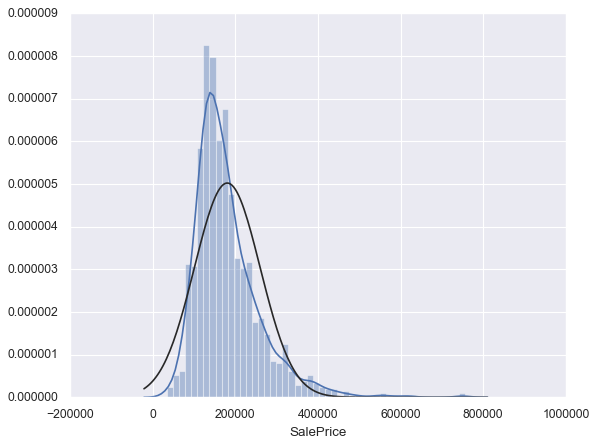

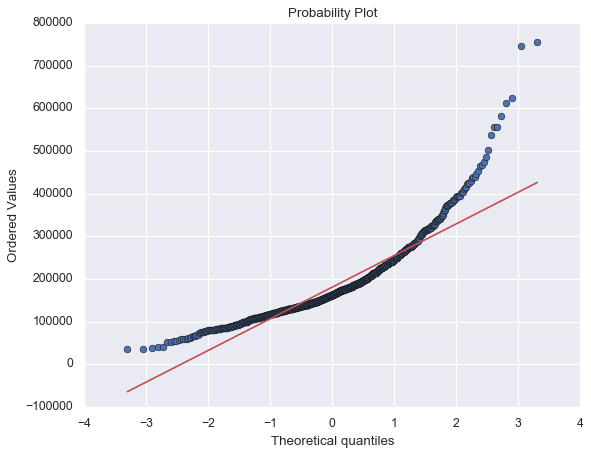

In [125]:
# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

We see that variable 'SalePrice' is not normally distributed. It shows 'peakedness', positive skewness and does not follow the diagonal line.

Let's check that 'GrLivArea' also has positive skewness and that it does not follow the diagonal line.

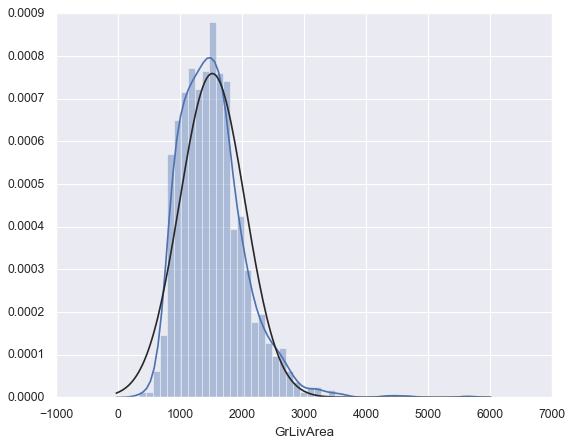

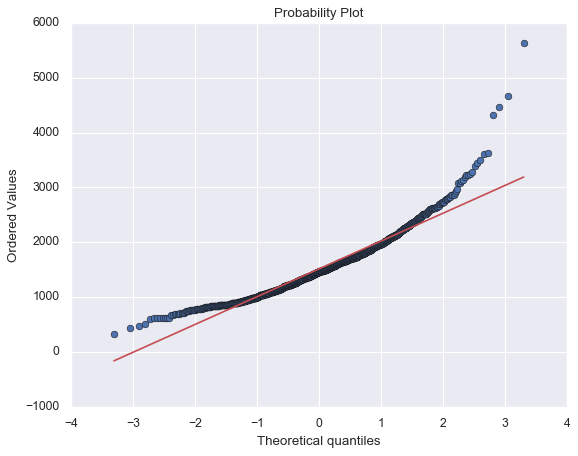

In [126]:
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Now let's see 'TotalBsmtSF'.

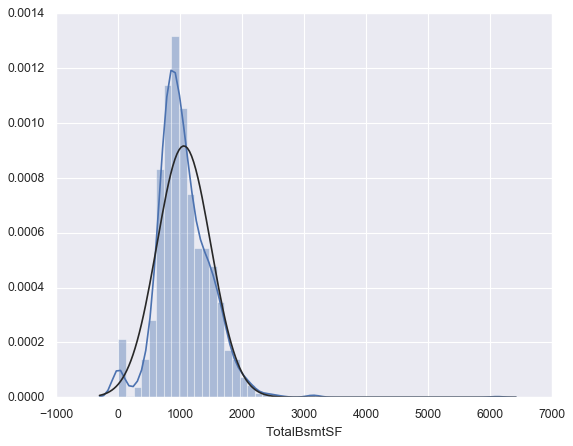

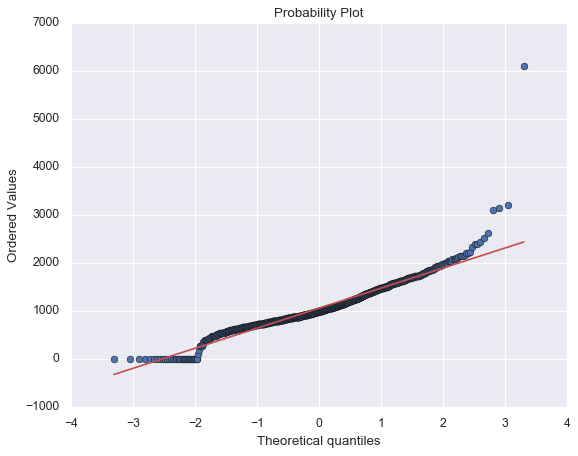

In [127]:
# histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

'TotalBsmtSF' as well shows high positive skewness and peakedness, but also a significant number of observations with value zero (houses without basement). 

### Log transformations

Positive skewness occurs when there are outliers that can’t be filtered out as they are important to the model. It can be corrected using log transformation because in case of positive skewness, log transformation usually works well and lessens the impact of outliers. Normalizing the data is not necessary when there is a big number of observations and for some models it doesn't make a big difference, but it is a presumption of linear regression and we will test our models with and without log transformed data to see which gives a better result.

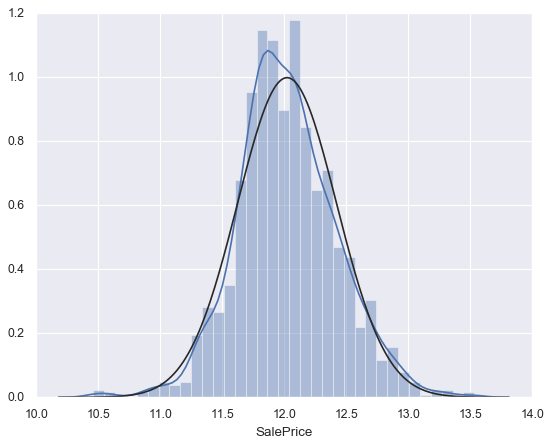

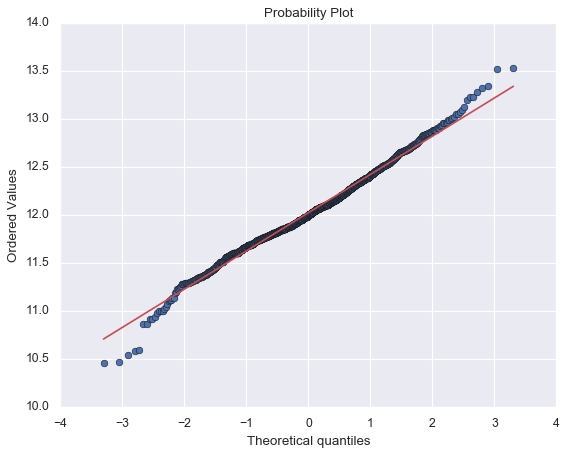

In [128]:
# log transformation on 'SalePrice' and original values
log_SalePrice = np.log(df_train['SalePrice'])  
original_SalePrice = df_train['SalePrice']

# transforming the data
#df_train['SalePrice'] = np.log(df_train['SalePrice'])

# transformed histogram and normal probability plot
sns.distplot(log_SalePrice, fit=norm)
fig = plt.figure()
res = stats.probplot(log_SalePrice, plot=plt)

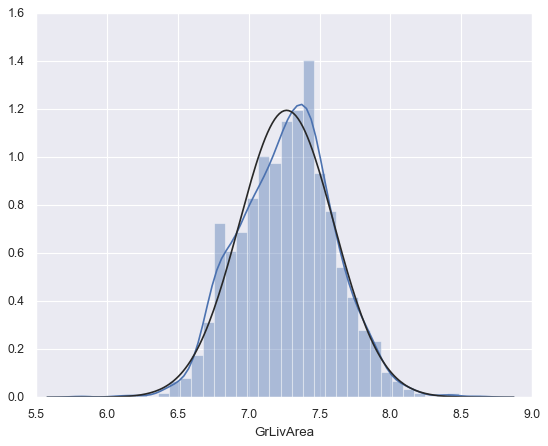

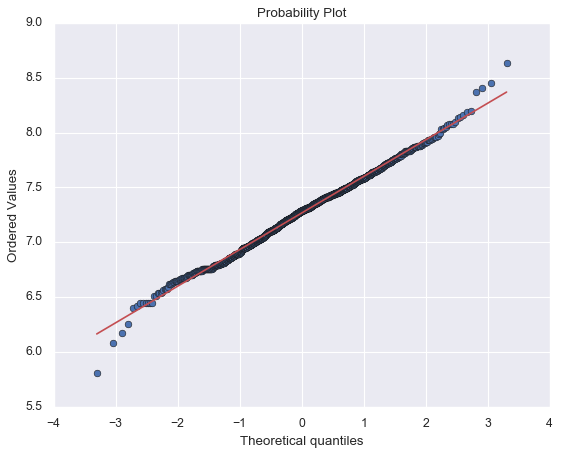

In [129]:
# log transformation on 'GrLivArea' and original data
log_GrLivArea = np.log(df_train['GrLivArea'])
original_GrLivArea = df_train['GrLivArea']

# transforming the data
#df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
## trebale bi napraviti i log transform nad test podacima onda ???


# transformed histogram and normal probability plot
sns.distplot(log_GrLivArea, fit=norm)
fig = plt.figure()
res = stats.probplot(log_GrLivArea, plot=plt)

In case of 'TotalBsmtSF' zero values don't allow us to do log transformations. To apply a log transformation here, we create a variable that has value 1 or 0, depending on having or not having basement. Then, we do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

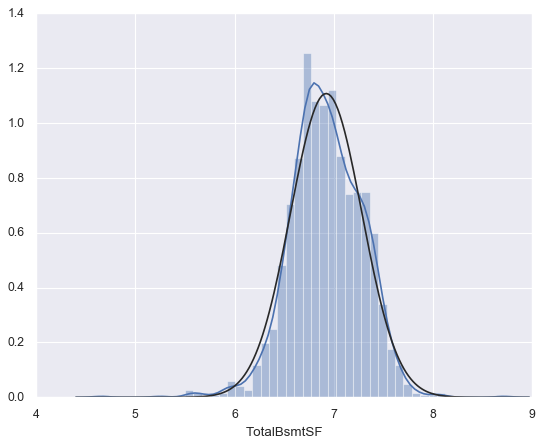

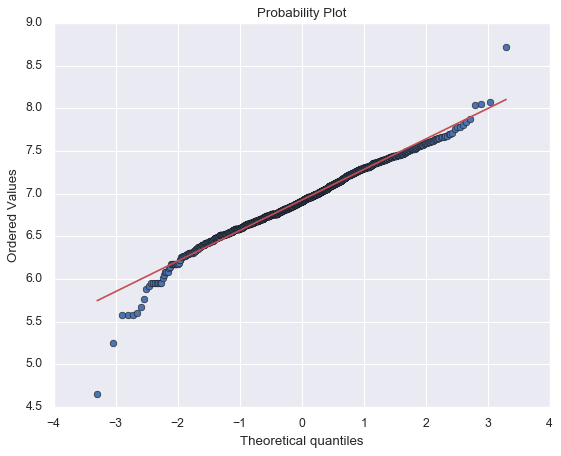

In [130]:
log_TotalBsmtSF = df_train['TotalBsmtSF'].apply(lambda x: np.log(x) if x>0 else x)
log_TotalBsmtSF = log_TotalBsmtSF[(log_TotalBsmtSF.T != 0)]
original_TotalBsmtSF = df_train['TotalBsmtSF']

# create column for new variable 
#df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
#df_train['HasBsmt'] = 0 
#df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

# transform data
#df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])


## trebale bi napraviti i log transform nad test podacima onda ???


# histogram and normal probability plot
sns.distplot(log_TotalBsmtSF, fit=norm)
fig = plt.figure()
res = stats.probplot(log_TotalBsmtSF, plot=plt)

## 5.2 Homoscedasticity <a id ="Homoscedasticity">

Homoscedasticity refers to the assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s). It is desirable because we want the error term to be the same across all values of the independent variables.

Simply put, homoscedasticity means “having the same scatter.” For it to exist in a set of data, the points must be about the same distance from the line. The opposite is heteroscedasticity (“different scatter”), where points are at widely varying distances from the regression line.

The best approach to test homoscedasticity/heteroscedasticity for two metric variables is visually. Heteroscedasticity is shown by cone shapes (small dispersion at one side of the graph, large dispersion at the other) or diamonds (a large number of points at the center of the distribution).

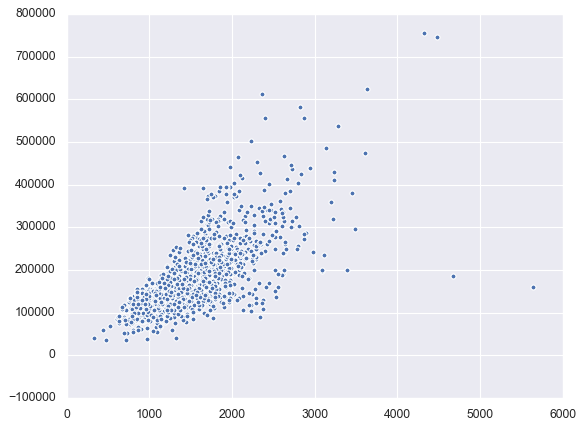

In [131]:
#scatter plot
plt.scatter(original_GrLivArea, original_SalePrice)

In this plot, where we use original (non-logathmic) 'SalePrice' values, we can clearly see a conic shape which implies heteroscedasticity.

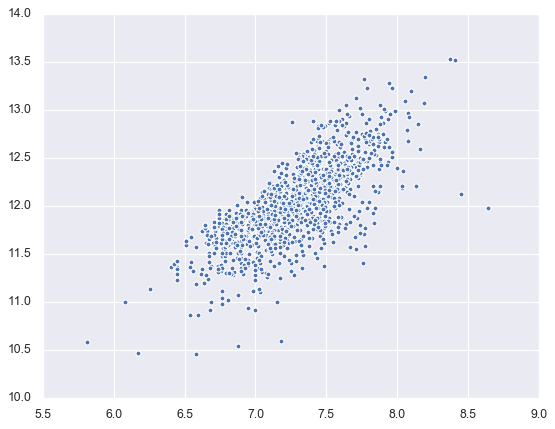

In [132]:
#scatter plot
plt.scatter(log_GrLivArea, log_SalePrice)

On the other hand, here we see that the points are around the same distance from the line, which implies homoscedasticity. Therefore we can see that to obtain homoscedasticity, it is enough to normalize the variables.

We can see the same relationship with 'TotalBsmtSF' and 'SalePrice'.

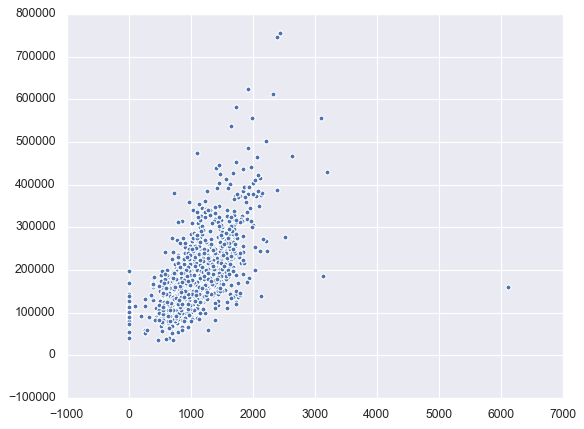

In [133]:
#scatter plot
plt.scatter(original_TotalBsmtSF, original_SalePrice)

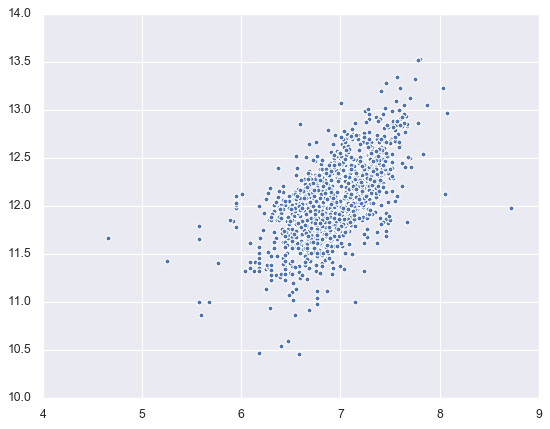

In [134]:
#scatter plot
plt.scatter(log_TotalBsmtSF, np.log(df_train[df_train['TotalBsmtSF']>0]['SalePrice']))

## 5.3 Linearity <a id = "linearity">

The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations.

We already discussed some linear relationship, here we'll check if most correlated variables are linear with 'SalePrice'.

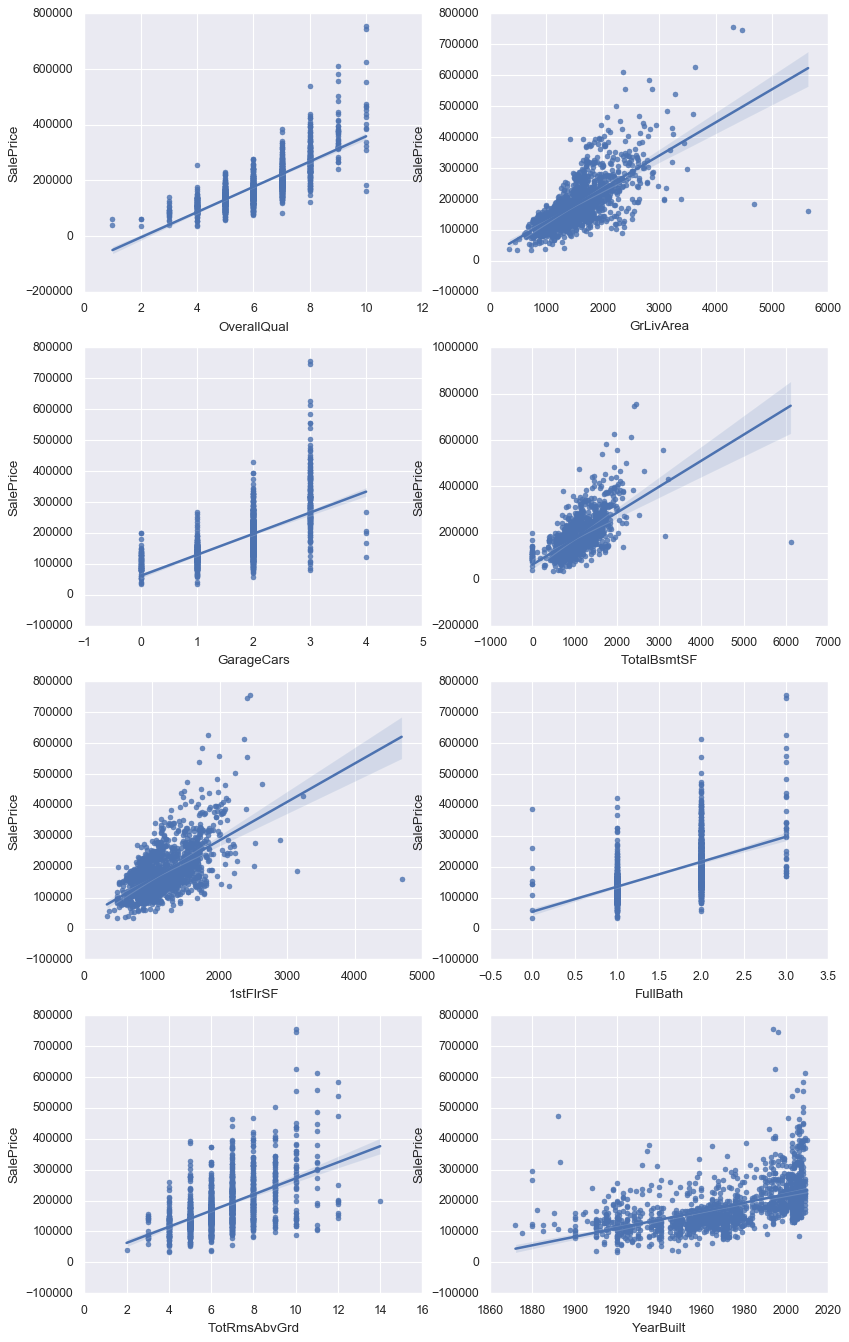

In [135]:
corr = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt"]

fig, axs = plt.subplots(4, 2, figsize = (12,20)) # axs is a numpy array
count = 0
for axl in axs.reshape(-1):
    sns.regplot(df_train[corr[count]], df_train['SalePrice'], ax=axl)
    count += 1

We can see that approximately variables are linear. In case of 'TotalBsmtSF', we show all the zero values which draws the line through that set and set of non-zero variables.

<HR>
In this section we observed some data transformations and properties of data that are oftenly required in testing and modelling. Our data are not so misbehaving, but they are not perfect neither. But with some easy tranformation we get them in order.
    
Now we will check if the log transformations solved the problem and visibility of outliers.
<HR>

# 6. Outliers after log transformations <a id="outliers-after-log">

As said above, we will check if the observed outliers from [section 4](#outliers) are still here, since log transformation should have hidden them.<br>
We will make scatterplot matrix again with our most important variables, but using the log-transformed data. We already have several log transformations from previous section: *log_SalePrice, log_GrLivArea, log_TotalBsmtSF*. Let's tranform the rest:

In [136]:
# Log tranformations
log_OverallQual = np.log(df_train['OverallQual'])
log_GarageCars = np.log(df_train['GarageCars'])
log_FullBath = np.log(df_train['FullBath'])
log_YearBuilt = np.log(df_train['YearBuilt'])

In [137]:
# Go through the rows in df_train and insert corresponding values in new columns based on whether a row is an outlier or not
id_category = []
id_size = []

for index, row in df_train.iterrows():
    if row['Id'] in outliers_id: 
        id_category.append('Outlier id: ' + str(row['Id']))
        id_size.append(1000)
    else: 
        id_category.append('No outlier')
        id_size.append(100)
                           

# Check if all the rows are contained in new columns
print("Do new column contain all rows : {} and {}\n" .format(len(id_category) == df_train.shape[0], 
                                                             len(id_size) == df_train.shape[0]))

# Check the values in IdCategory
unique_elements, counts_elements = np.unique(id_category, return_counts=True)
df_unique = pd.DataFrame({'Unique elements' : unique_elements, 'Counts elements' : counts_elements})
print("Let's look at the unique values (i.e. categories) of outliers:\n")
print(df_unique)


# Create new dataframe df_train2 that is a replica of df_train but contains additional column IdCategory
df_train2 = df_train
id_category = pd.Series(id_category, index=df_train2.index)
df_train2['IdCategory'] = id_category
id_size = pd.Series(id_size, index=df_train2.index)
df_train2['IdSize'] = id_size

# Log tranform only the needed columns:
df_train2['SalePrice'] = log_SalePrice
df_train2['GrLivArea'] = log_GrLivArea
df_train2['TotalBsmtSF'] = log_TotalBsmtSF
df_train2['OverallQual'] = log_OverallQual
df_train2['GarageCars'] = log_GarageCars
df_train2['FullBath'] = log_FullBath
df_train2['YearBuilt'] = log_YearBuilt

Do new column contain all rows : True and True

Let's look at the unique values (i.e. categories) of outliers:

    Unique elements  Counts elements
0        No outlier             1456
1  Outlier id: 1299                1
2   Outlier id: 524                1


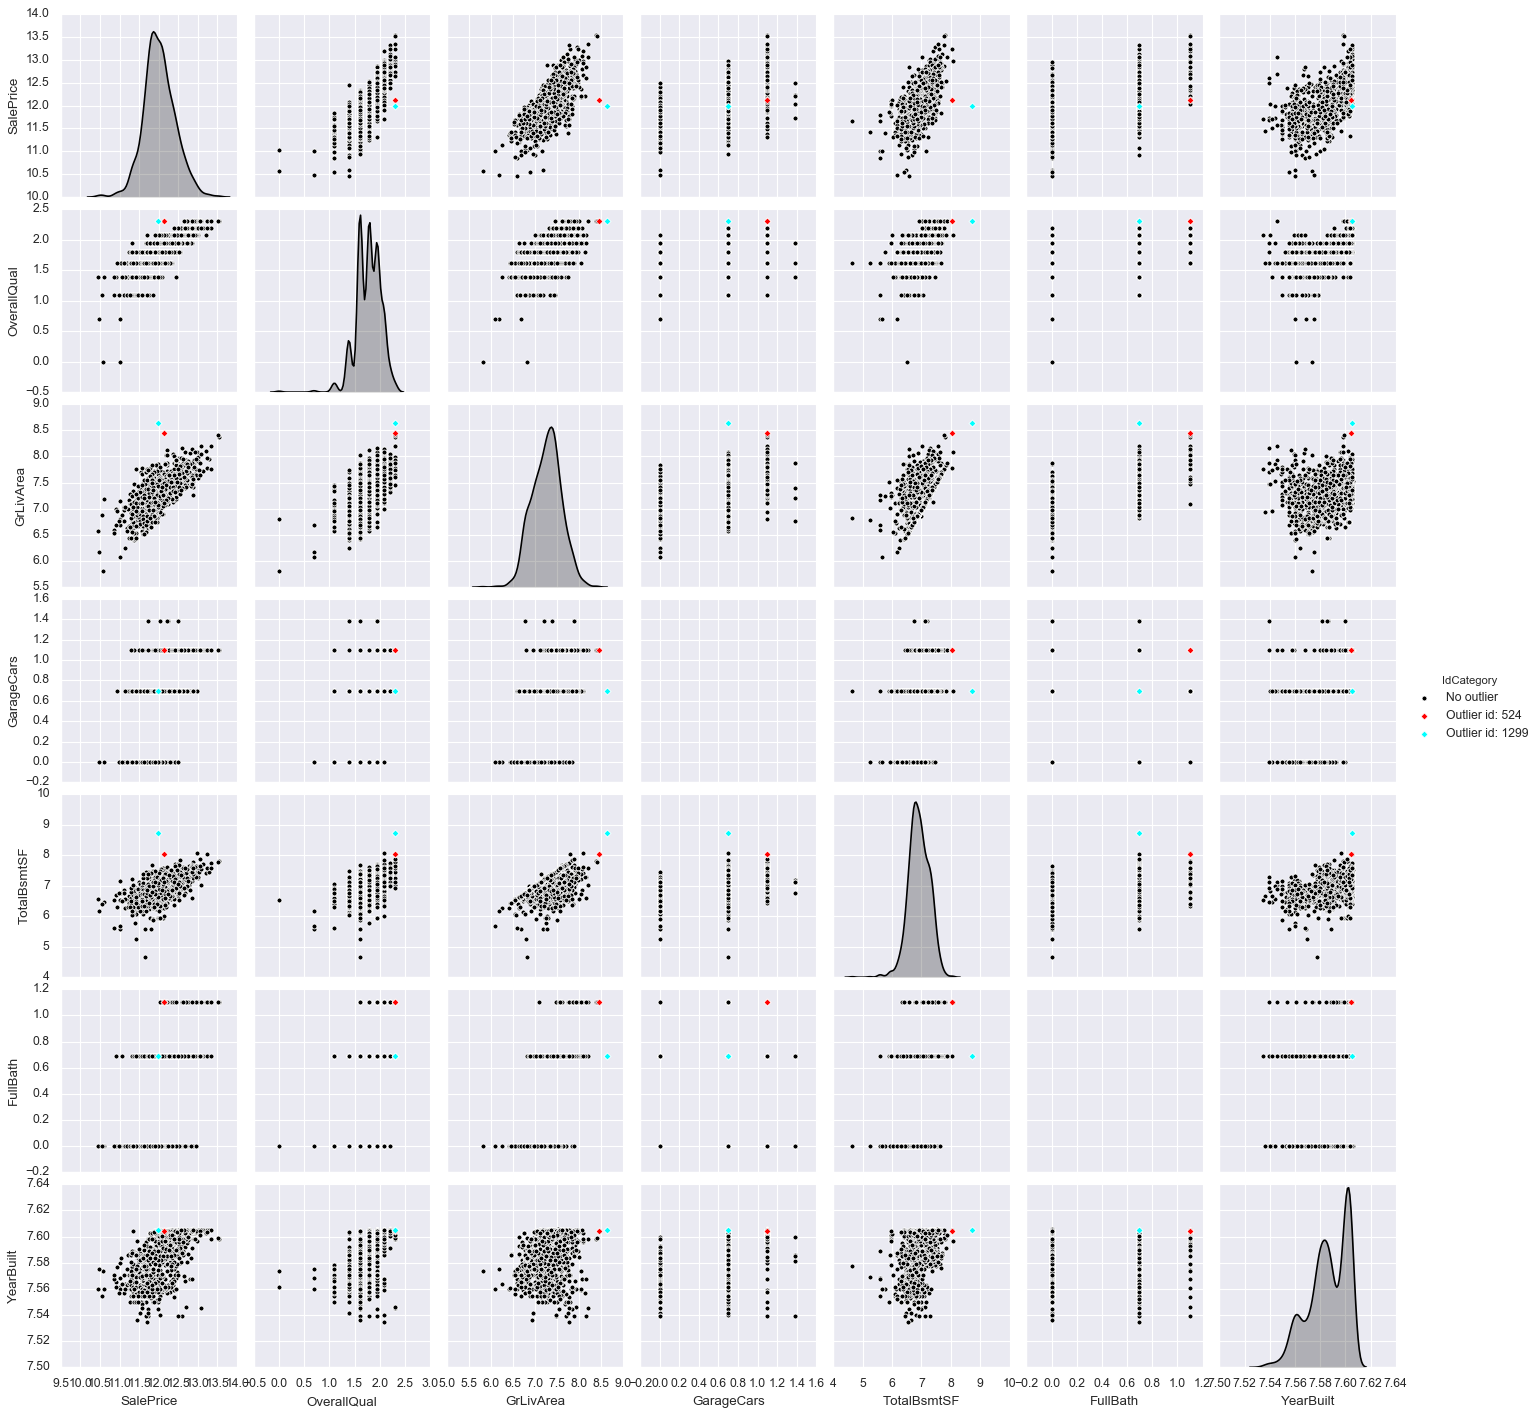

In [138]:
# Plot the scatterplot matrix
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

g = sns.pairplot(df_train2,  x_vars=cols, y_vars=cols,
                 palette=['black', 'red', 'cyan'],
                 hue="IdCategory", markers=["o", "D", "D"])

Some variables might still suggest that these two noticed outliers might really be outliers. That acknowledges that we did a good work in [section 4](#outliers). These two points should be taken in consideration when it comes to modelling.<br>
<br>
<br>
<br>
<HR>
    
In this section we quickly checked if log tranformations in [section 5](#test-assumptions) solved the situation with outliers that we noticed in [section 4](#outliers).
    
Let's move on to our last section which shortly describes how can we handle categorical variables to prepare them for modelling.
<HR>

# 7. Dummy variables <a id="dummy">

Typically, a dummy variable (or column) is one which has a value of one (1) when a categorical event occurs (e.g., an individual is male) and zero (0) when it doesn’t occur (e.g., an individual is female).
Let's first take a look at categorical variables and bar plots of their values. To make dummy variables, we will use pandas get_dummies function. Get_dummies takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.  

### Countplot: categorical variables and their values

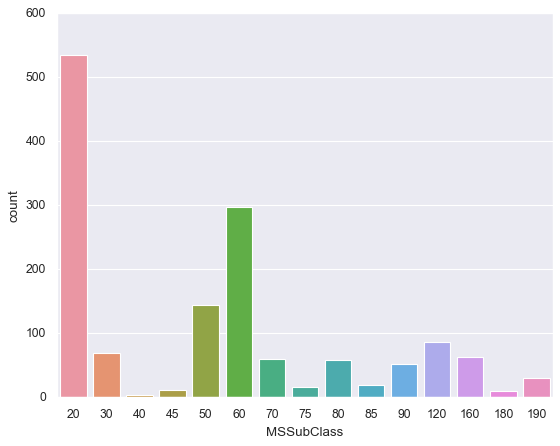

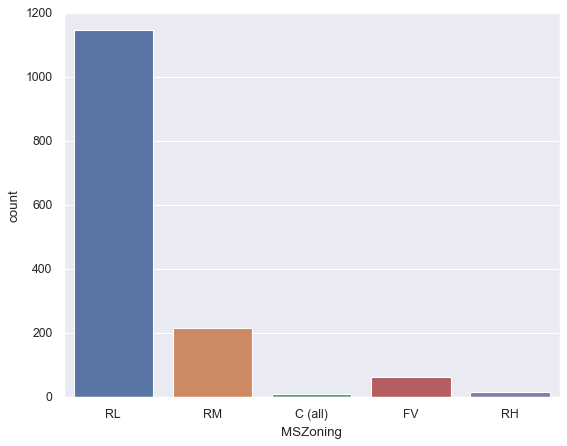

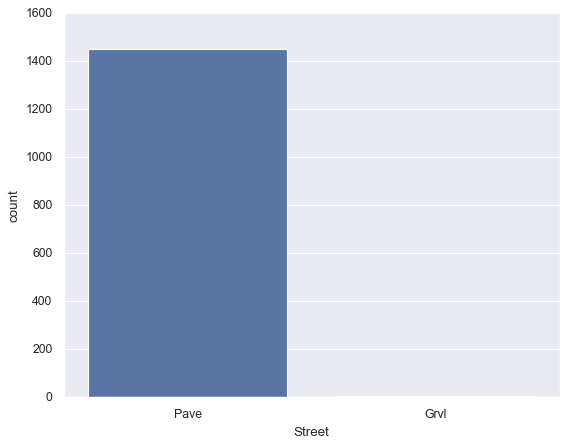

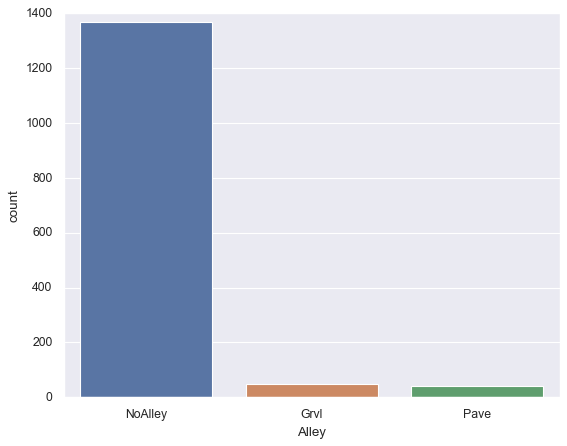

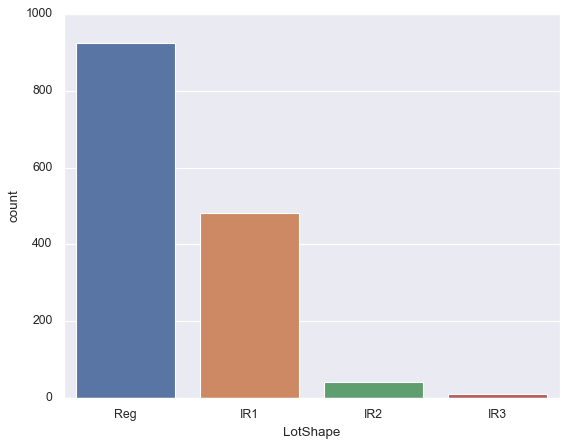

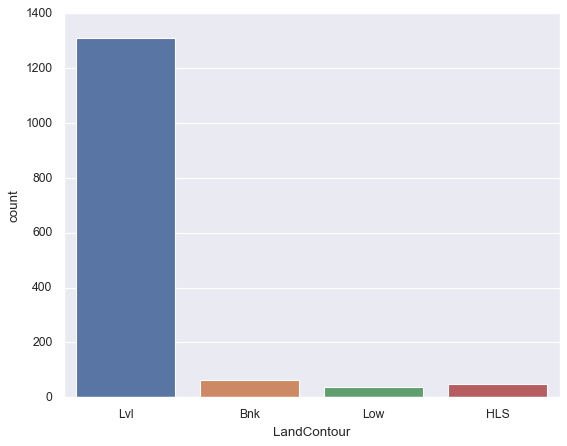

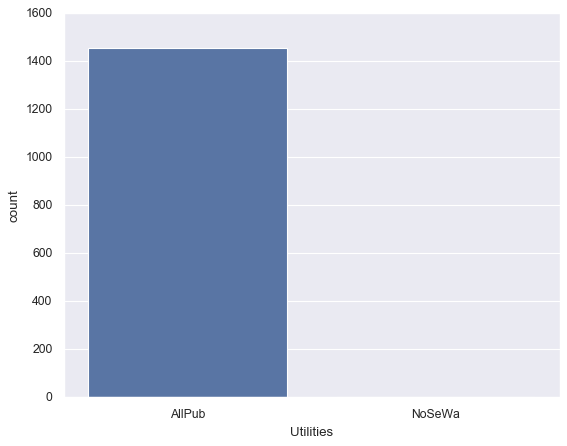

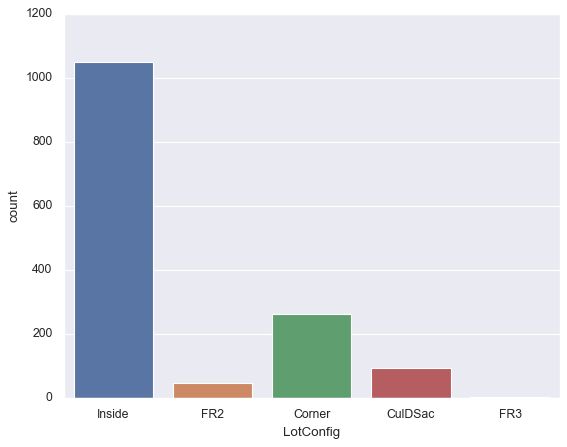

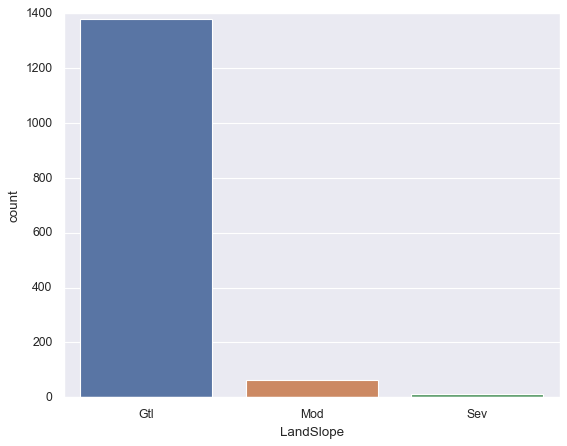

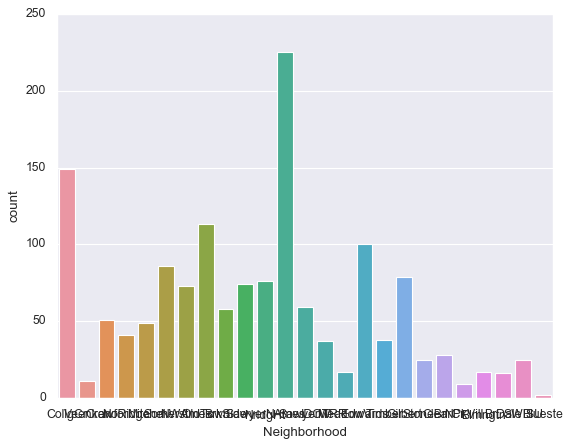

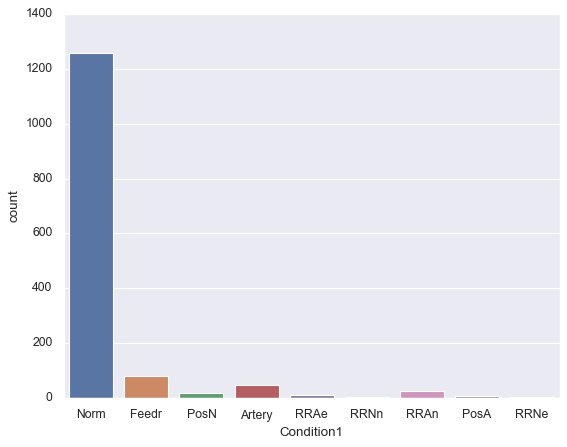

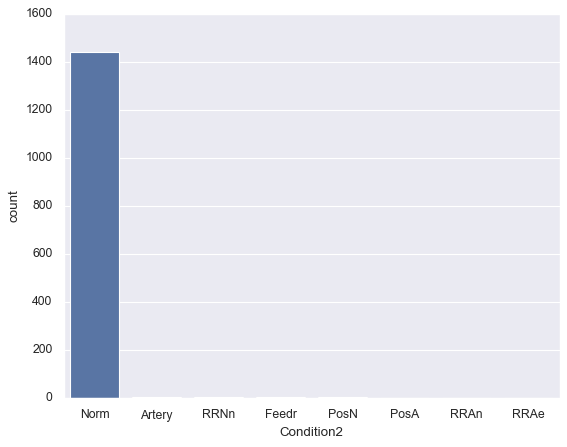

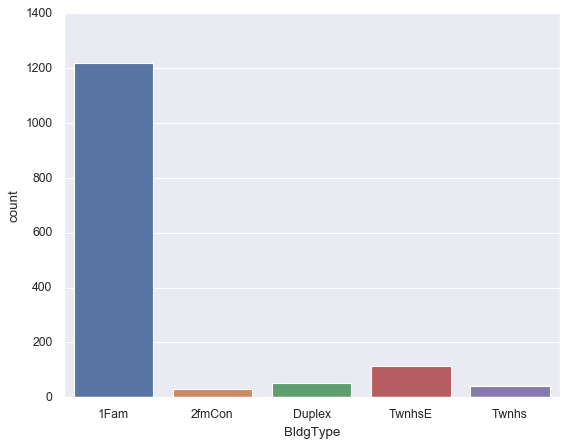

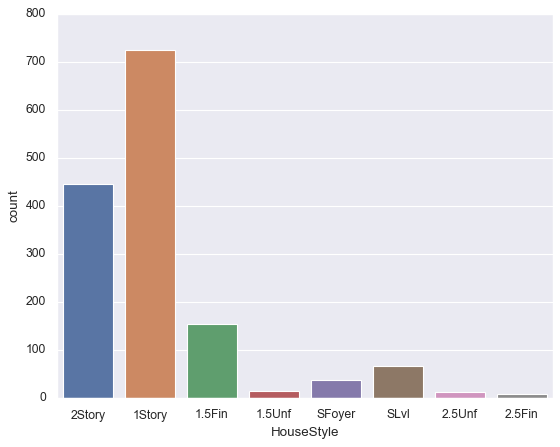

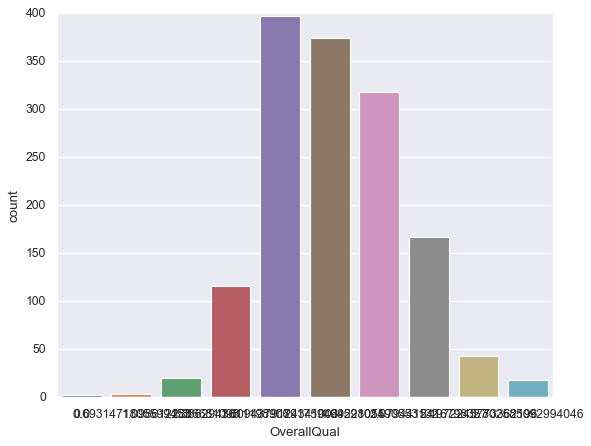

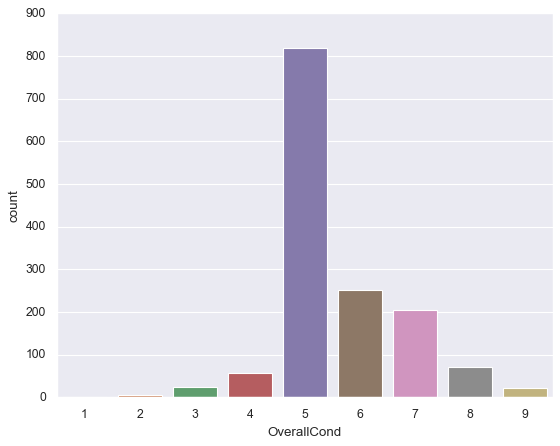

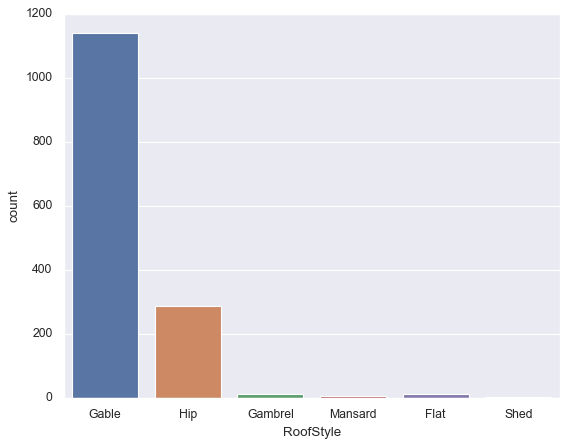

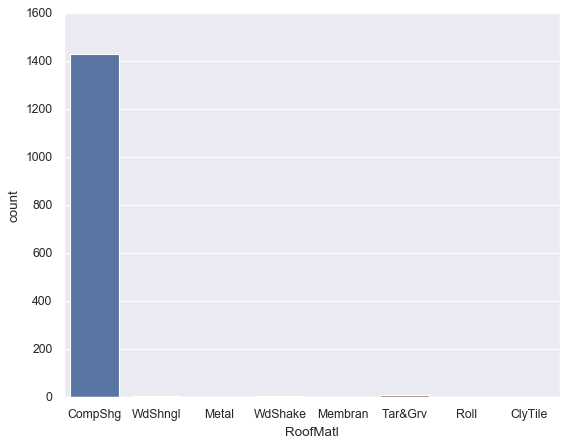

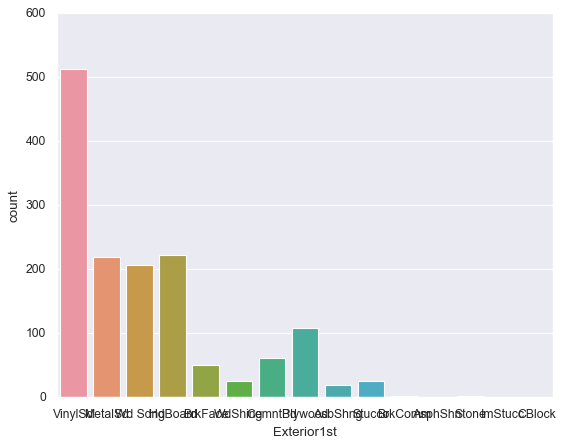

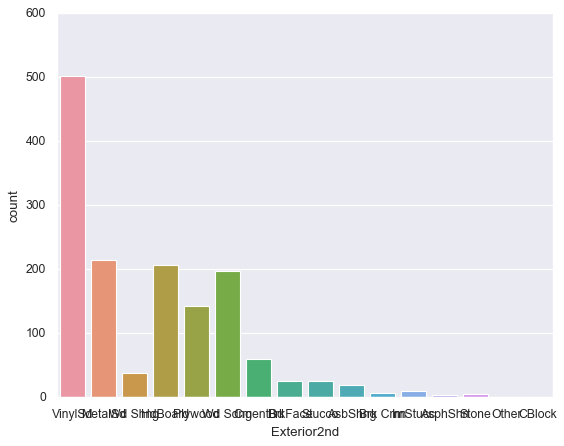

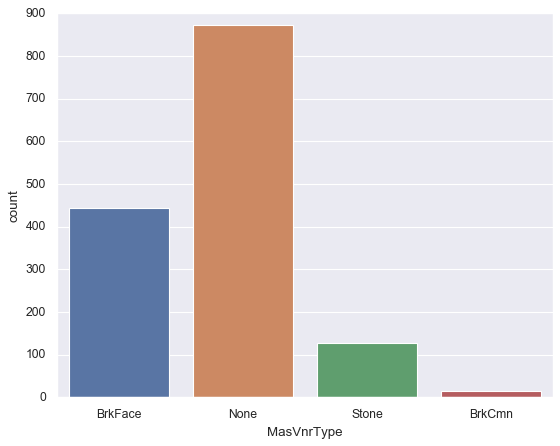

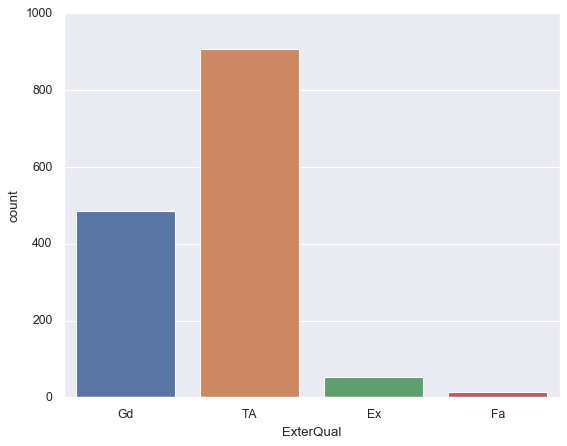

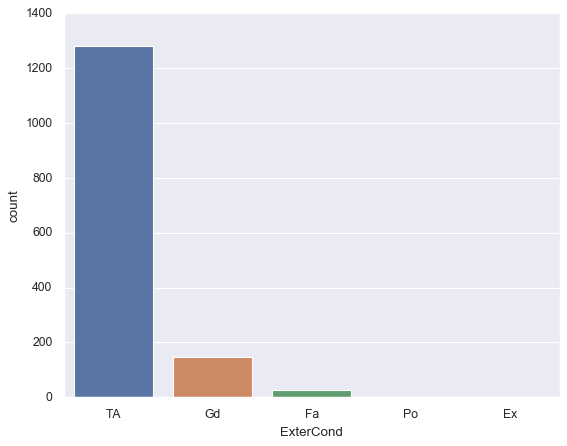

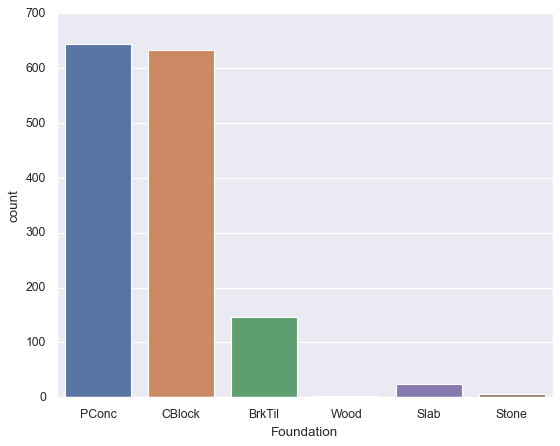

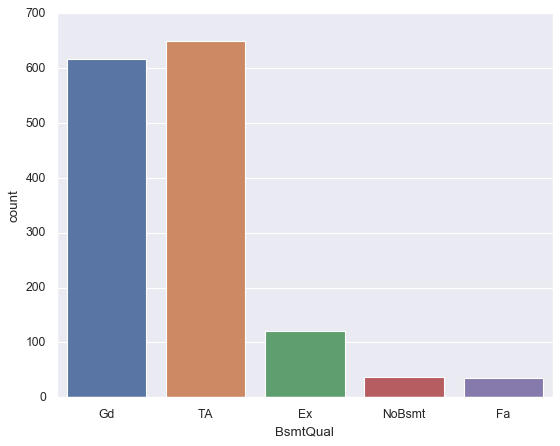

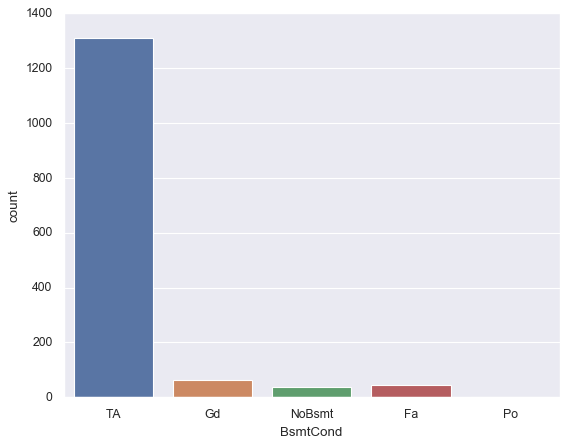

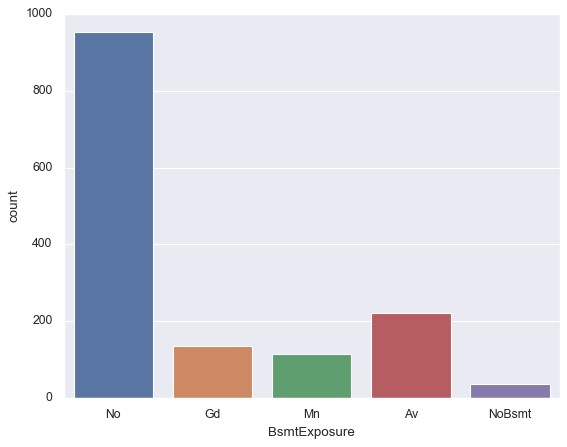

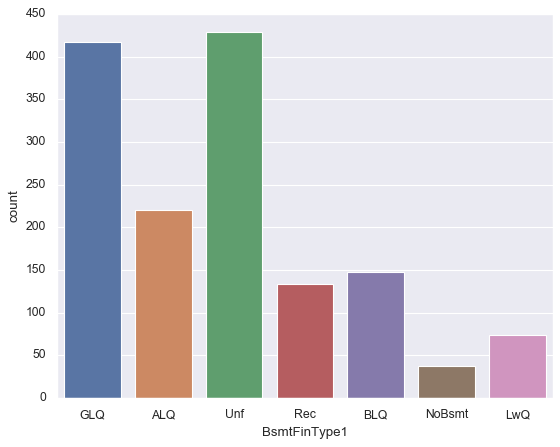

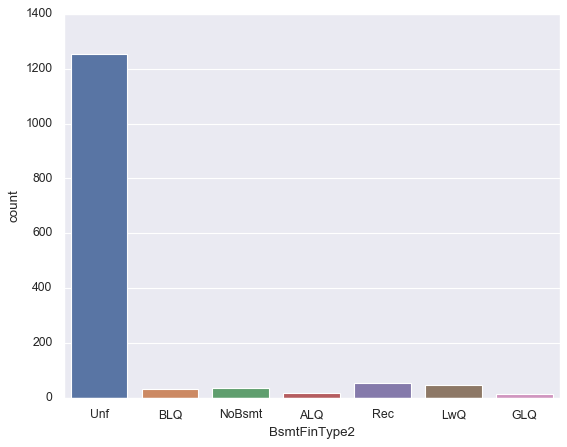

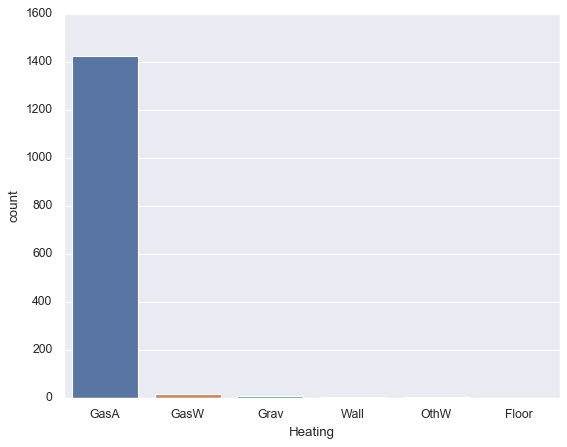

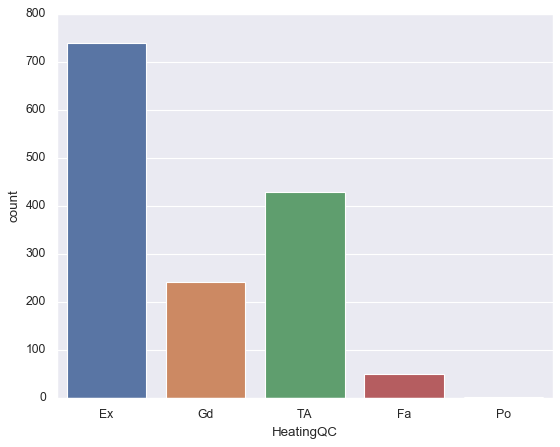

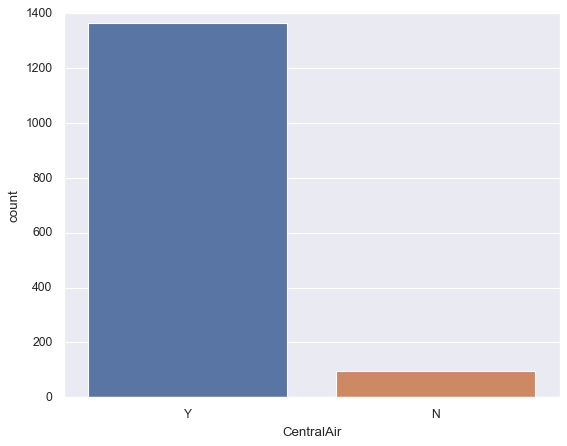

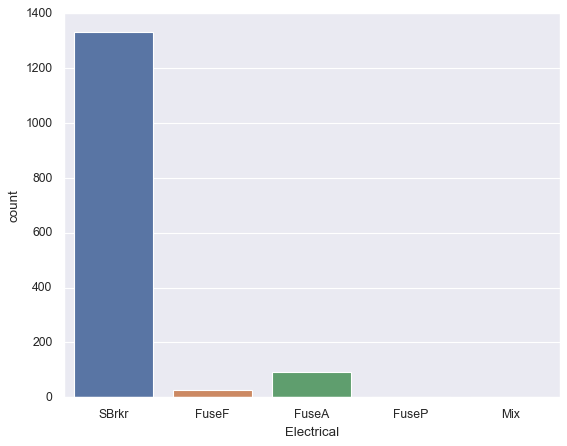

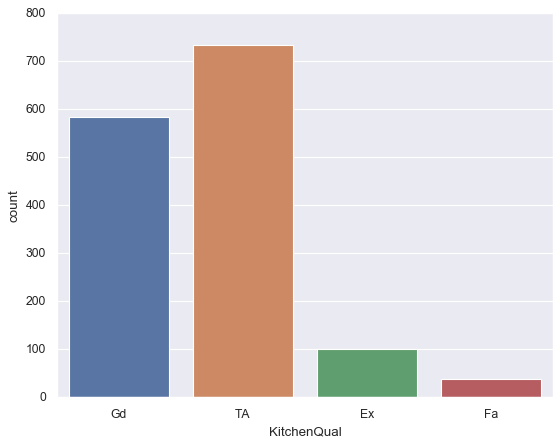

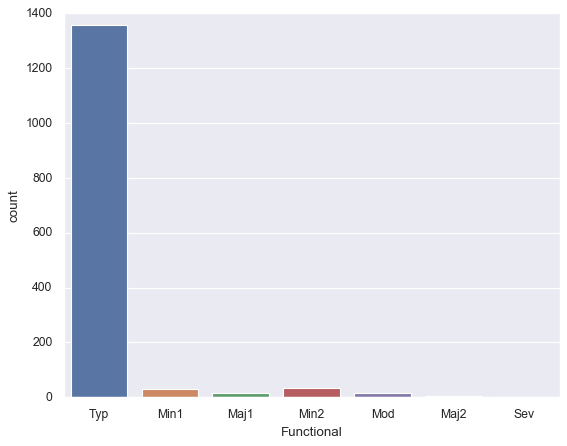

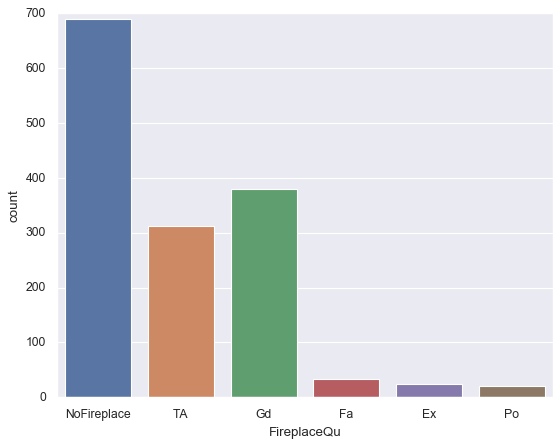

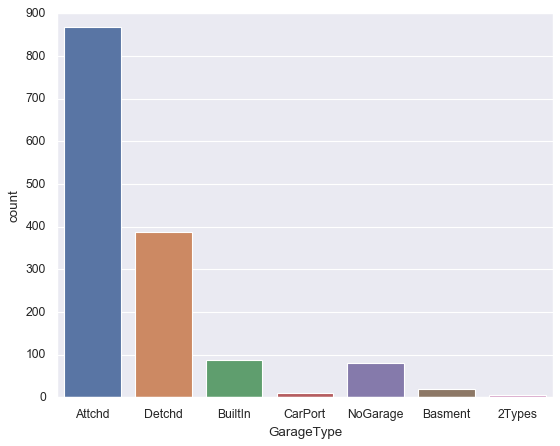

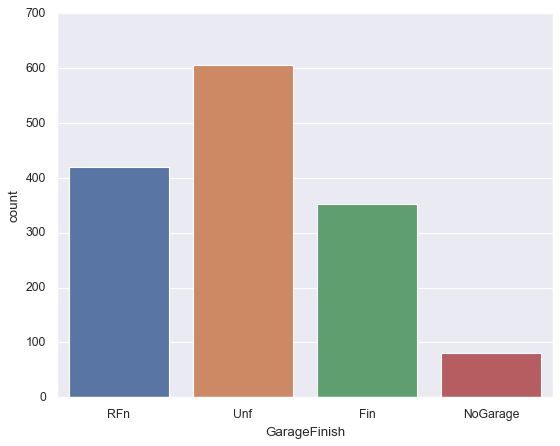

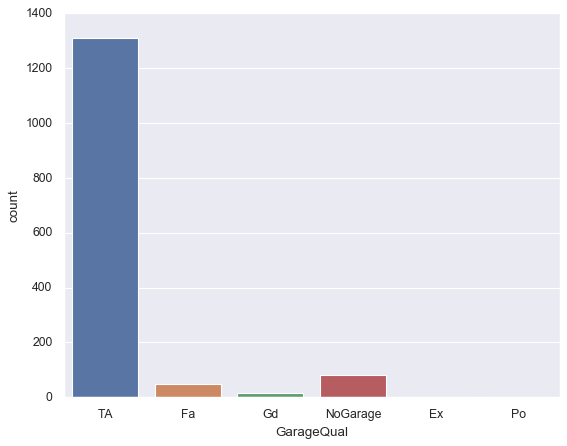

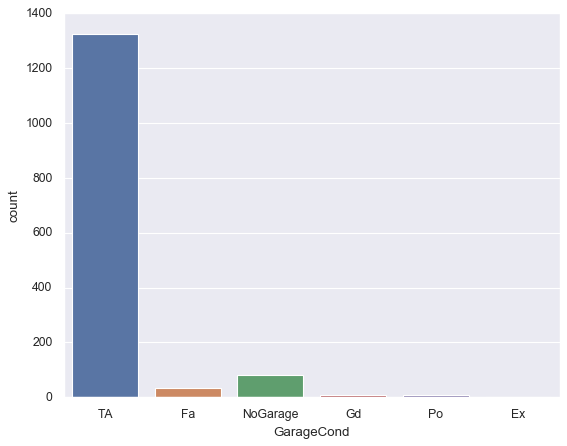

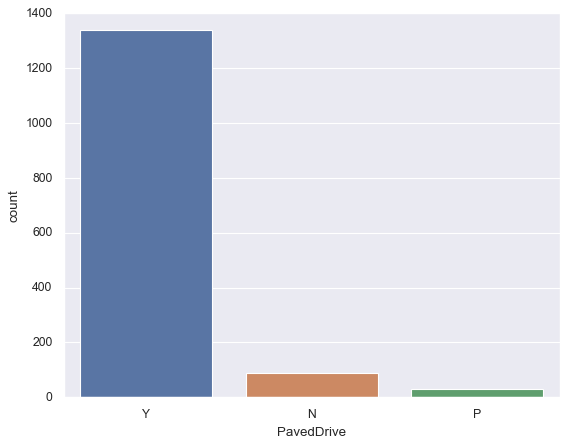

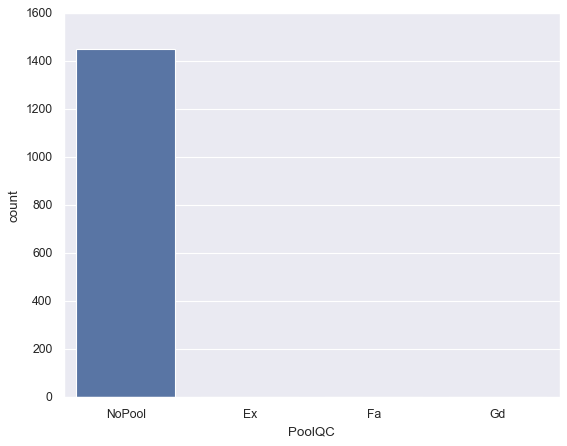

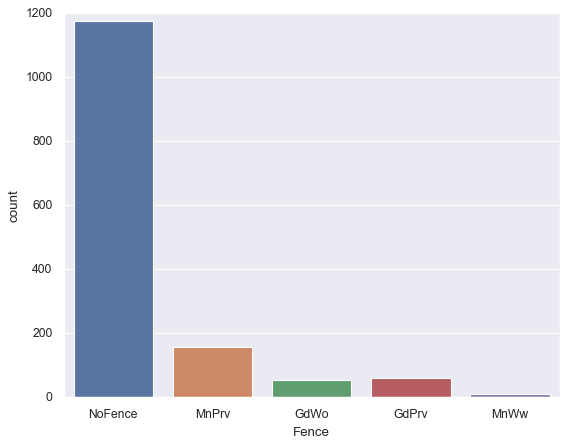

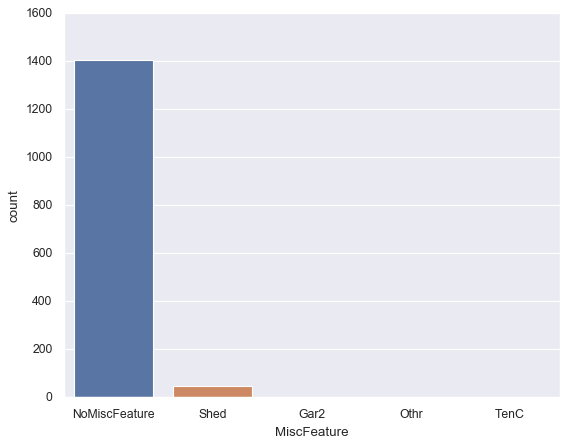

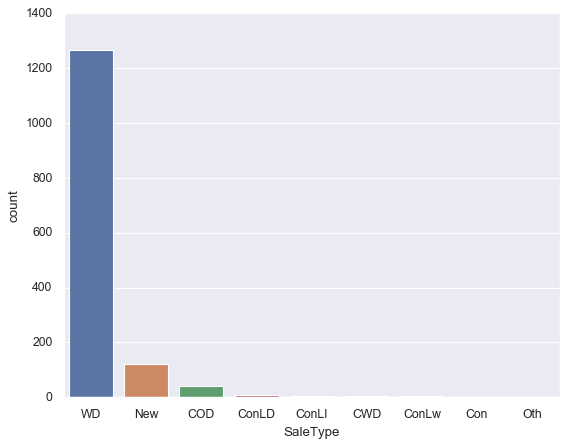

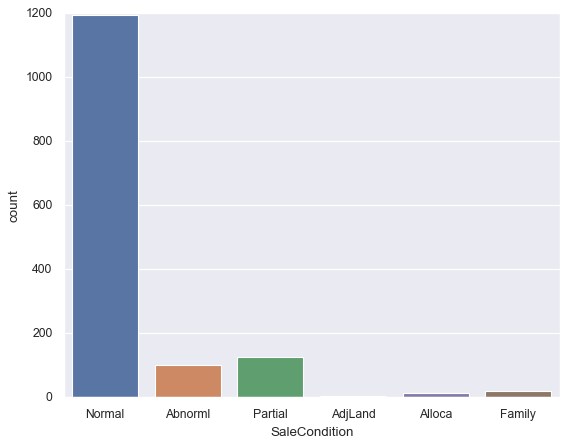

In [139]:
categoric_feats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                   'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
                  'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
                  'SaleType', 'SaleCondition']

for col in categoric_feats:
    plt.figure()
    ax = sns.countplot(x=col, data=df_train)

We can see that there are few variables that have a dominant one value, in other words around 1400 points (out of 1460) have the same value for the specific variable, those varibles are: Street, Utilities, LandSlope, Condition2, RoofMat1, Heating, CentralAir, Electrical and Functional. Therefore it seems that we should consider, when transforming to numerical variables, leaving only those values, in other words making new column only for one dominant value, and not all of them.
Also, there are some variables for which very few points have some specific value, for example 1 in OverallQual, which should also be considered during modelling.

Method we think is good to use for converting categorical to numerical variables is get_dummies, because we will get 0s and 1s, instead of 0s, 1s, 2s etc. which would impose ordinality. Using this function we don't transform OverallQual and OverallCond, but ordinality is suitable for those variables, and MSSubClass we will transform manually.

In [140]:
array = np.unique(df_train['MSSubClass'].values)
for i in range(len(array)):
    df_train['MSSubClass_' + str(array[i])] = df_train['MSSubClass'].apply(lambda x: 1 if x == array[i] else 0)

In [141]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
list(df_train.columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'IdSize',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NoAlley',
 'Alley_

This is the list of all the features we get after transformation on all categorical variables.

In [142]:
# For this command, you should install openpyxl package in your environment: pip3 install openpyxl
df_train.to_excel(r'data/new_train.xlsx', index = False)

In [143]:
#convert categorical variable into dummy
df_test = pd.read_csv('data/test.csv')
df_test = pd.get_dummies(df_test)
#df_test.head()

In [144]:
df_test.to_excel(r'data/new_test.xlsx', index = False)

In [145]:
# find rows which are not common between two dataframes
df_train.columns.difference(df_test.columns)

Index(['Alley_NoAlley', 'BsmtCond_NoBsmt', 'BsmtExposure_NoBsmt',
       'BsmtFinType1_NoBsmt', 'BsmtFinType2_NoBsmt', 'BsmtQual_NoBsmt',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'Fence_NoFence', 'FireplaceQu_NoFireplace',
       'GarageCond_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_Ex',
       'GarageQual_NoGarage', 'GarageType_NoGarage', 'Heating_Floor',
       'Heating_OthW', 'HouseStyle_2.5Fin', 'IdCategory_No outlier',
       'IdCategory_Outlier id: 1299', 'IdCategory_Outlier id: 524', 'IdSize',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MiscFeature_NoMiscFeature', 'MiscFeature_TenC', 'PoolQC_Fa',
       'Pool

<br><HR>
With this, we conclude our exploratory data analysis on the topic of *House Prices Prediction*.

# References

[1] [Kaggle - House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) <br>

[2] [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#1.-So...-What-can-we-expect) <br>

[3] [Data exploration](https://www.kaggle.com/saadalsharif/dsi-stars-pro2#*-Basic-EDA) <br>

[4] [Hair et. al: Multivariate Data Analysis](https://is.muni.cz/el/1423/podzim2017/PSY028/um/_Hair_-_Multivariate_data_analysis_7th_revised.pdf)

[5] [powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777#s1) <br>

[6] [How do I analyze power-law distribution?](https://www.researchgate.net/post/How_do_I_analyse_power-law_distribution_data)

[7] [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)